In [1]:
import numpy as np                                                 
import pandas as pd
import pandas_profiling                                        
import matplotlib.pyplot as plt   
from matplotlib import rcParams
import seaborn as sns     
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.neural_network import MLPClassifier
%matplotlib inline

In [2]:
data = pd.read_csv('heart.csv')
print('Data Shape:', data.shape)                     #Loading dataset AND displaying Top 5 Rows
data

Data Shape: (918, 12)


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
data.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [5]:
profile = data.profile_report(title="Data Profiling before Data Preprocessing", progress_bar=False, minimal=True)
profile.to_file(output_file="hdp-understand.html")

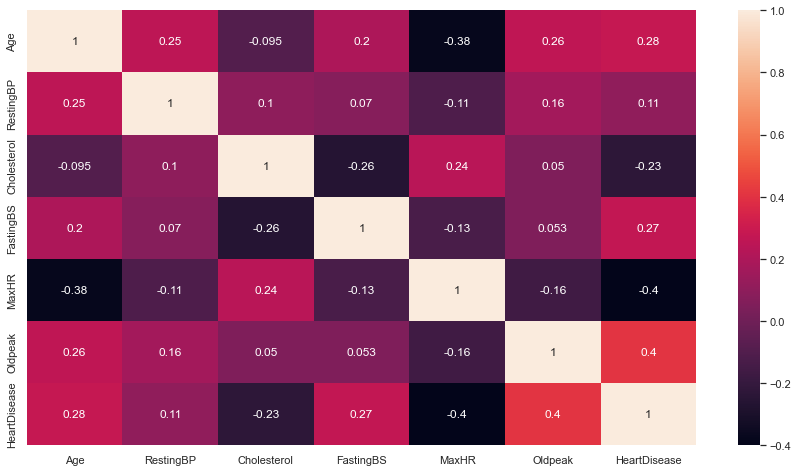

In [6]:
sns.set(rc = {'figure.figsize':(15,8)})
corr_data = sns.heatmap(data.corr(), annot=True)
plt.show()

In [7]:
data['Age'][0]

40

In [8]:
count = 0
for i in range(0, 269):
    if data['Age'][i] < 18:
        count+=1
print(count)

0


# Data Cleaning

In [9]:
data.isnull().sum() #null

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
data[data['Cholesterol'] == 0]

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
293   65   M           ASY        115            0          0     Normal   
294   32   M            TA         95            0          1     Normal   
295   61   M           ASY        105            0          1     Normal   
296   50   M           ASY        145            0          1     Normal   
297   57   M           ASY        110            0          1         ST   
..   ...  ..           ...        ...          ...        ...        ...   
514   43   M           ASY        122            0          0     Normal   
515   63   M           NAP        130            0          1         ST   
518   48   M           NAP        102            0          1         ST   
535   56   M           ASY        130            0          0        LVH   
536   62   M           NAP        133            0          1         ST   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
293     93              Y      0.0     Flat             1  
294    127              N      0.7       Up             1  
295    110              Y      1.5       Up             1  
296    139              Y      0.7     Flat             1  
297    131              Y      1.4       Up             1  
..     ...            ...      ...      ...           ...  
514    120              N      0.5       Up             1  
515    160              N      3.0     Flat             0  
518    110              Y      1.0     Down             1  
535    122              Y      1.0     Flat             1  
536    119              Y      1.2     Flat             1  

[172 rows x 12 columns]

In [11]:
data = data[data['Cholesterol'] != 0]
data

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[746 rows x 12 columns]

In [12]:
data.duplicated().value_counts()  #duplicate

False    746
dtype: int64

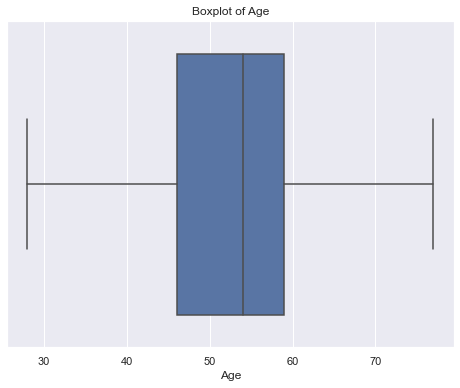

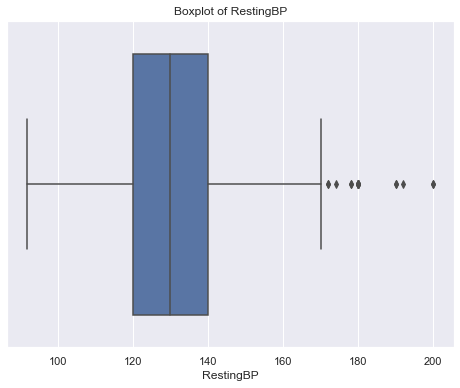

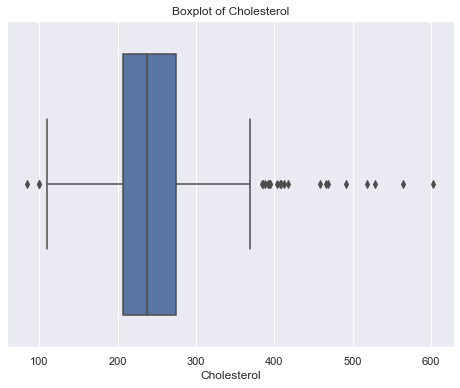

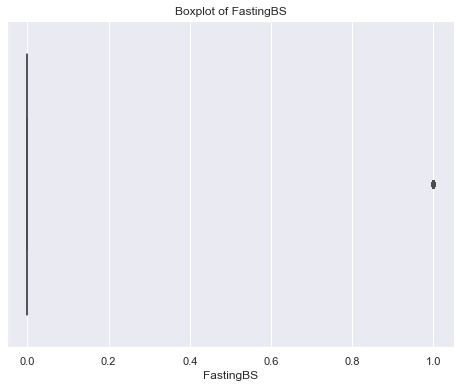

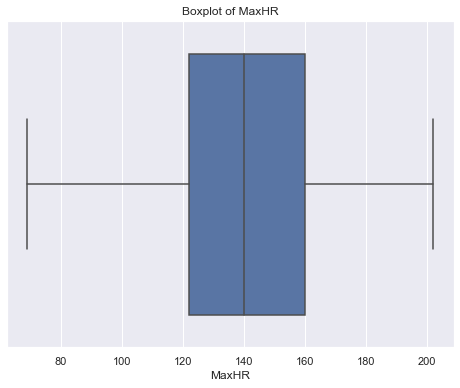

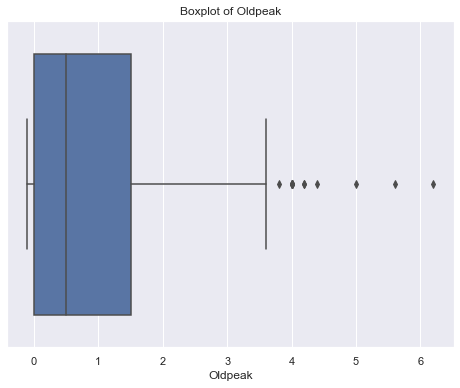

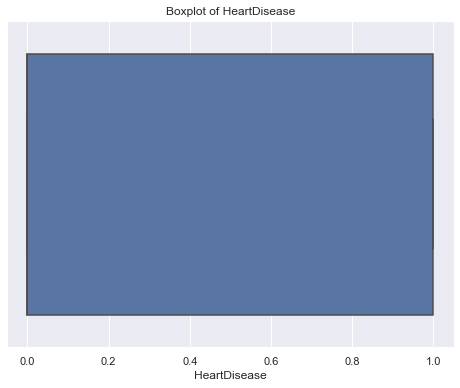

In [13]:
numeric_columns = data.select_dtypes(include=['number'])

for column in numeric_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [14]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
clean_data = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

C:\Users\SHAHYA~1\AppData\Local\Temp/ipykernel_9776/2251005348.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  clean_data = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]


In [15]:
numeric_columns

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease
0     40        140          289          0    172      0.0             0
1     49        160          180          0    156      1.0             1
2     37        130          283          0     98      0.0             0
3     48        138          214          0    108      1.5             1
4     54        150          195          0    122      0.0             0
..   ...        ...          ...        ...    ...      ...           ...
913   45        110          264          0    132      1.2             1
914   68        144          193          1    141      3.4             1
915   57        130          131          0    115      1.2             1
916   57        130          236          0    174      0.0             1
917   38        138          175          0    173      0.0             0

[746 rows x 7 columns]

C:\Users\SHAHYA~1\AppData\Local\Temp/ipykernel_9776/3213495324.py:10: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data[attribute], 25, interpolation='midpoint')
C:\Users\SHAHYA~1\AppData\Local\Temp/ipykernel_9776/3213495324.py:11: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(data[attribute], 75, interpolation='midpoint')


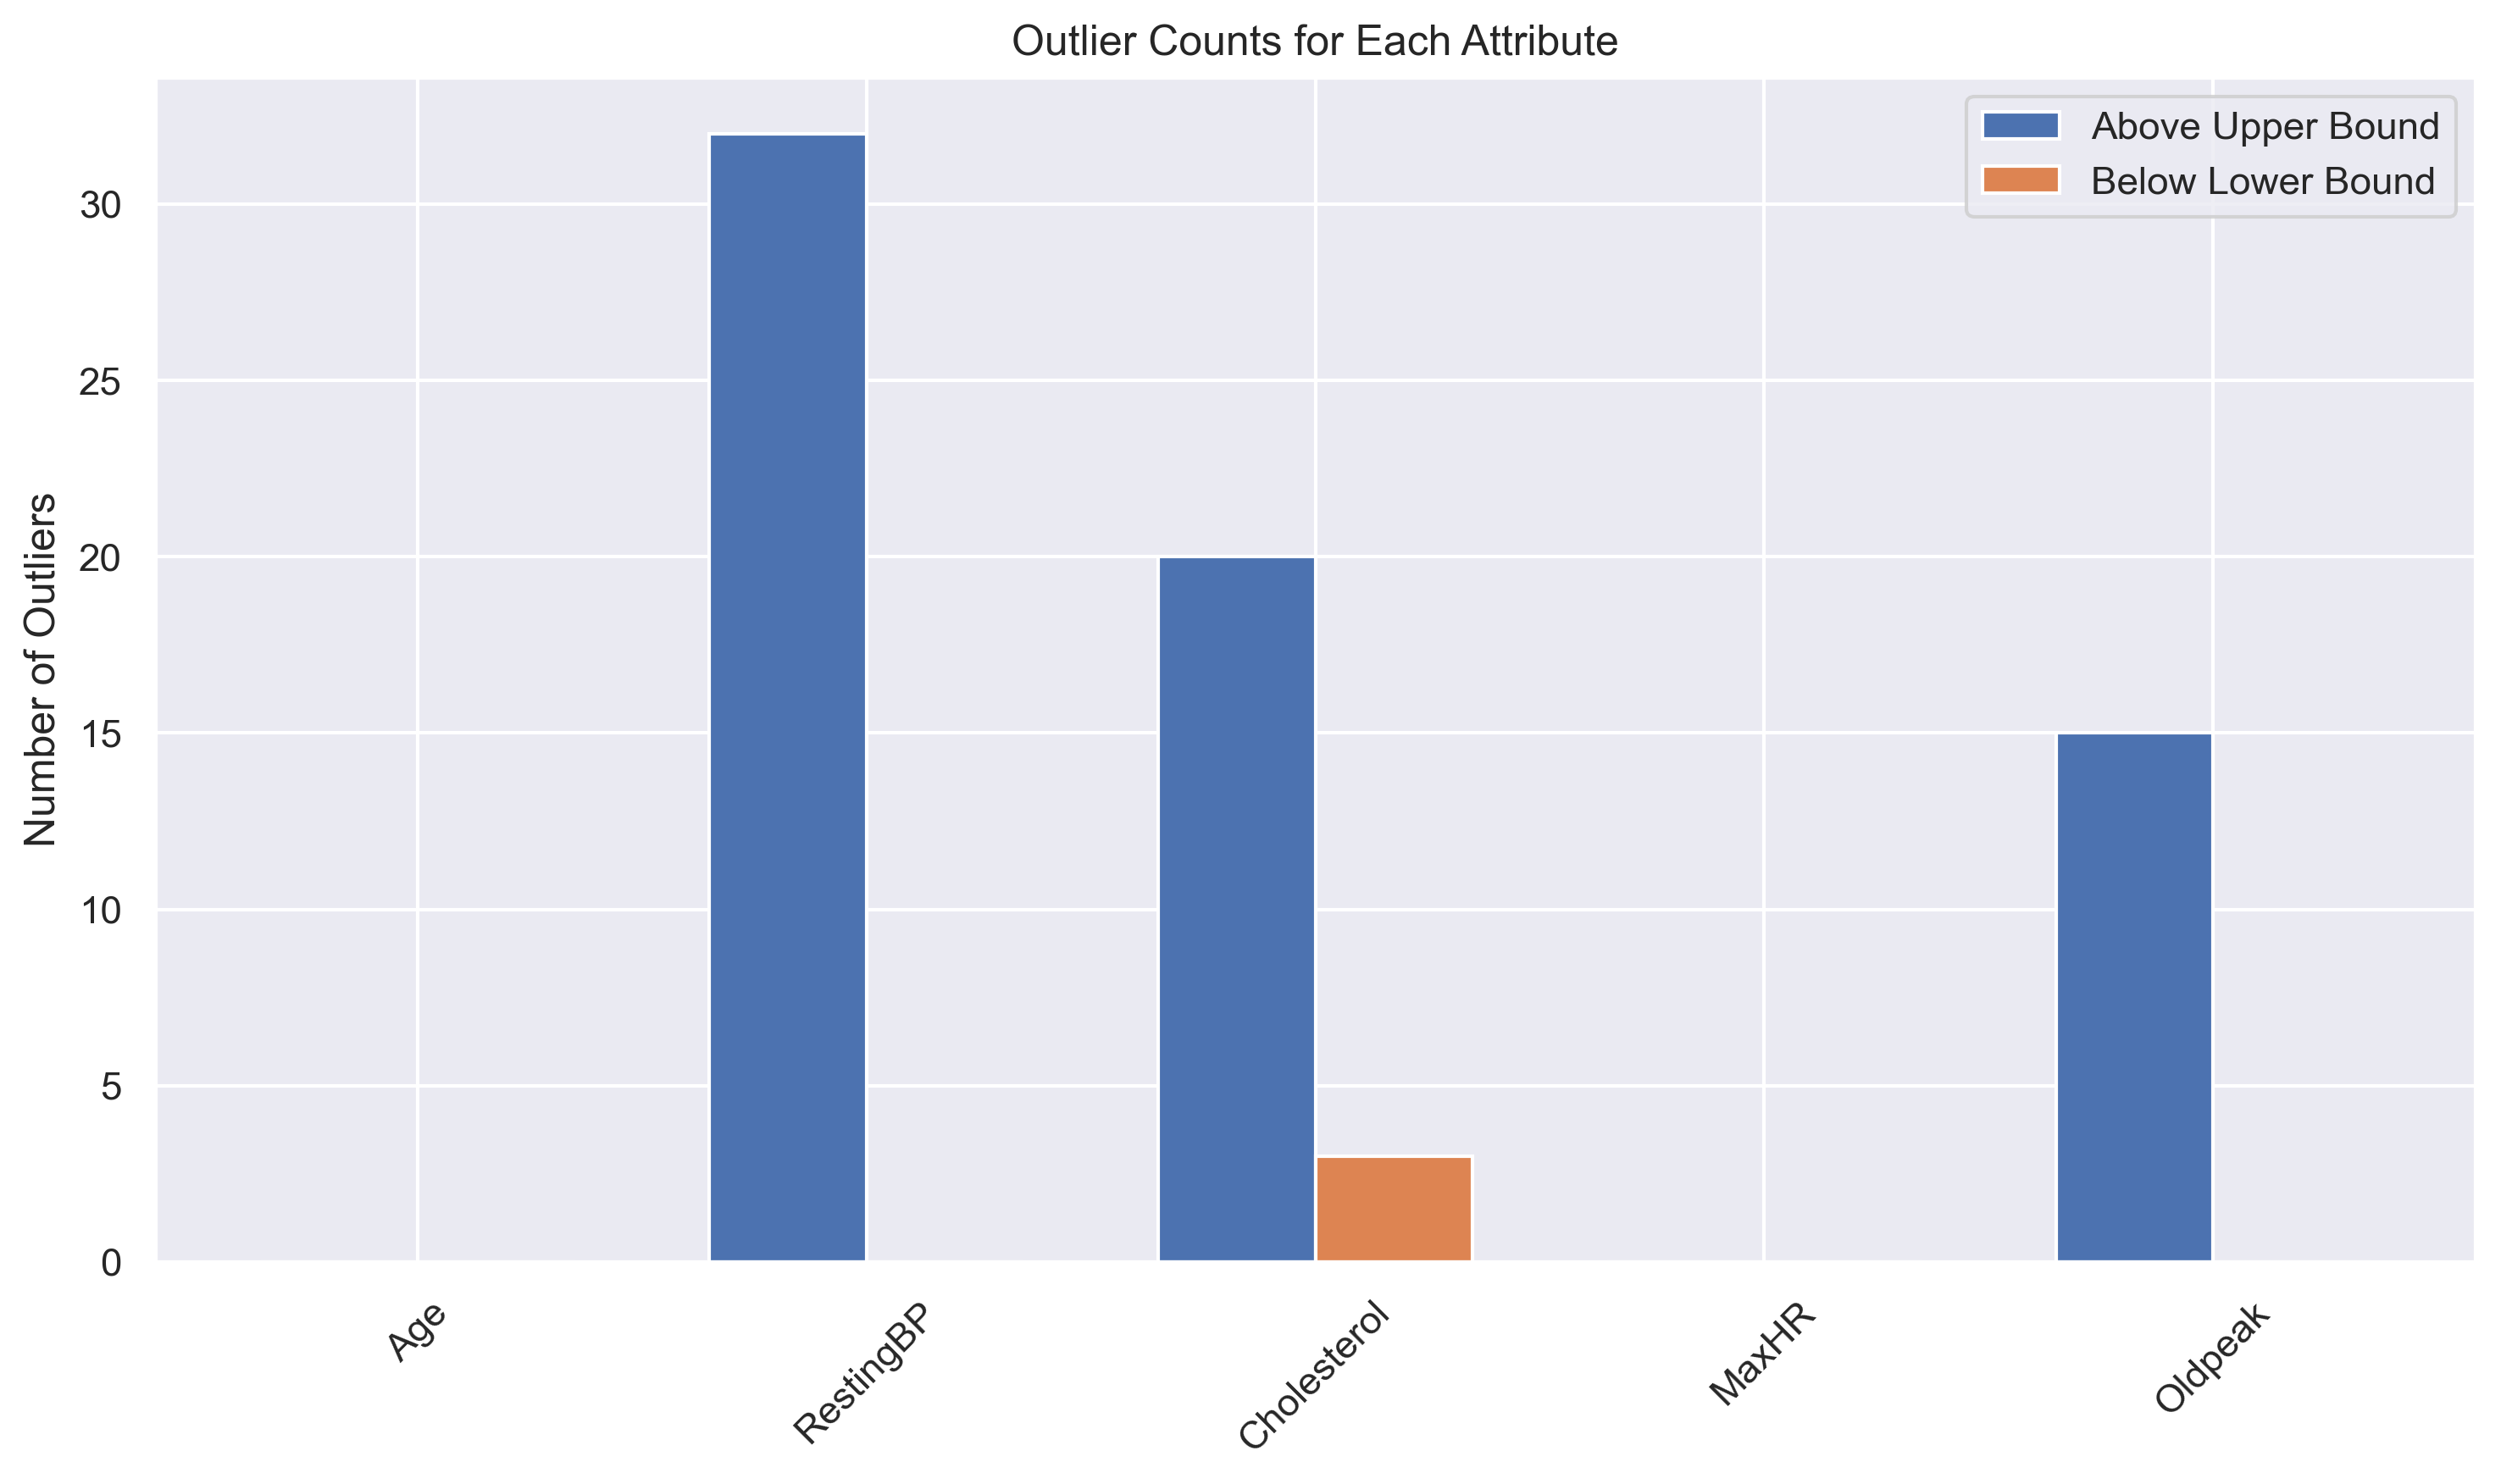

In [16]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

attributes = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

outlier_counts = {'Above Upper Bound': [], 'Below Lower Bound': []}

for attribute in attributes:
    Q1 = np.percentile(data[attribute], 25, interpolation='midpoint')
    Q3 = np.percentile(data[attribute], 75, interpolation='midpoint')
    IQR = Q3 - Q1

    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR

    # Above Upper bound
    upper_bound = (data[attribute] >= (Q3 + 1.5 * IQR)).sum()

    # Below Lower bound
    lower_bound = (data[attribute] <= (Q1 - 1.5 * IQR)).sum()

    outlier_counts['Above Upper Bound'].append(upper_bound)
    outlier_counts['Below Lower Bound'].append(lower_bound)

# Create a multi-bar graph
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35
x = np.arange(len(attributes))
ax.bar(x - width/2, outlier_counts['Above Upper Bound'], width, label='Above Upper Bound')
ax.bar(x + width/2, outlier_counts['Below Lower Bound'], width, label='Below Lower Bound')
ax.set_xticks(x)
ax.set_xticklabels(attributes, rotation=45)
ax.set_ylabel('Number of Outliers')
ax.set_title('Outlier Counts for Each Attribute')
ax.legend()
plt.tight_layout()
plt.show()


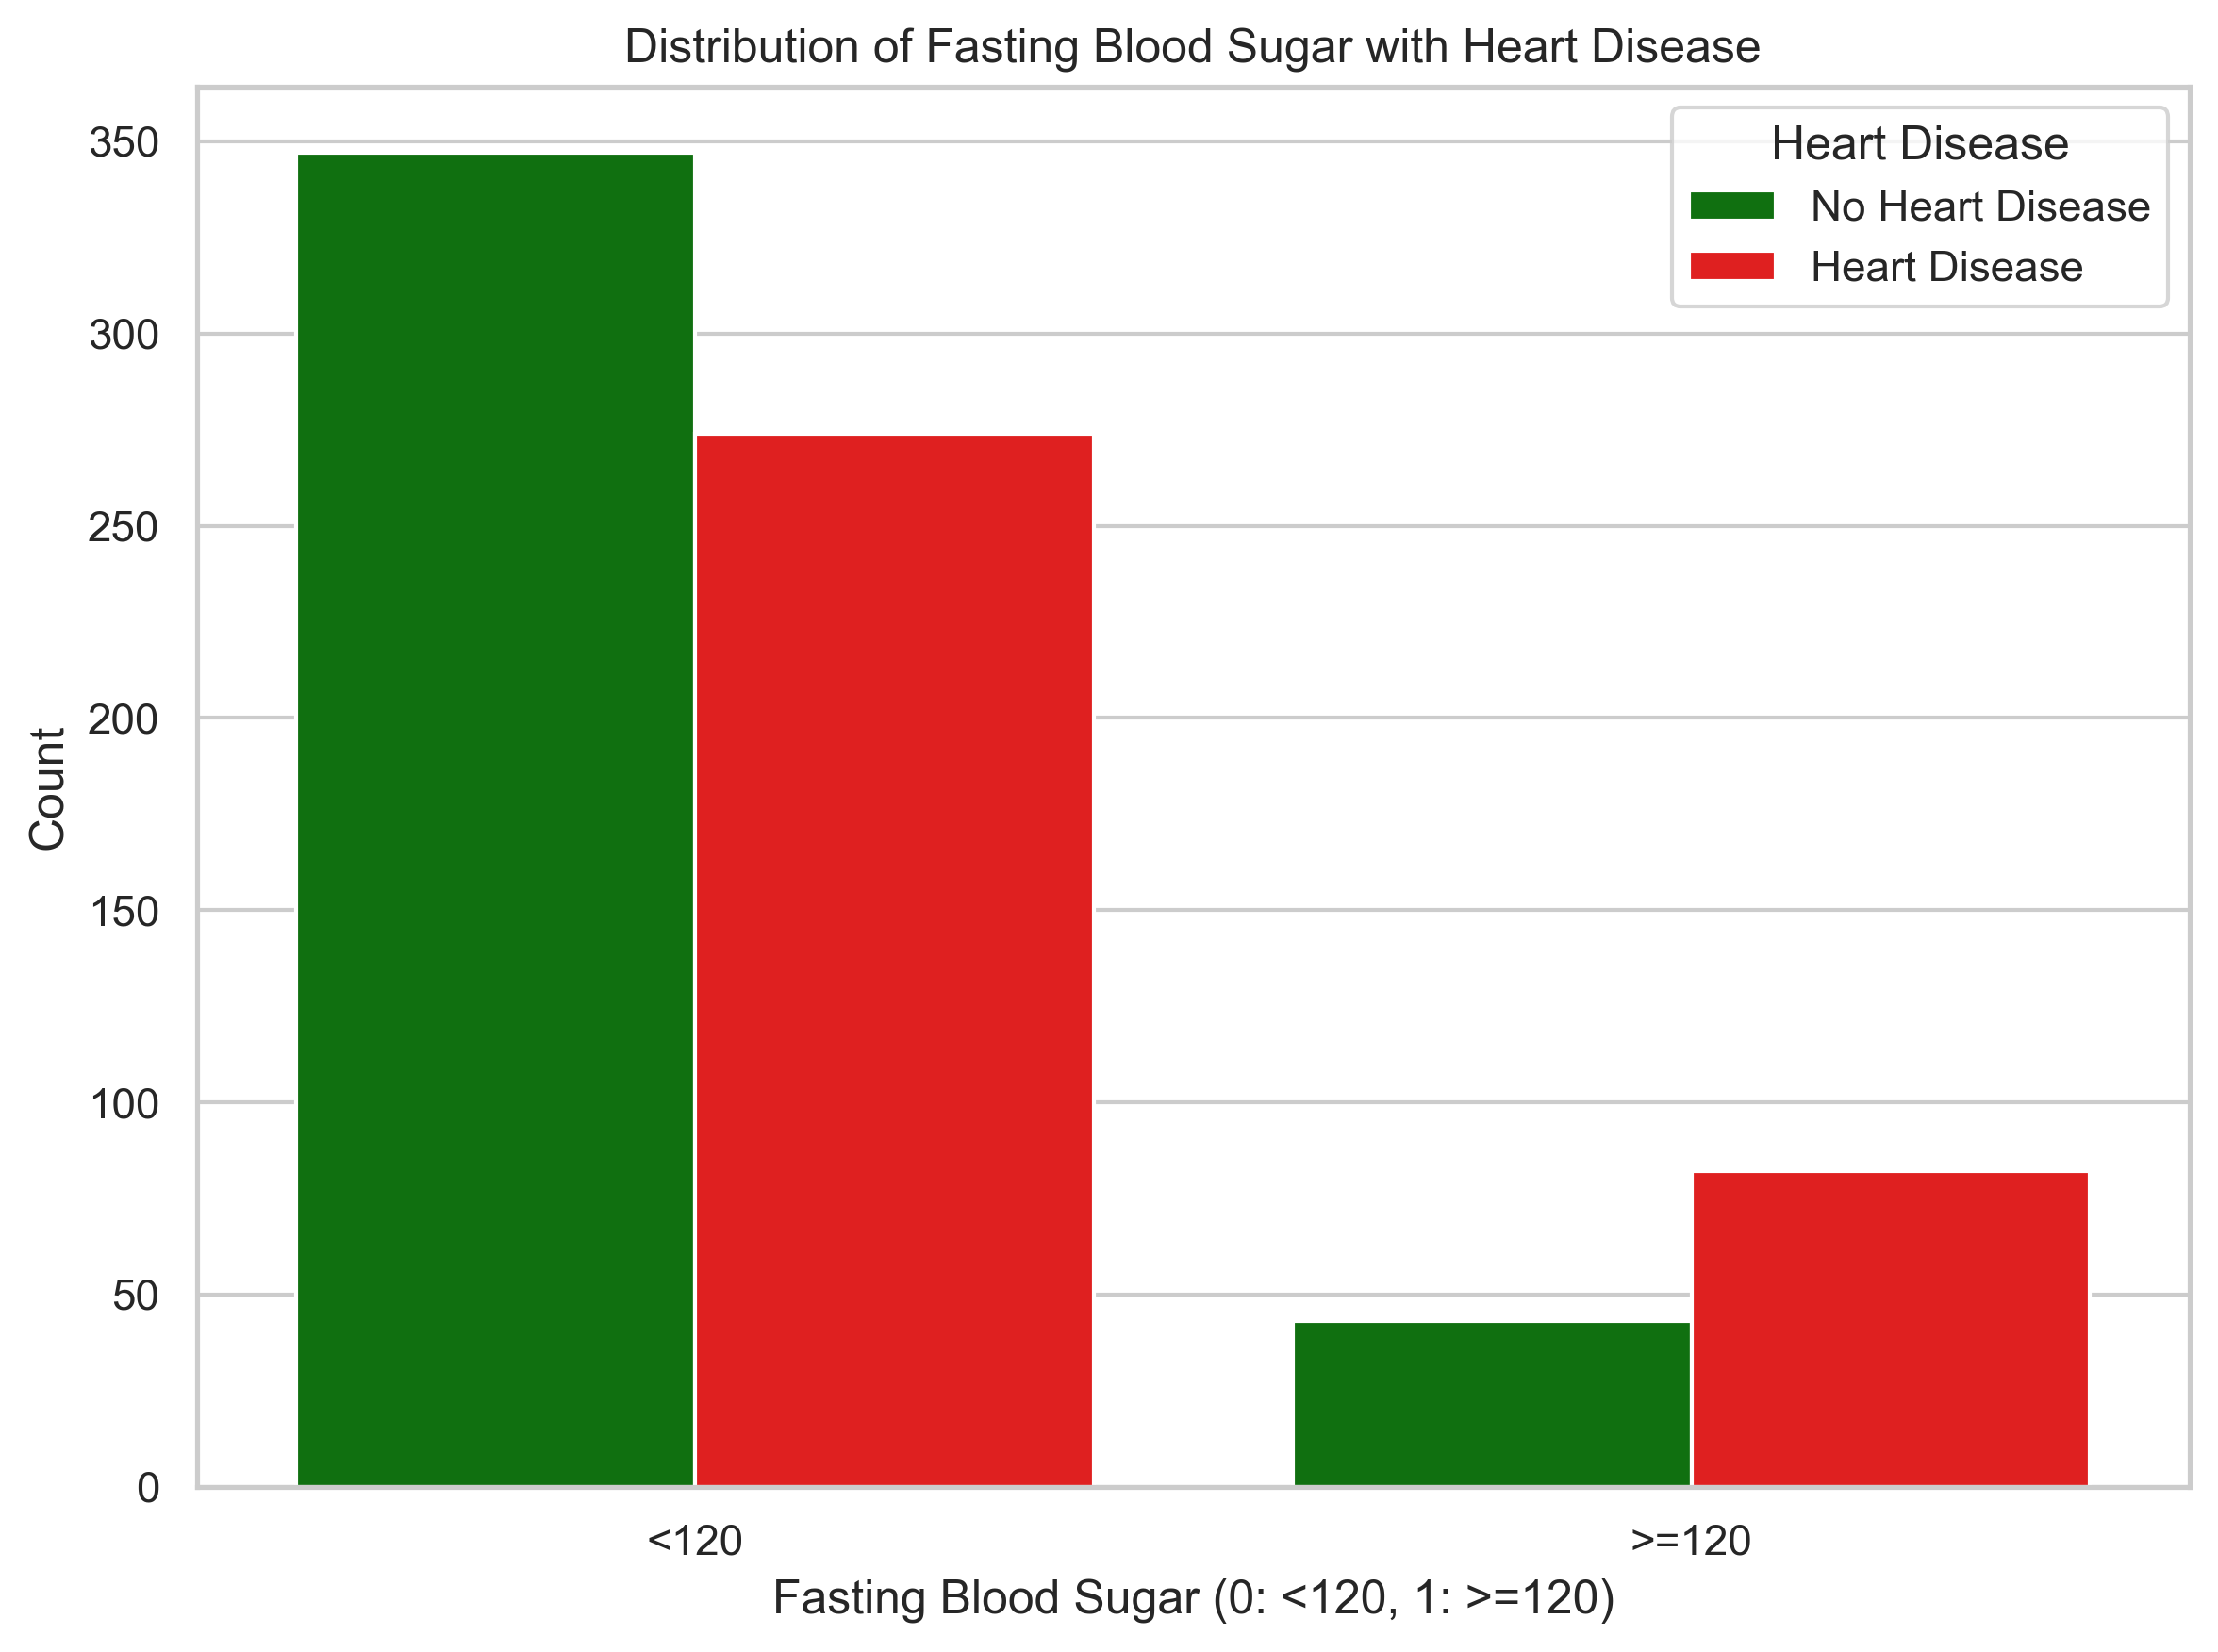

In [94]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='FastingBS', hue='HeartDisease', palette=['green', 'red'])
plt.title('Distribution of Fasting Blood Sugar with Heart Disease')
plt.xlabel('Fasting Blood Sugar (0: <120, 1: >=120)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['<120', '>=120'])
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'])
plt.tight_layout()
plt.show()

C:\Users\SHAHYA~1\AppData\Local\Temp/ipykernel_9776/4253882090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cholesterol_Category'] = pd.cut(data['Cholesterol'], bins=[0, 200, 240, float('inf')],


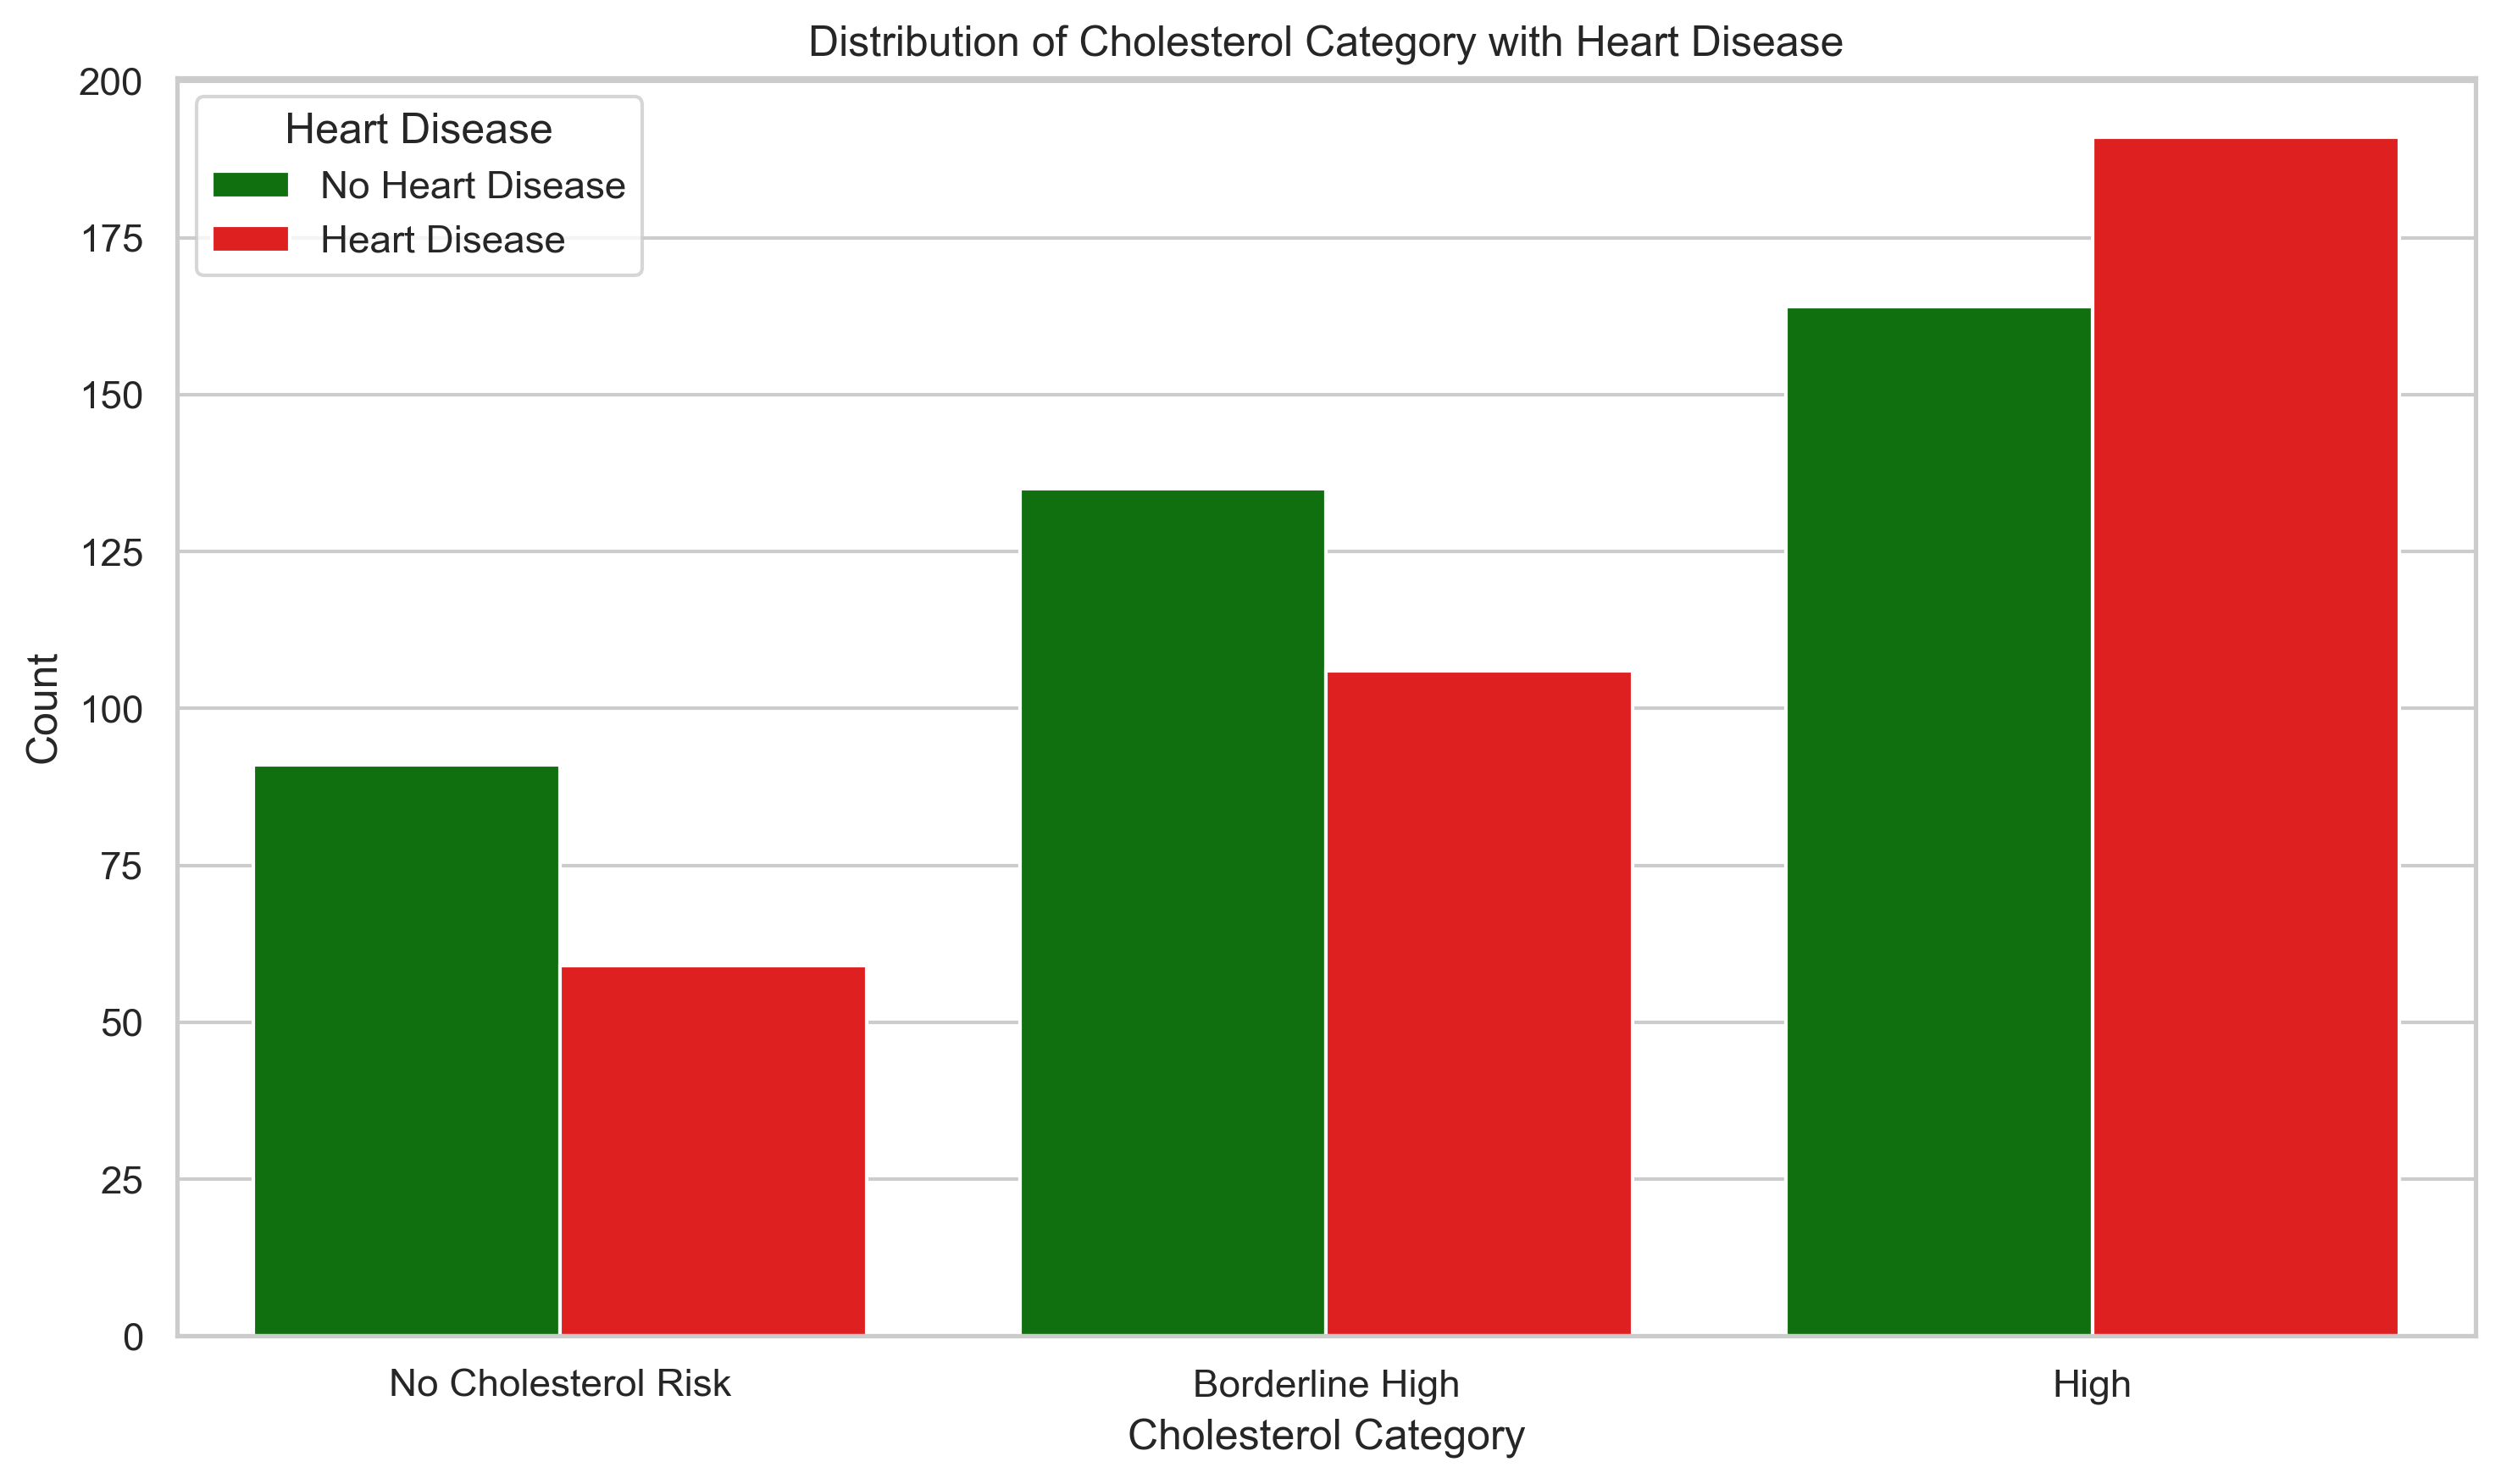

C:\Users\SHAHYA~1\AppData\Local\Temp/ipykernel_9776/4253882090.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('Cholesterol_Category', axis=1, inplace=True)


In [92]:
# Categorize cholesterol levels
data['Cholesterol_Category'] = pd.cut(data['Cholesterol'], bins=[0, 200, 240, float('inf')], 
                                      labels=['No Cholesterol Risk', 'Borderline High', 'High'])

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Cholesterol_Category', hue='HeartDisease', 
              palette=['green', 'red'])
plt.title('Distribution of Cholesterol Category with Heart Disease')
plt.xlabel('Cholesterol Category')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'])
plt.tight_layout()
plt.show()

# Remove the added column
data.drop('Cholesterol_Category', axis=1, inplace=True)

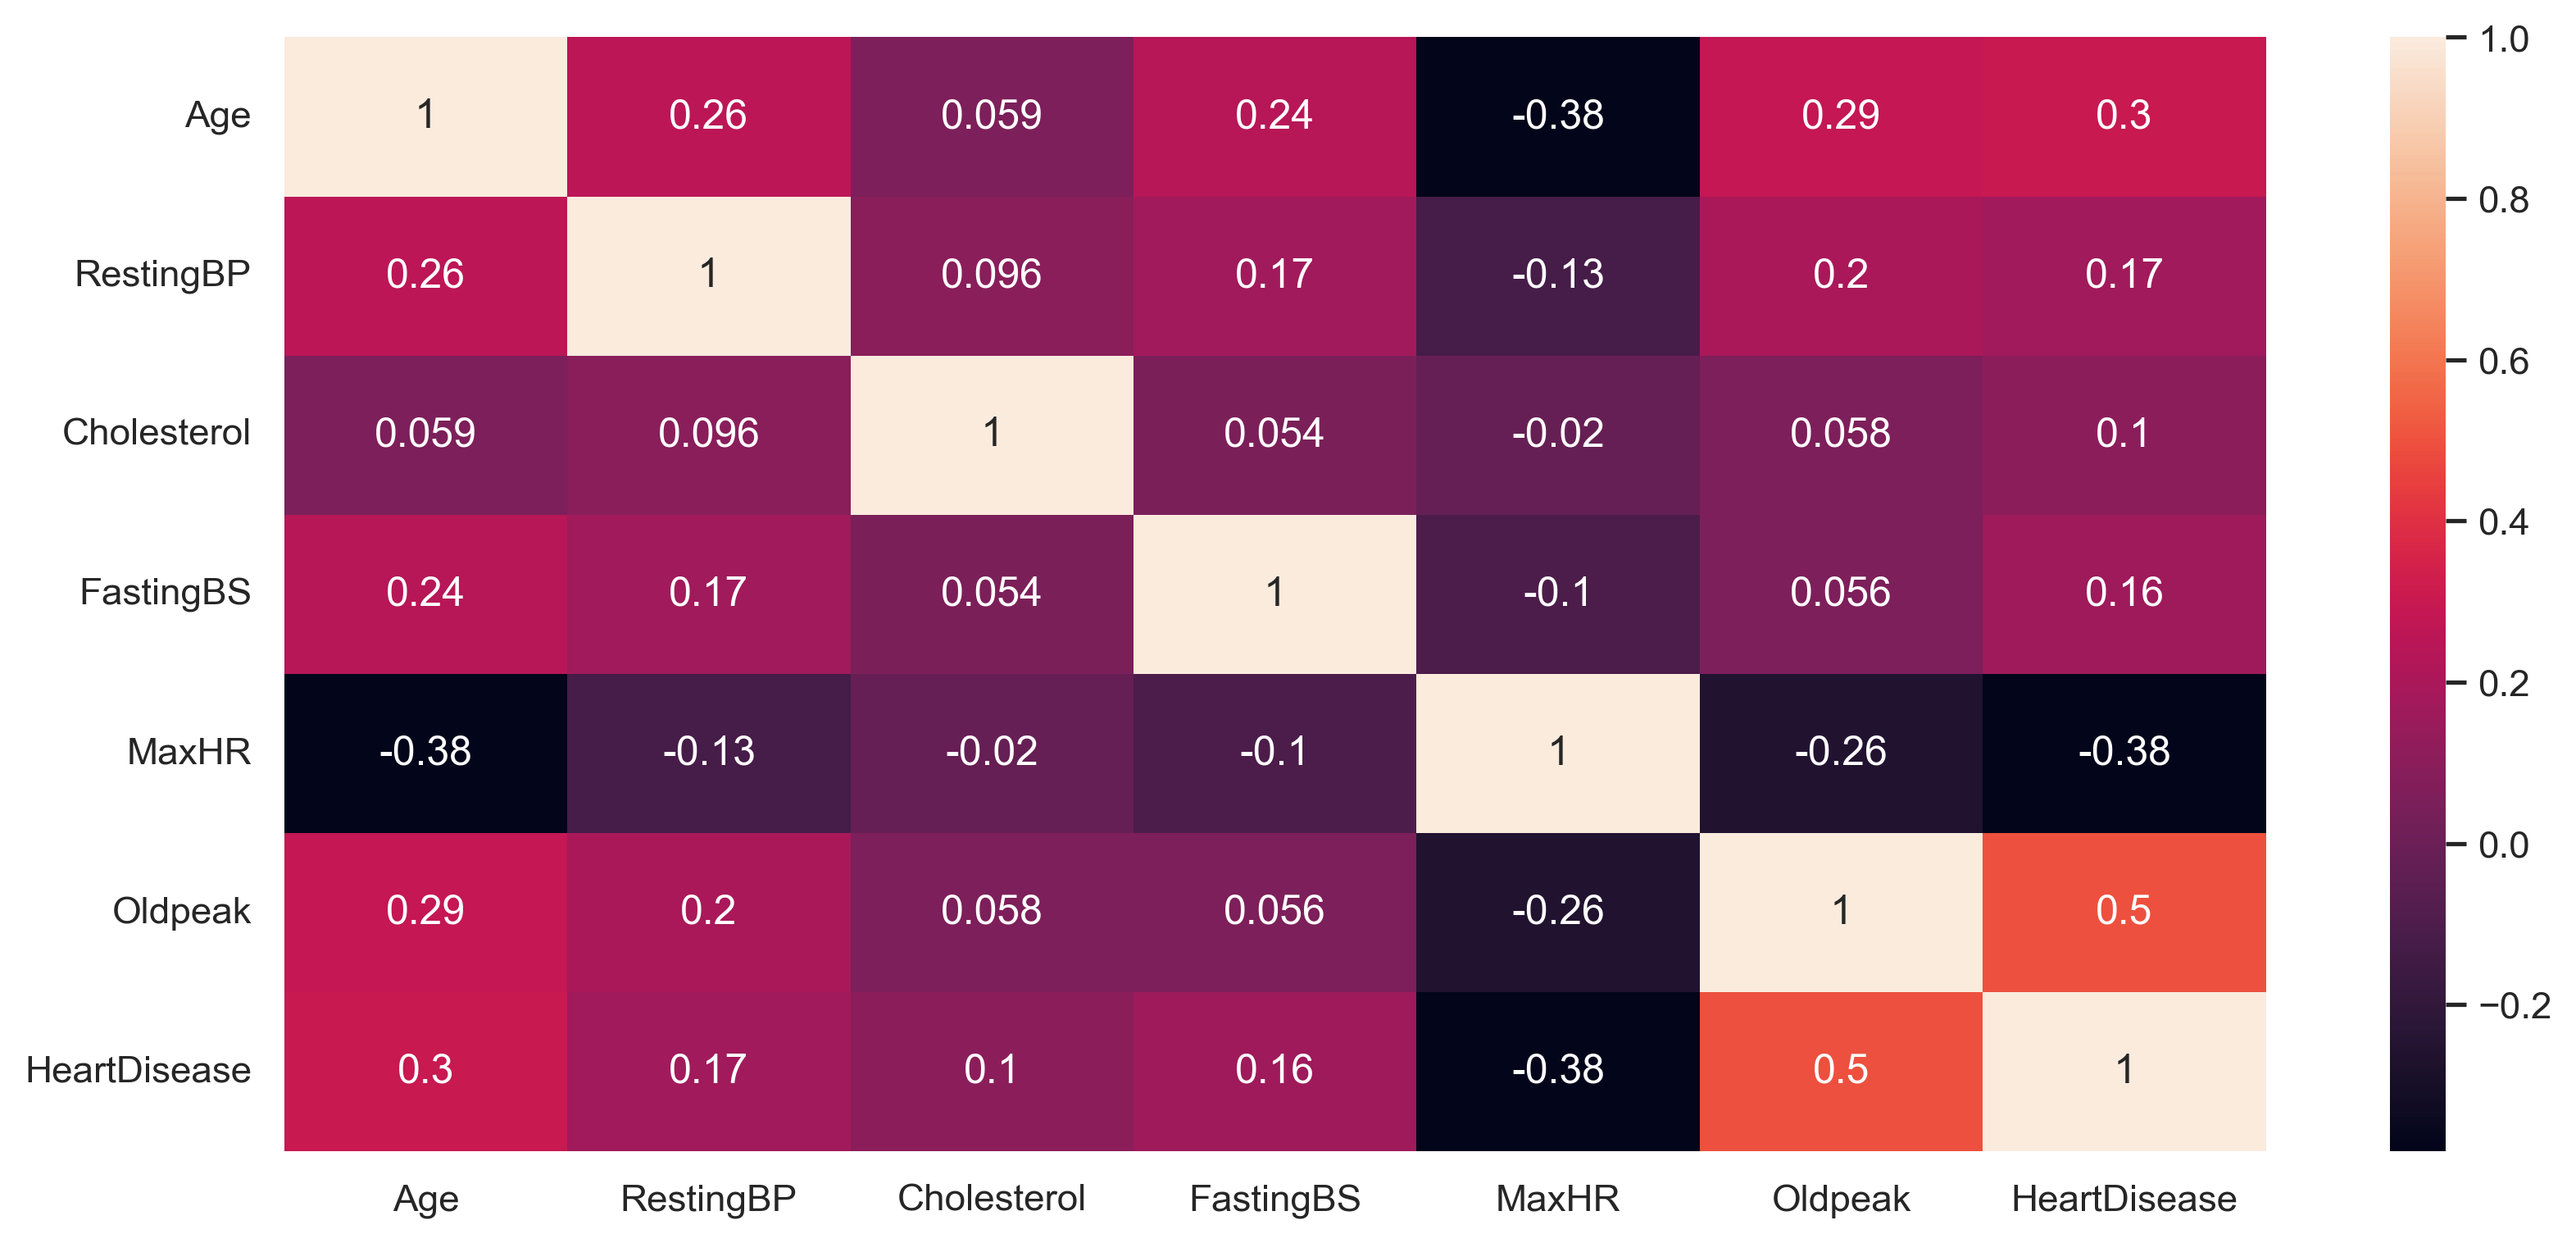

In [17]:
plt.rcParams['figure.dpi'] = 300
sns.set(rc = {'figure.figsize':(13,6)})
corr_data = sns.heatmap(data.corr(), annot=True)
plt.show()

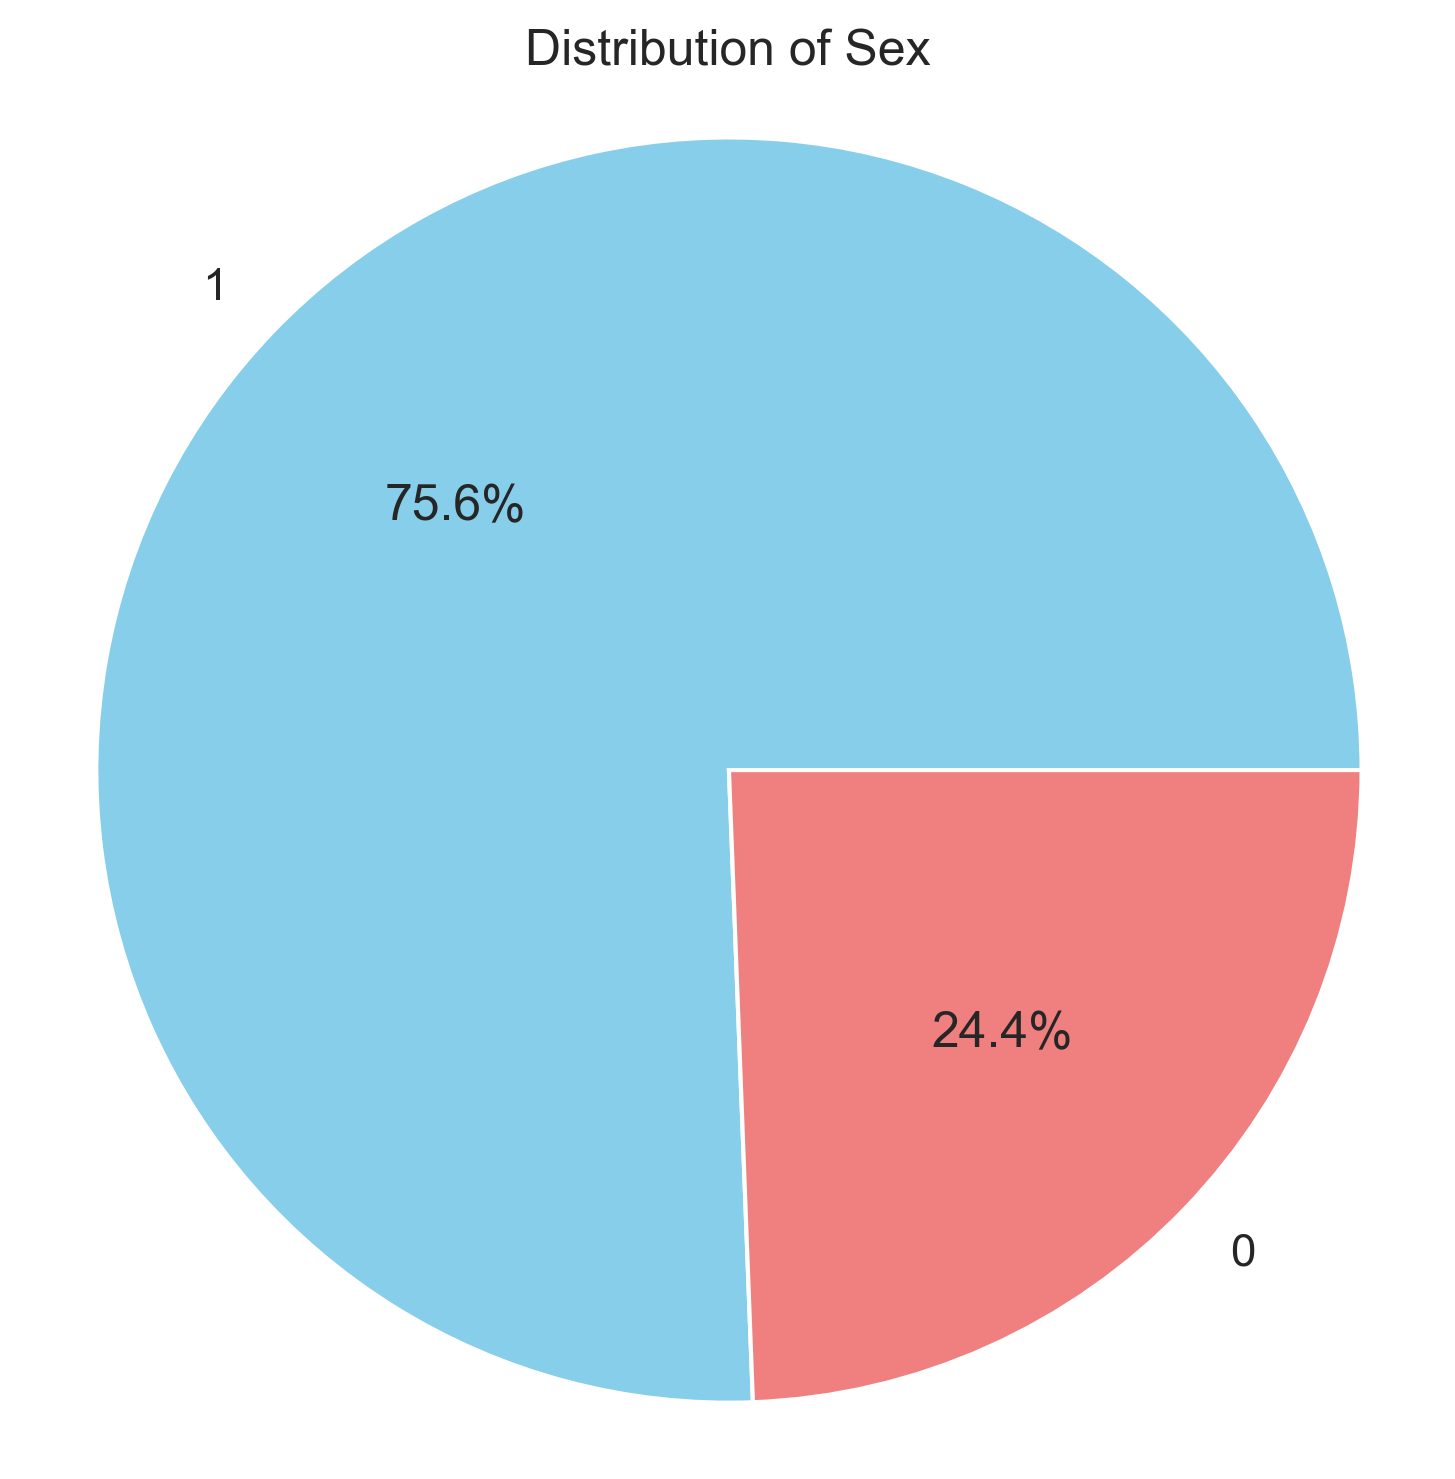

In [87]:
# Count the occurrences of each sex category
sex_counts = data['Sex'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Sex')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

C:\Users\SHAHYA~1\AppData\Local\Temp/ipykernel_9776/2111506588.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AgeCategory'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)


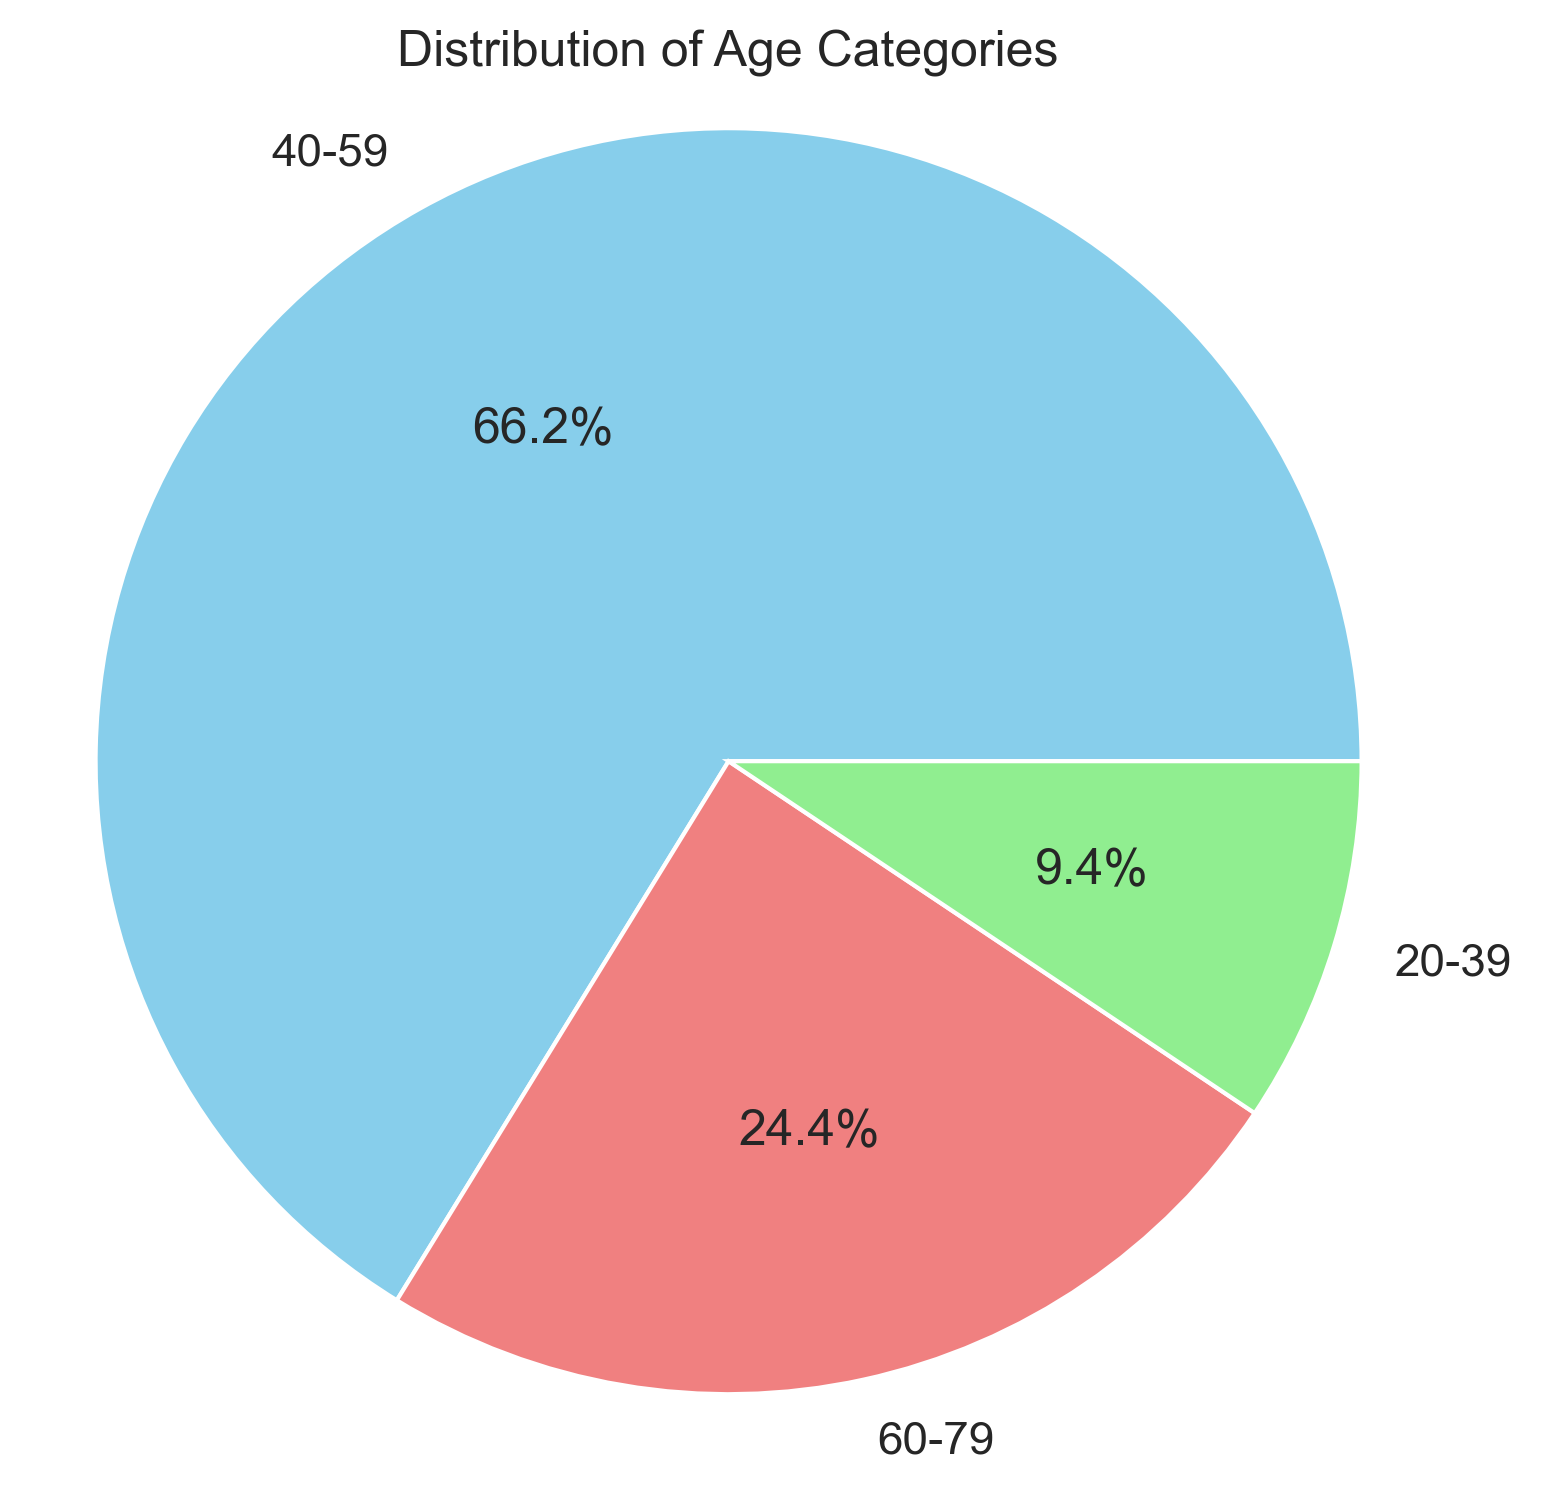

In [86]:
# Create age categories
age_bins = [20, 40, 60, 80]
age_labels = ['20-39', '40-59', '60-79']
data['AgeCategory'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Count the occurrences of each age category
age_counts = data['AgeCategory'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Age Categories')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

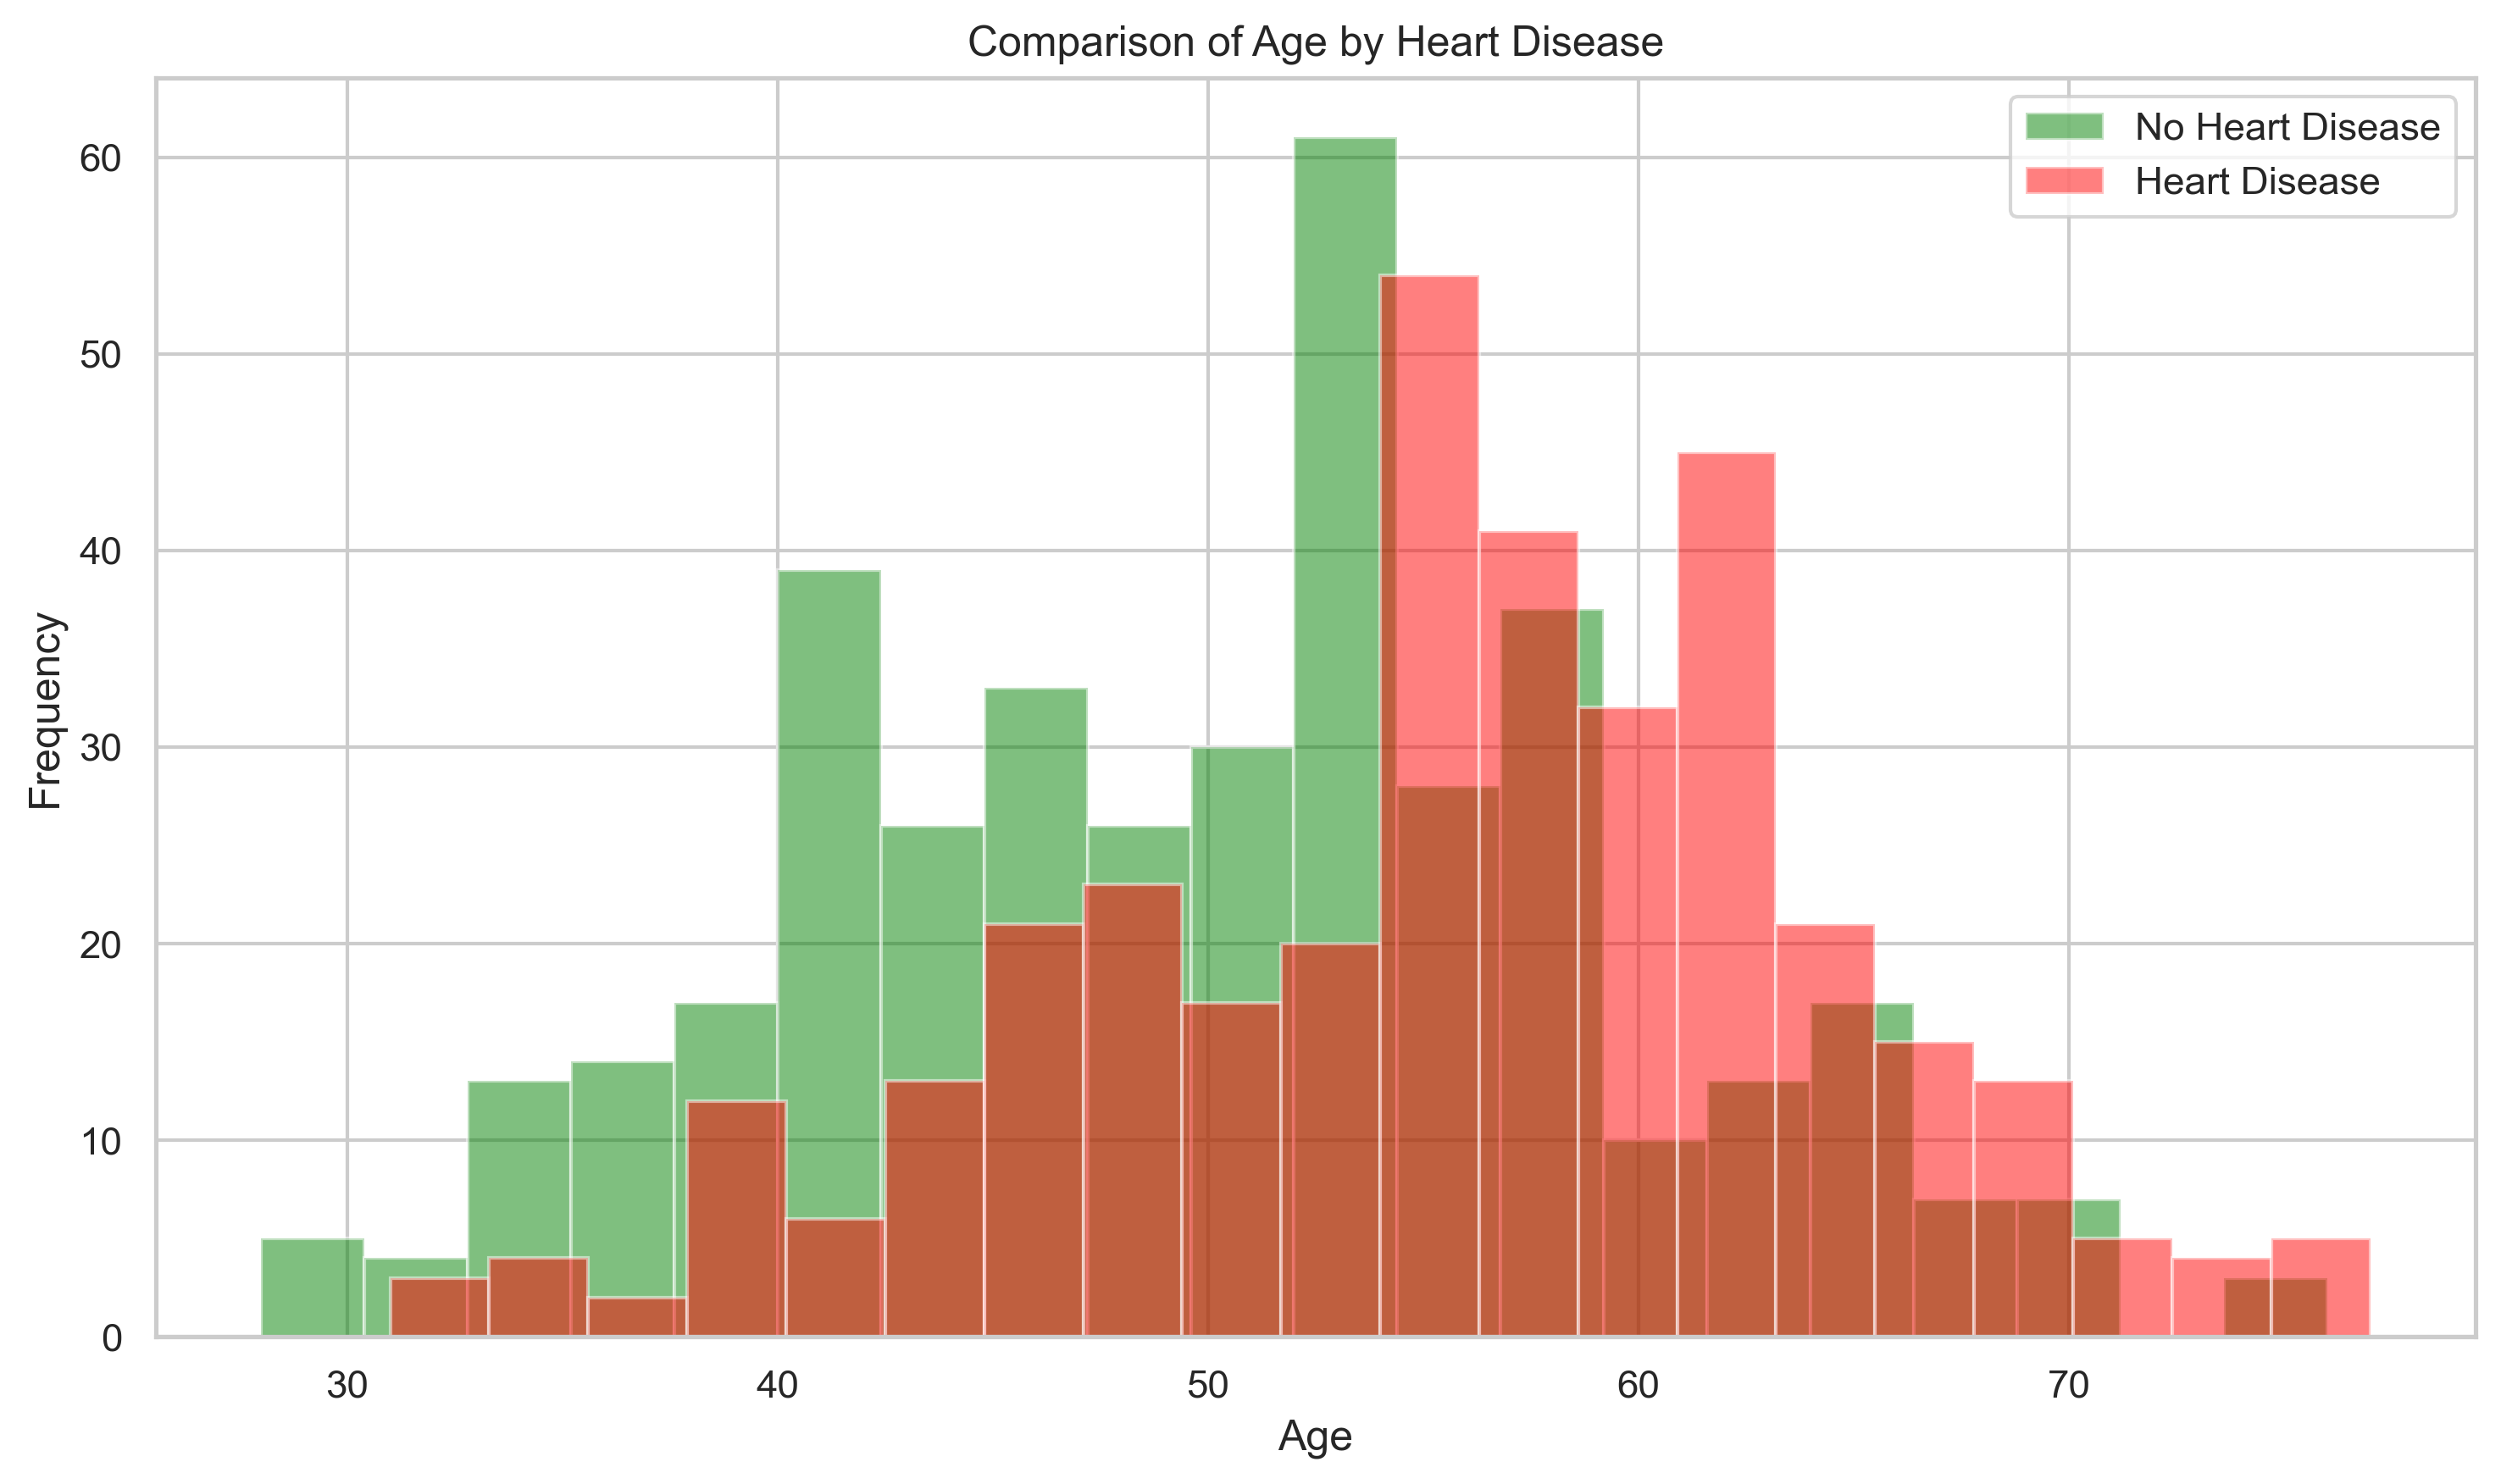

In [77]:
plt.figure(figsize=(10, 6))

# Plot histogram for individuals without heart disease
plt.hist(data[data['HeartDisease'] == 0]['Age'], bins=20, alpha=0.5, color='green', label='No Heart Disease')

# Plot histogram for individuals with heart disease
plt.hist(data[data['HeartDisease'] == 1]['Age'], bins=20, alpha=0.5, color='red', label='Heart Disease')

plt.title('Comparison of Age by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

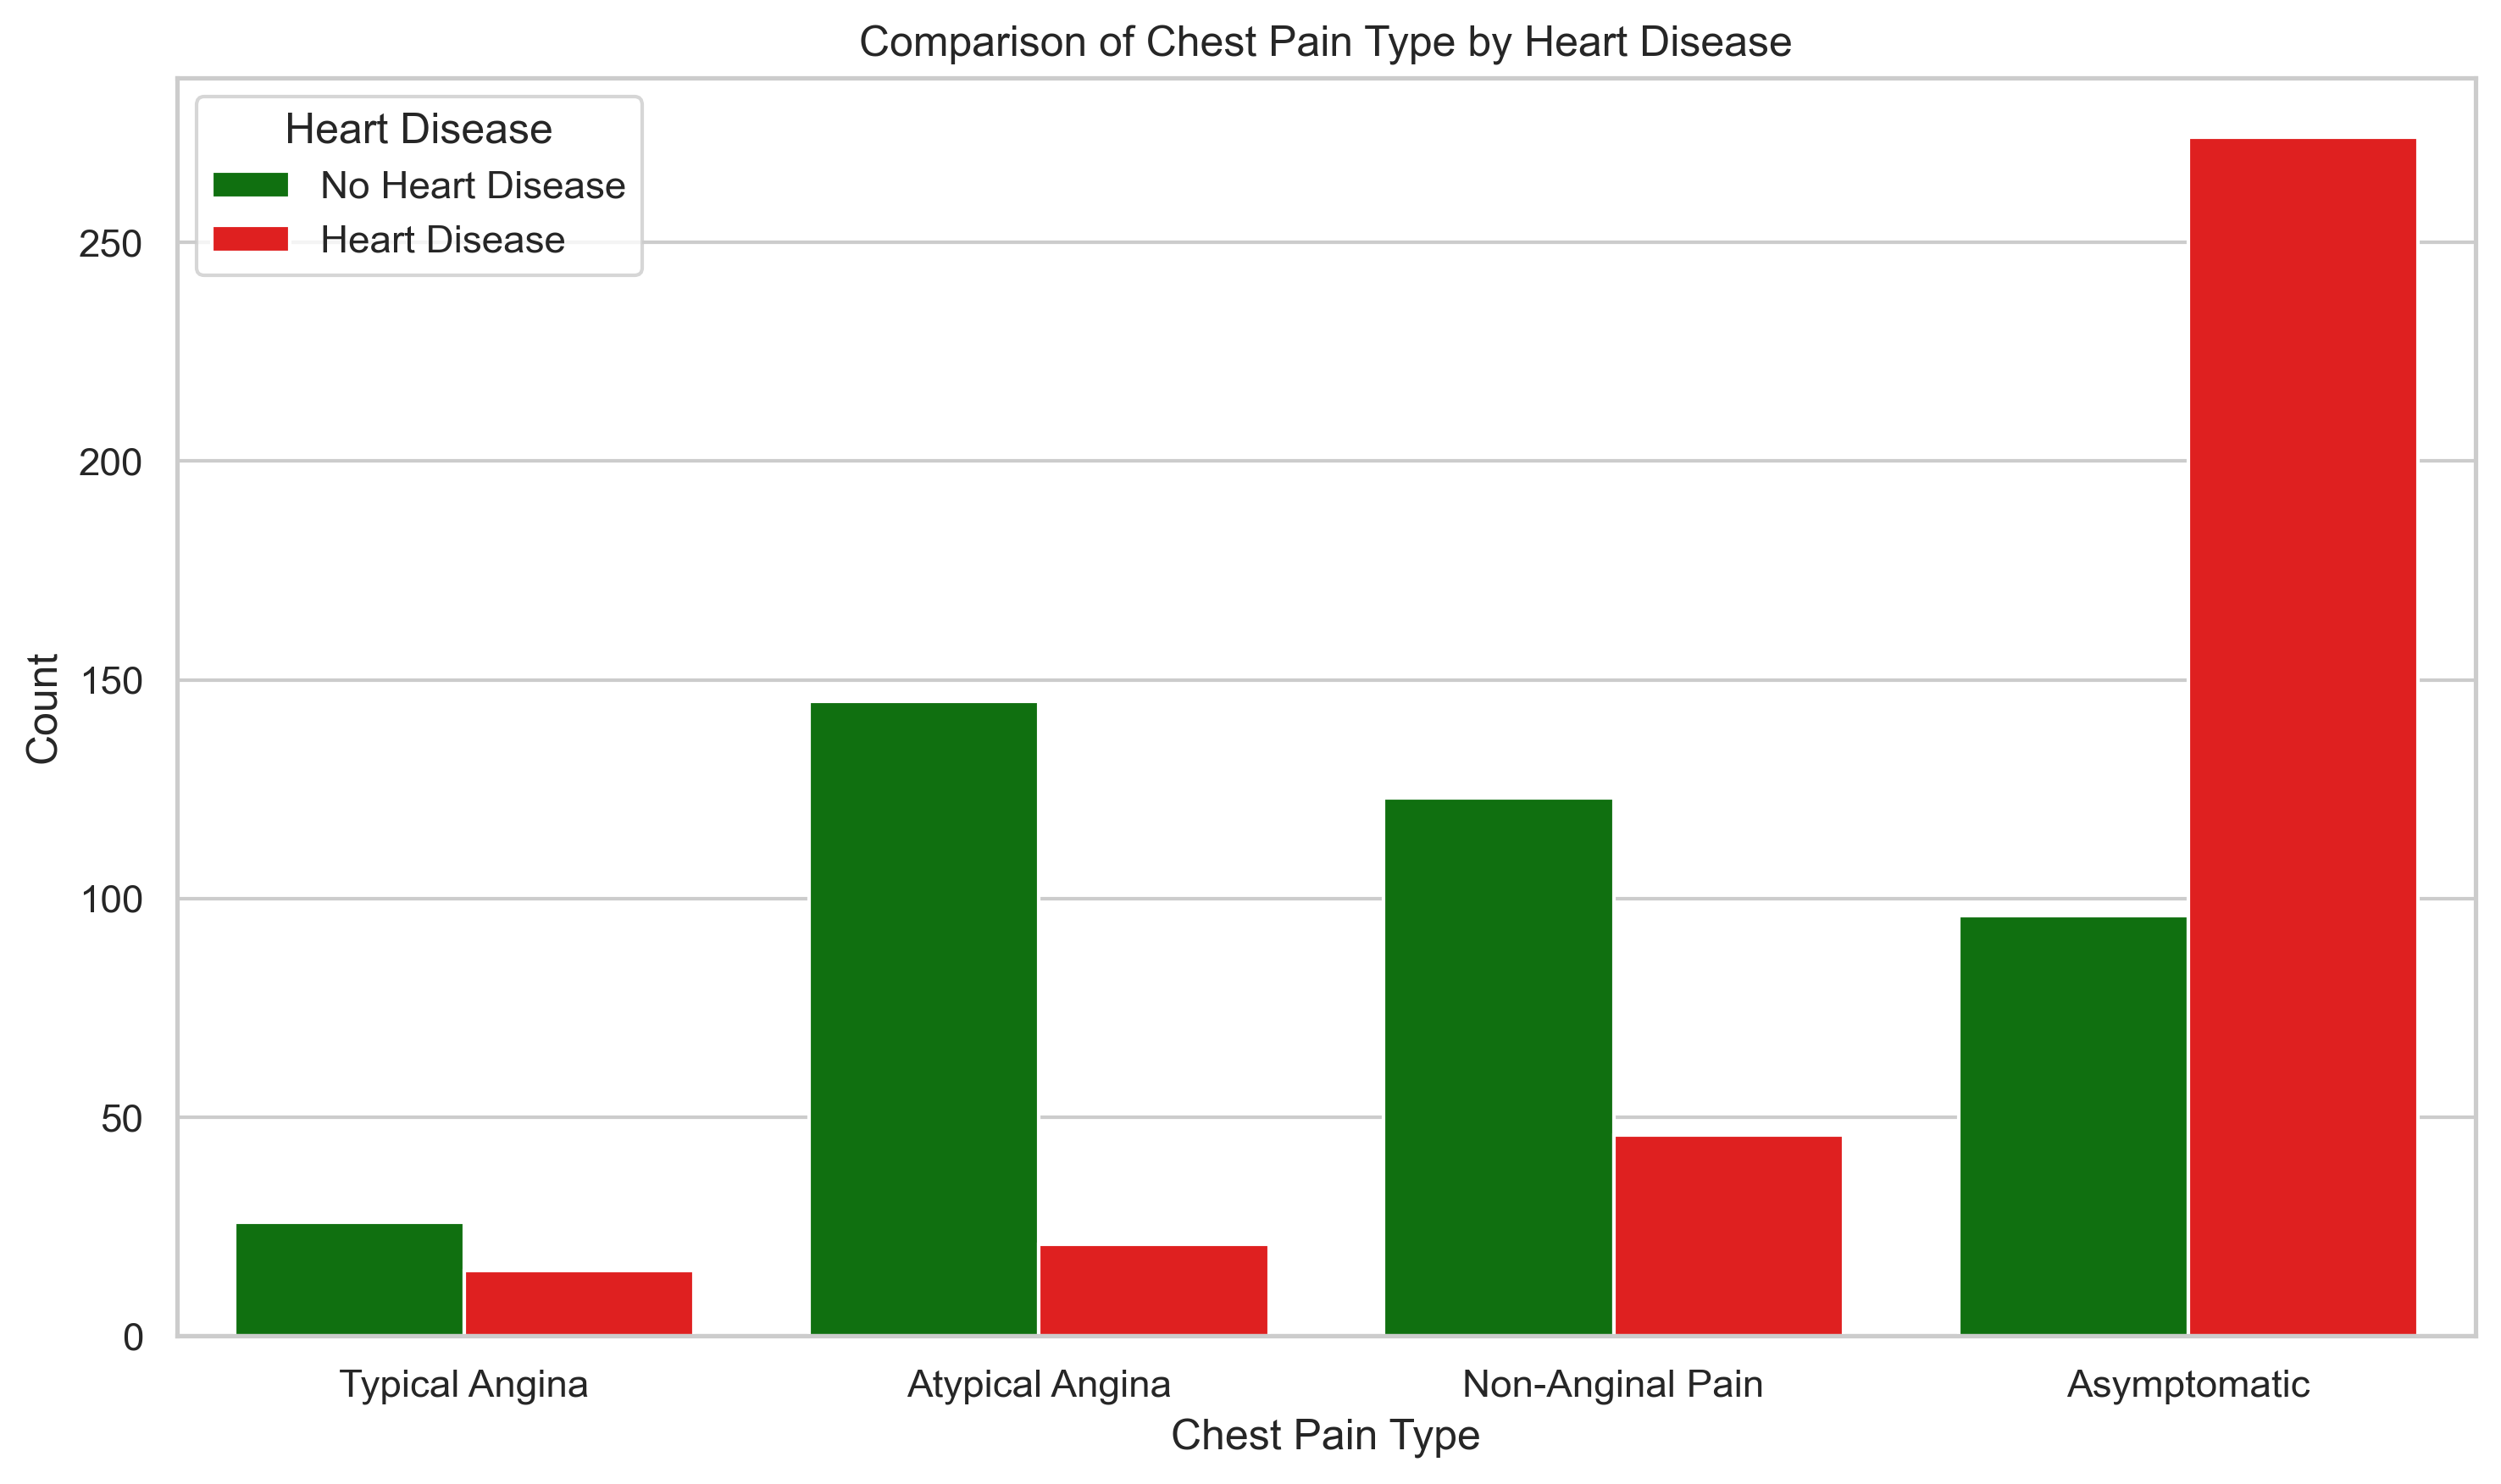

In [82]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='ChestPainType', hue='HeartDisease', palette=['green', 'red'])
plt.title('Comparison of Chest Pain Type by Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'])
plt.tight_layout()
plt.show()

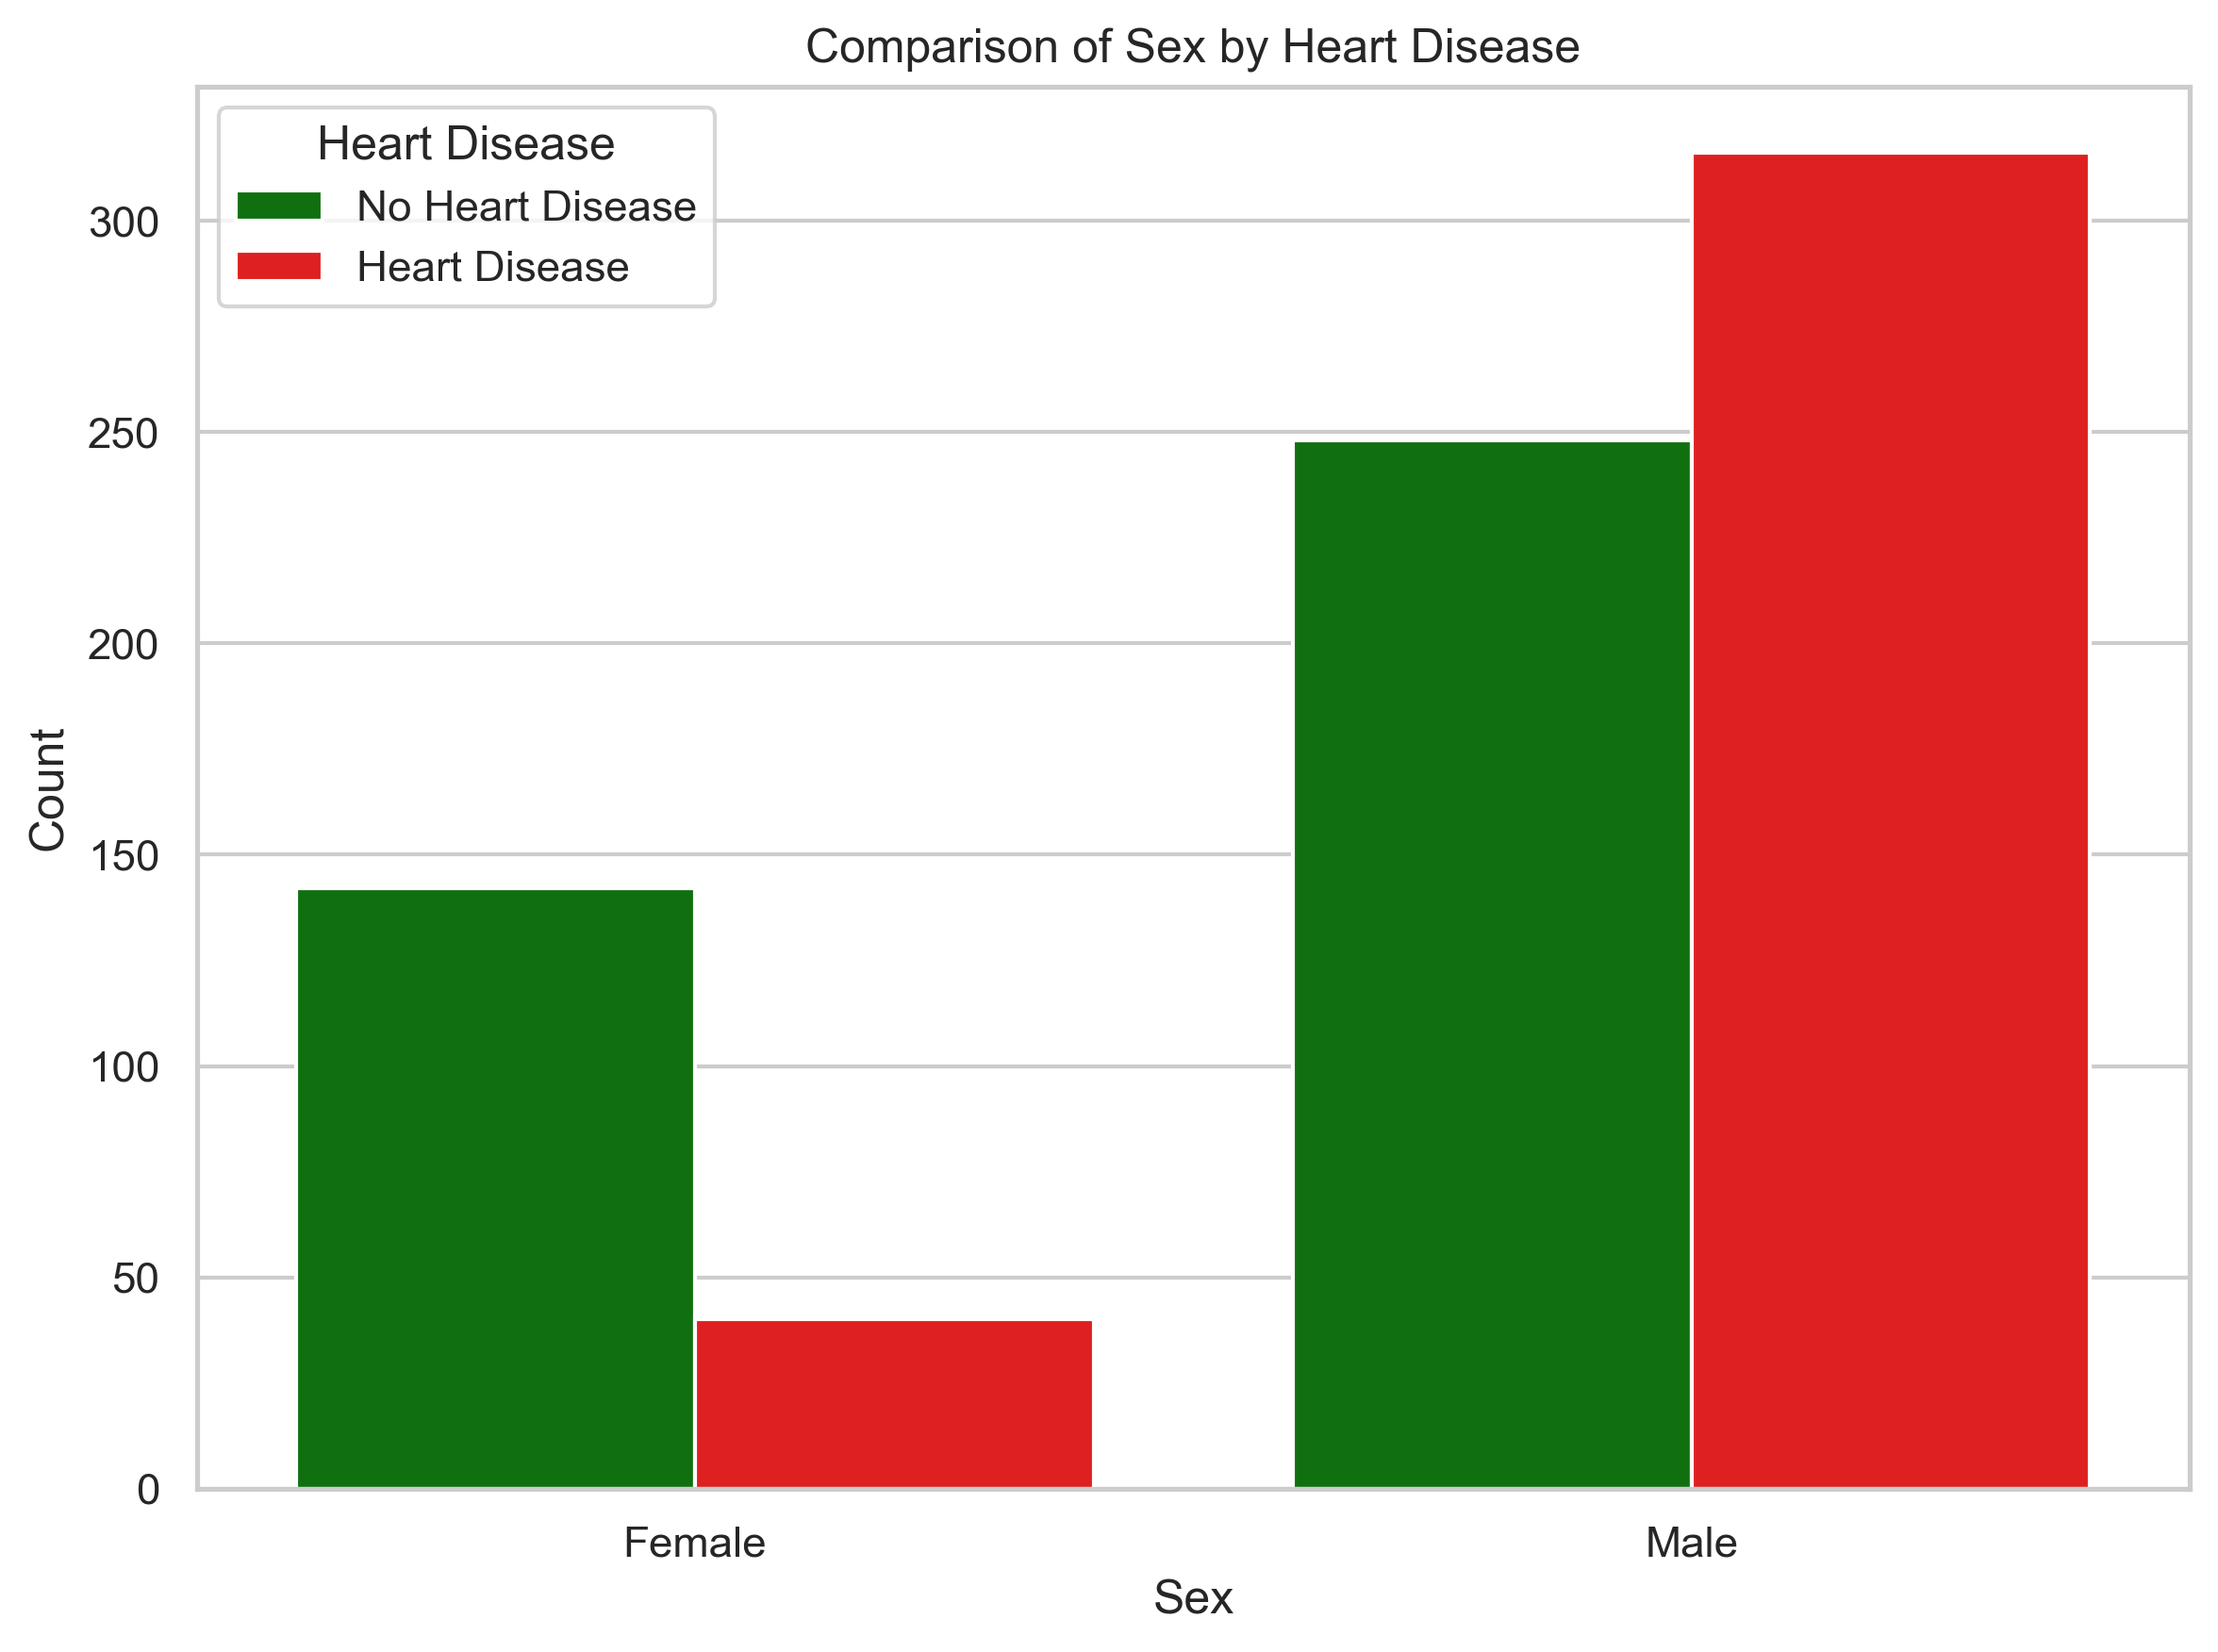

In [79]:

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Sex', hue='HeartDisease', palette=['green', 'red'])
plt.title('Comparison of Sex by Heart Disease')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'])
plt.tight_layout()
plt.show()

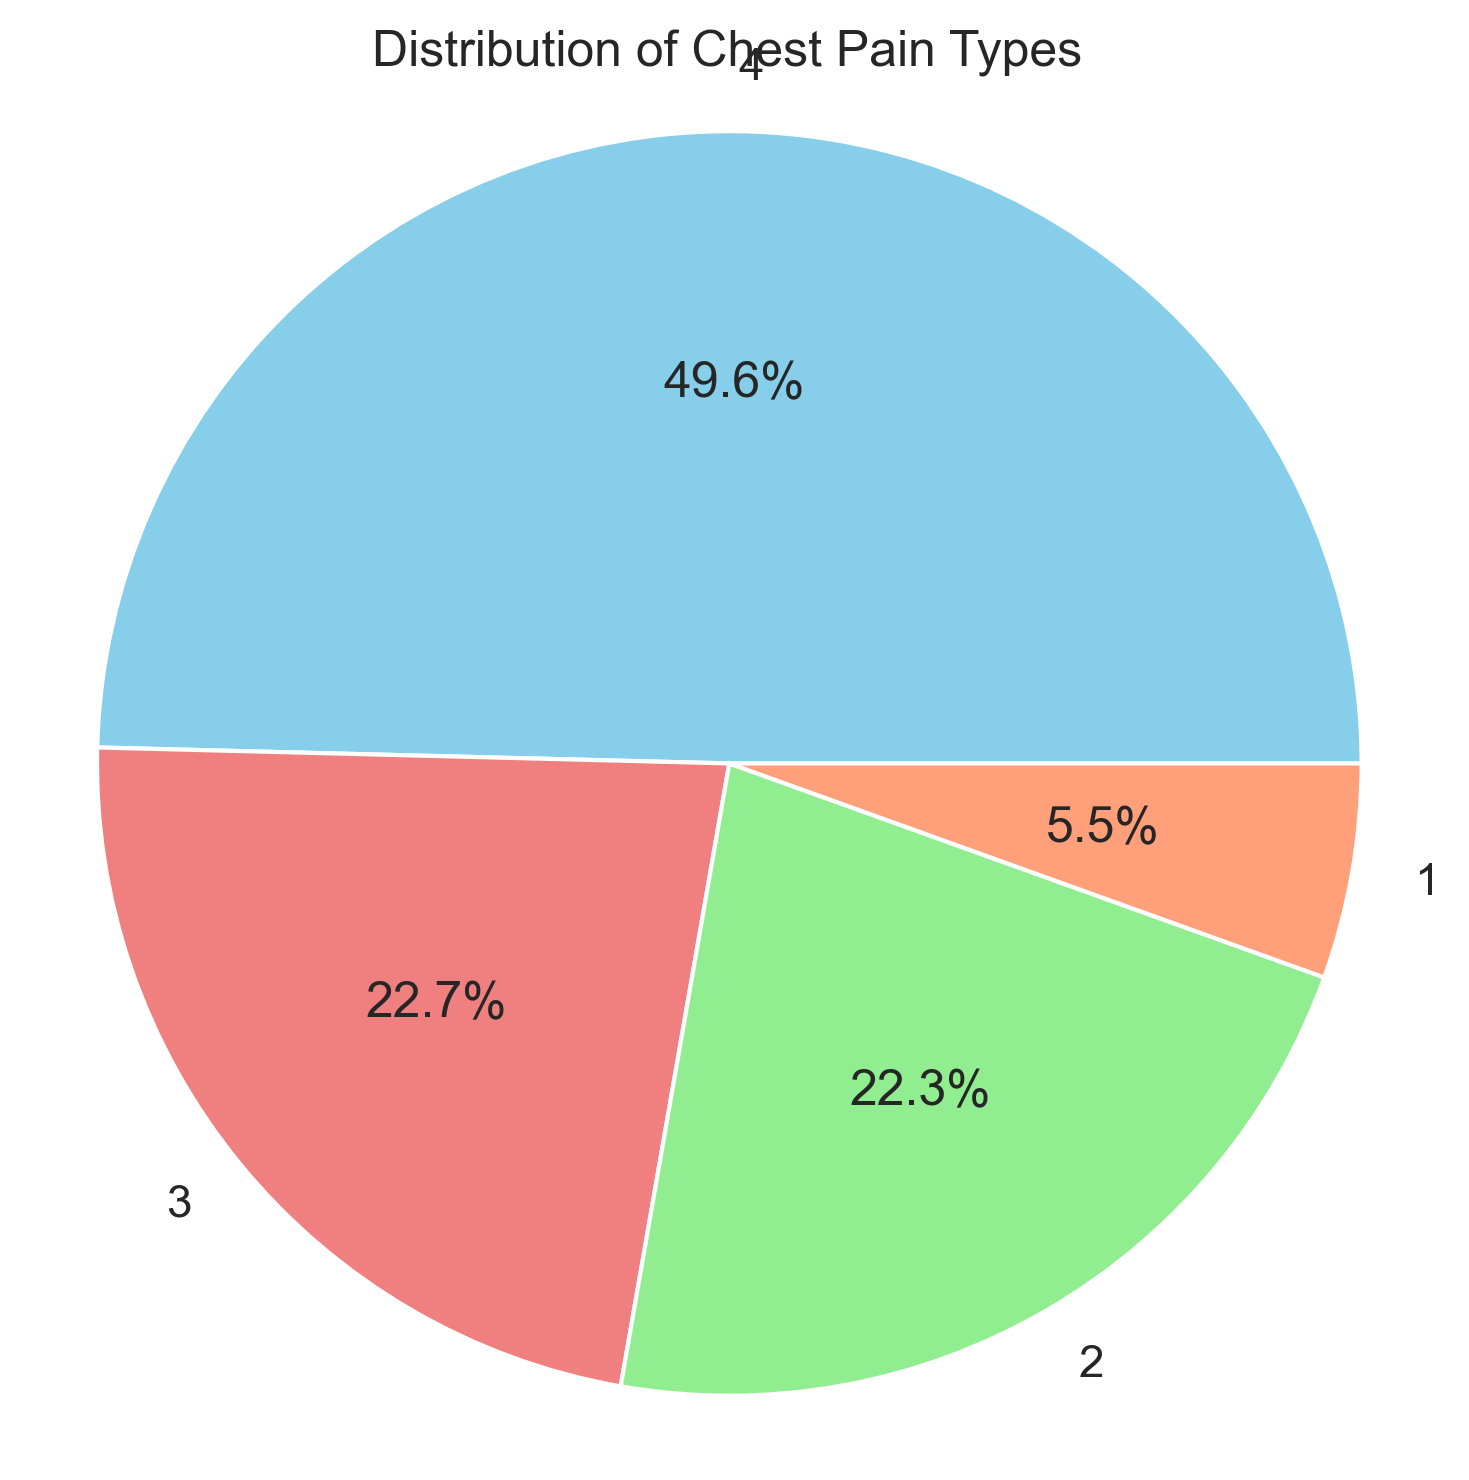

In [85]:
chest_pain_counts = data['ChestPainType'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(chest_pain_counts, labels=chest_pain_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon'])
plt.title('Distribution of Chest Pain Types')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

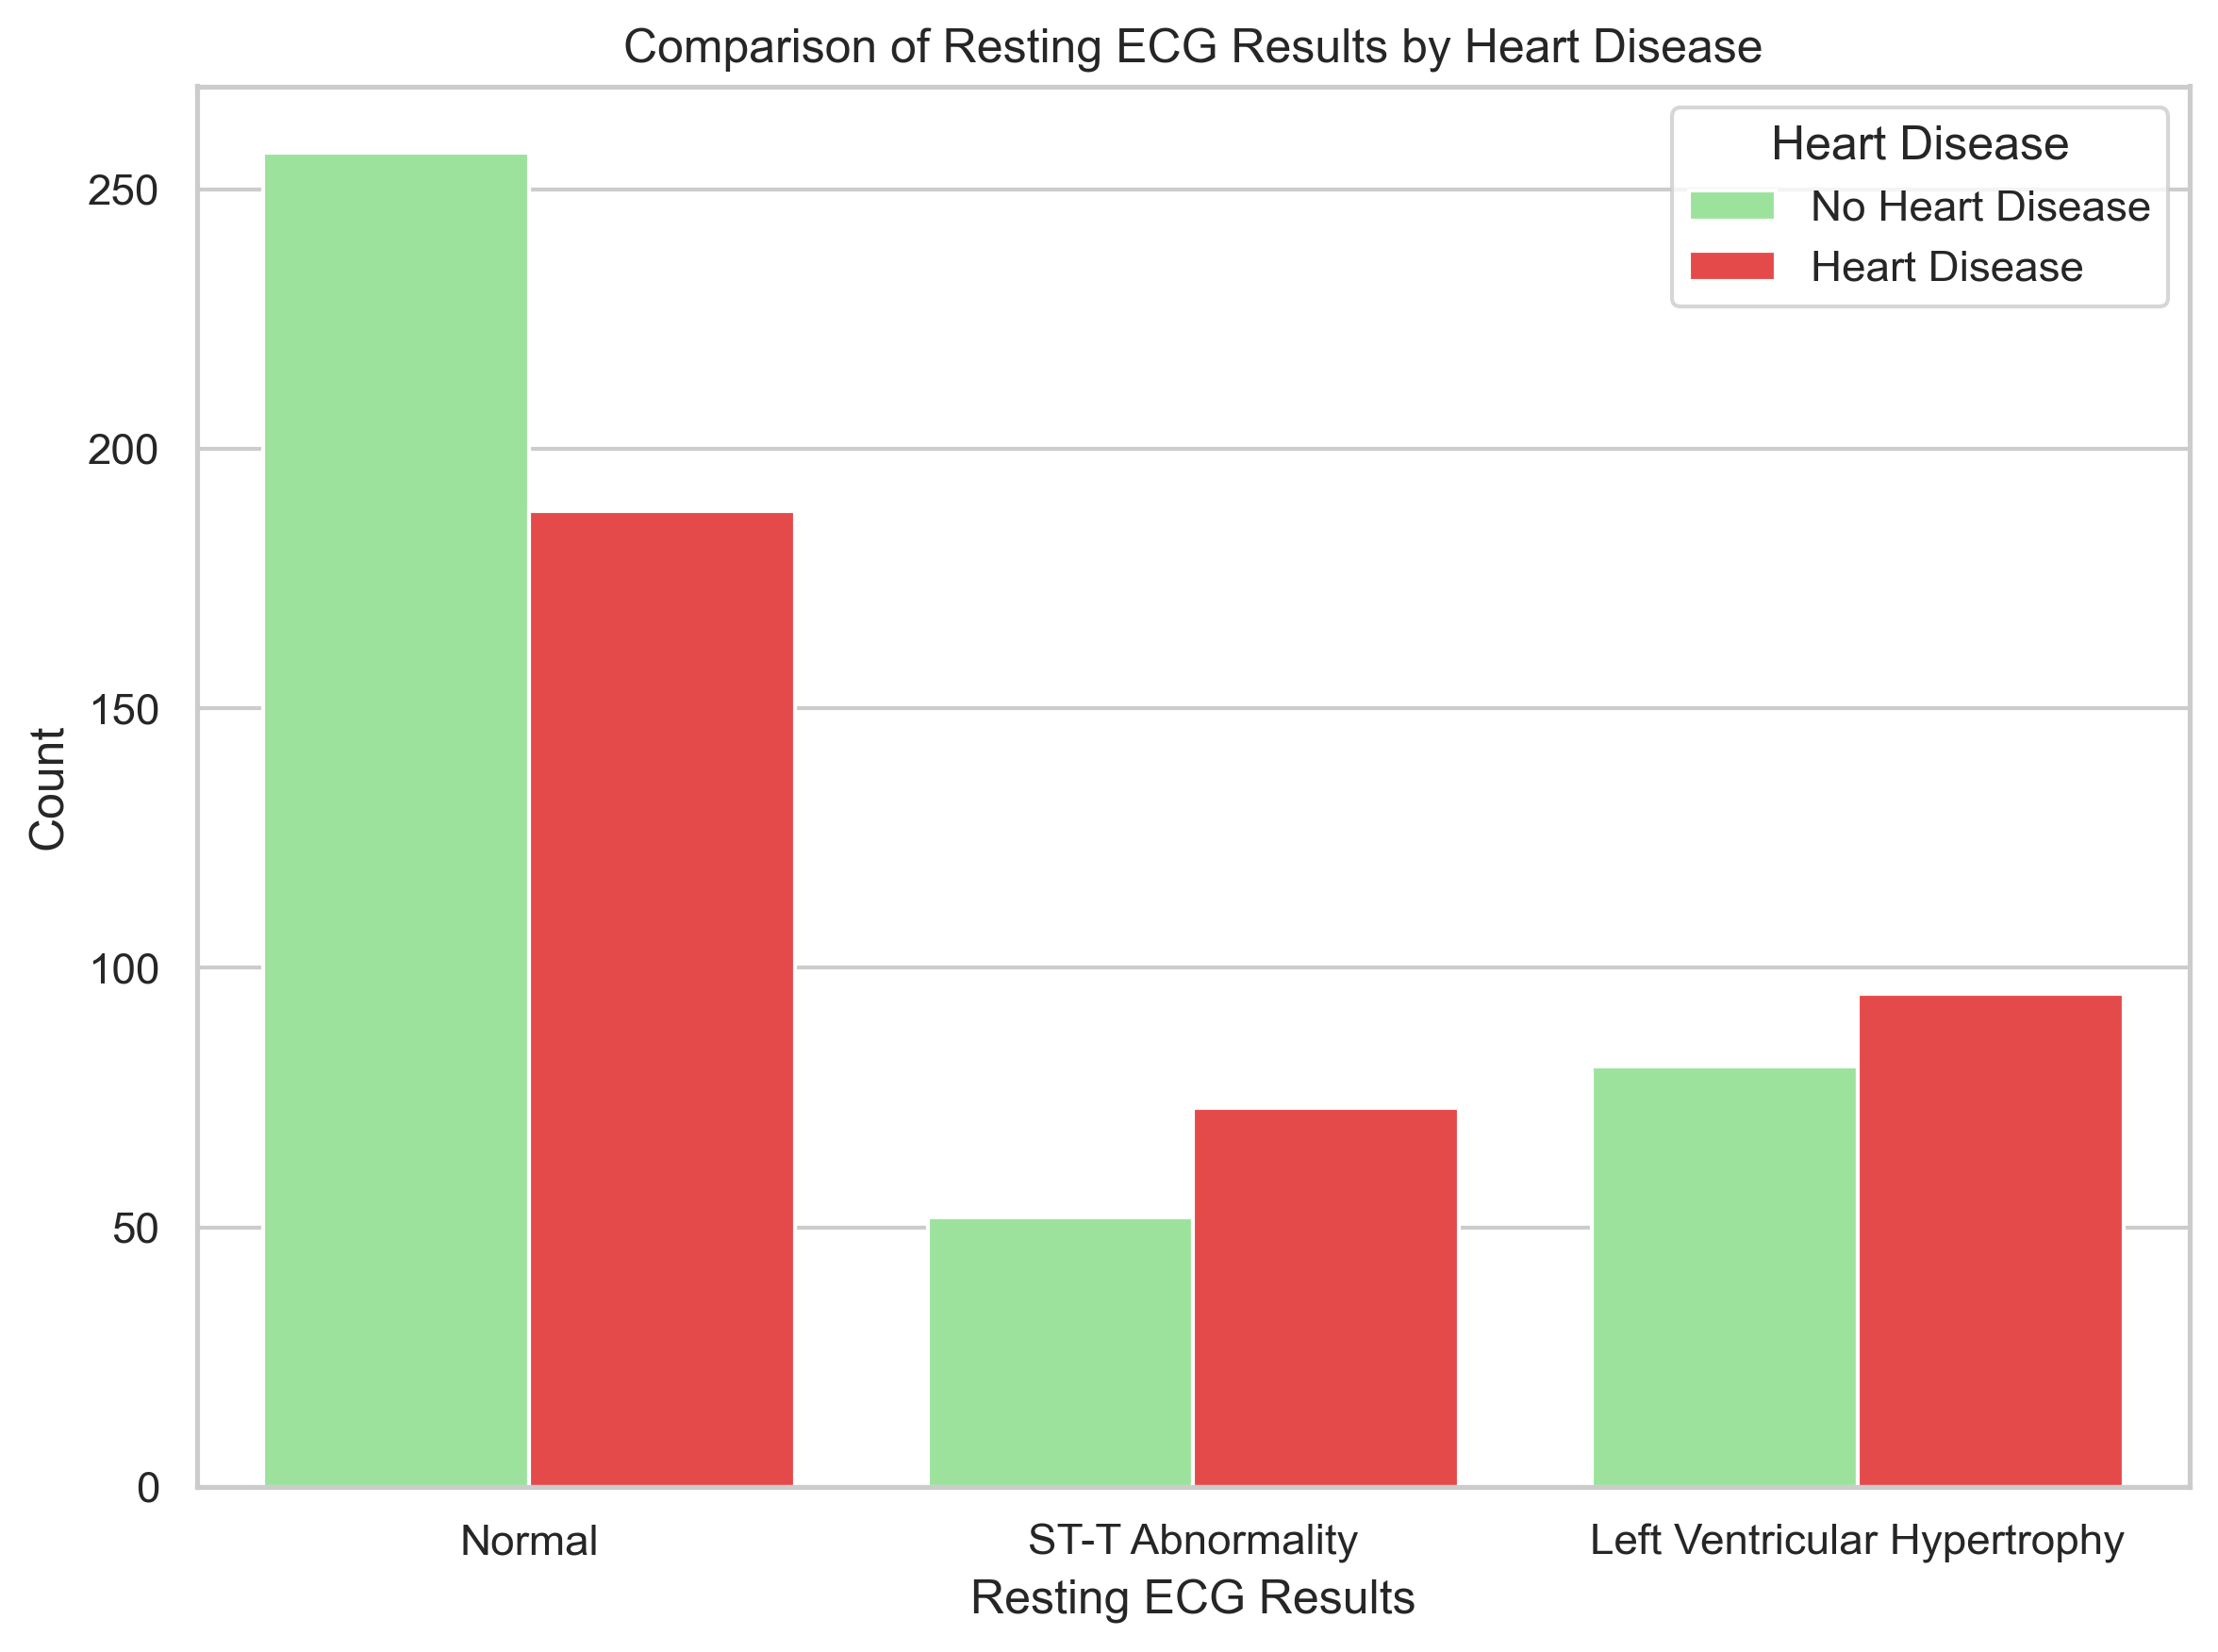

In [84]:

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='RestingECG', hue='HeartDisease', palette=['lightgreen', '#FF3030'])
plt.title('Comparison of Resting ECG Results by Heart Disease')
plt.xlabel('Resting ECG Results')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Normal', 'ST-T Abnormality', 'Left Ventricular Hypertrophy'])
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'])
plt.tight_layout()
plt.show()

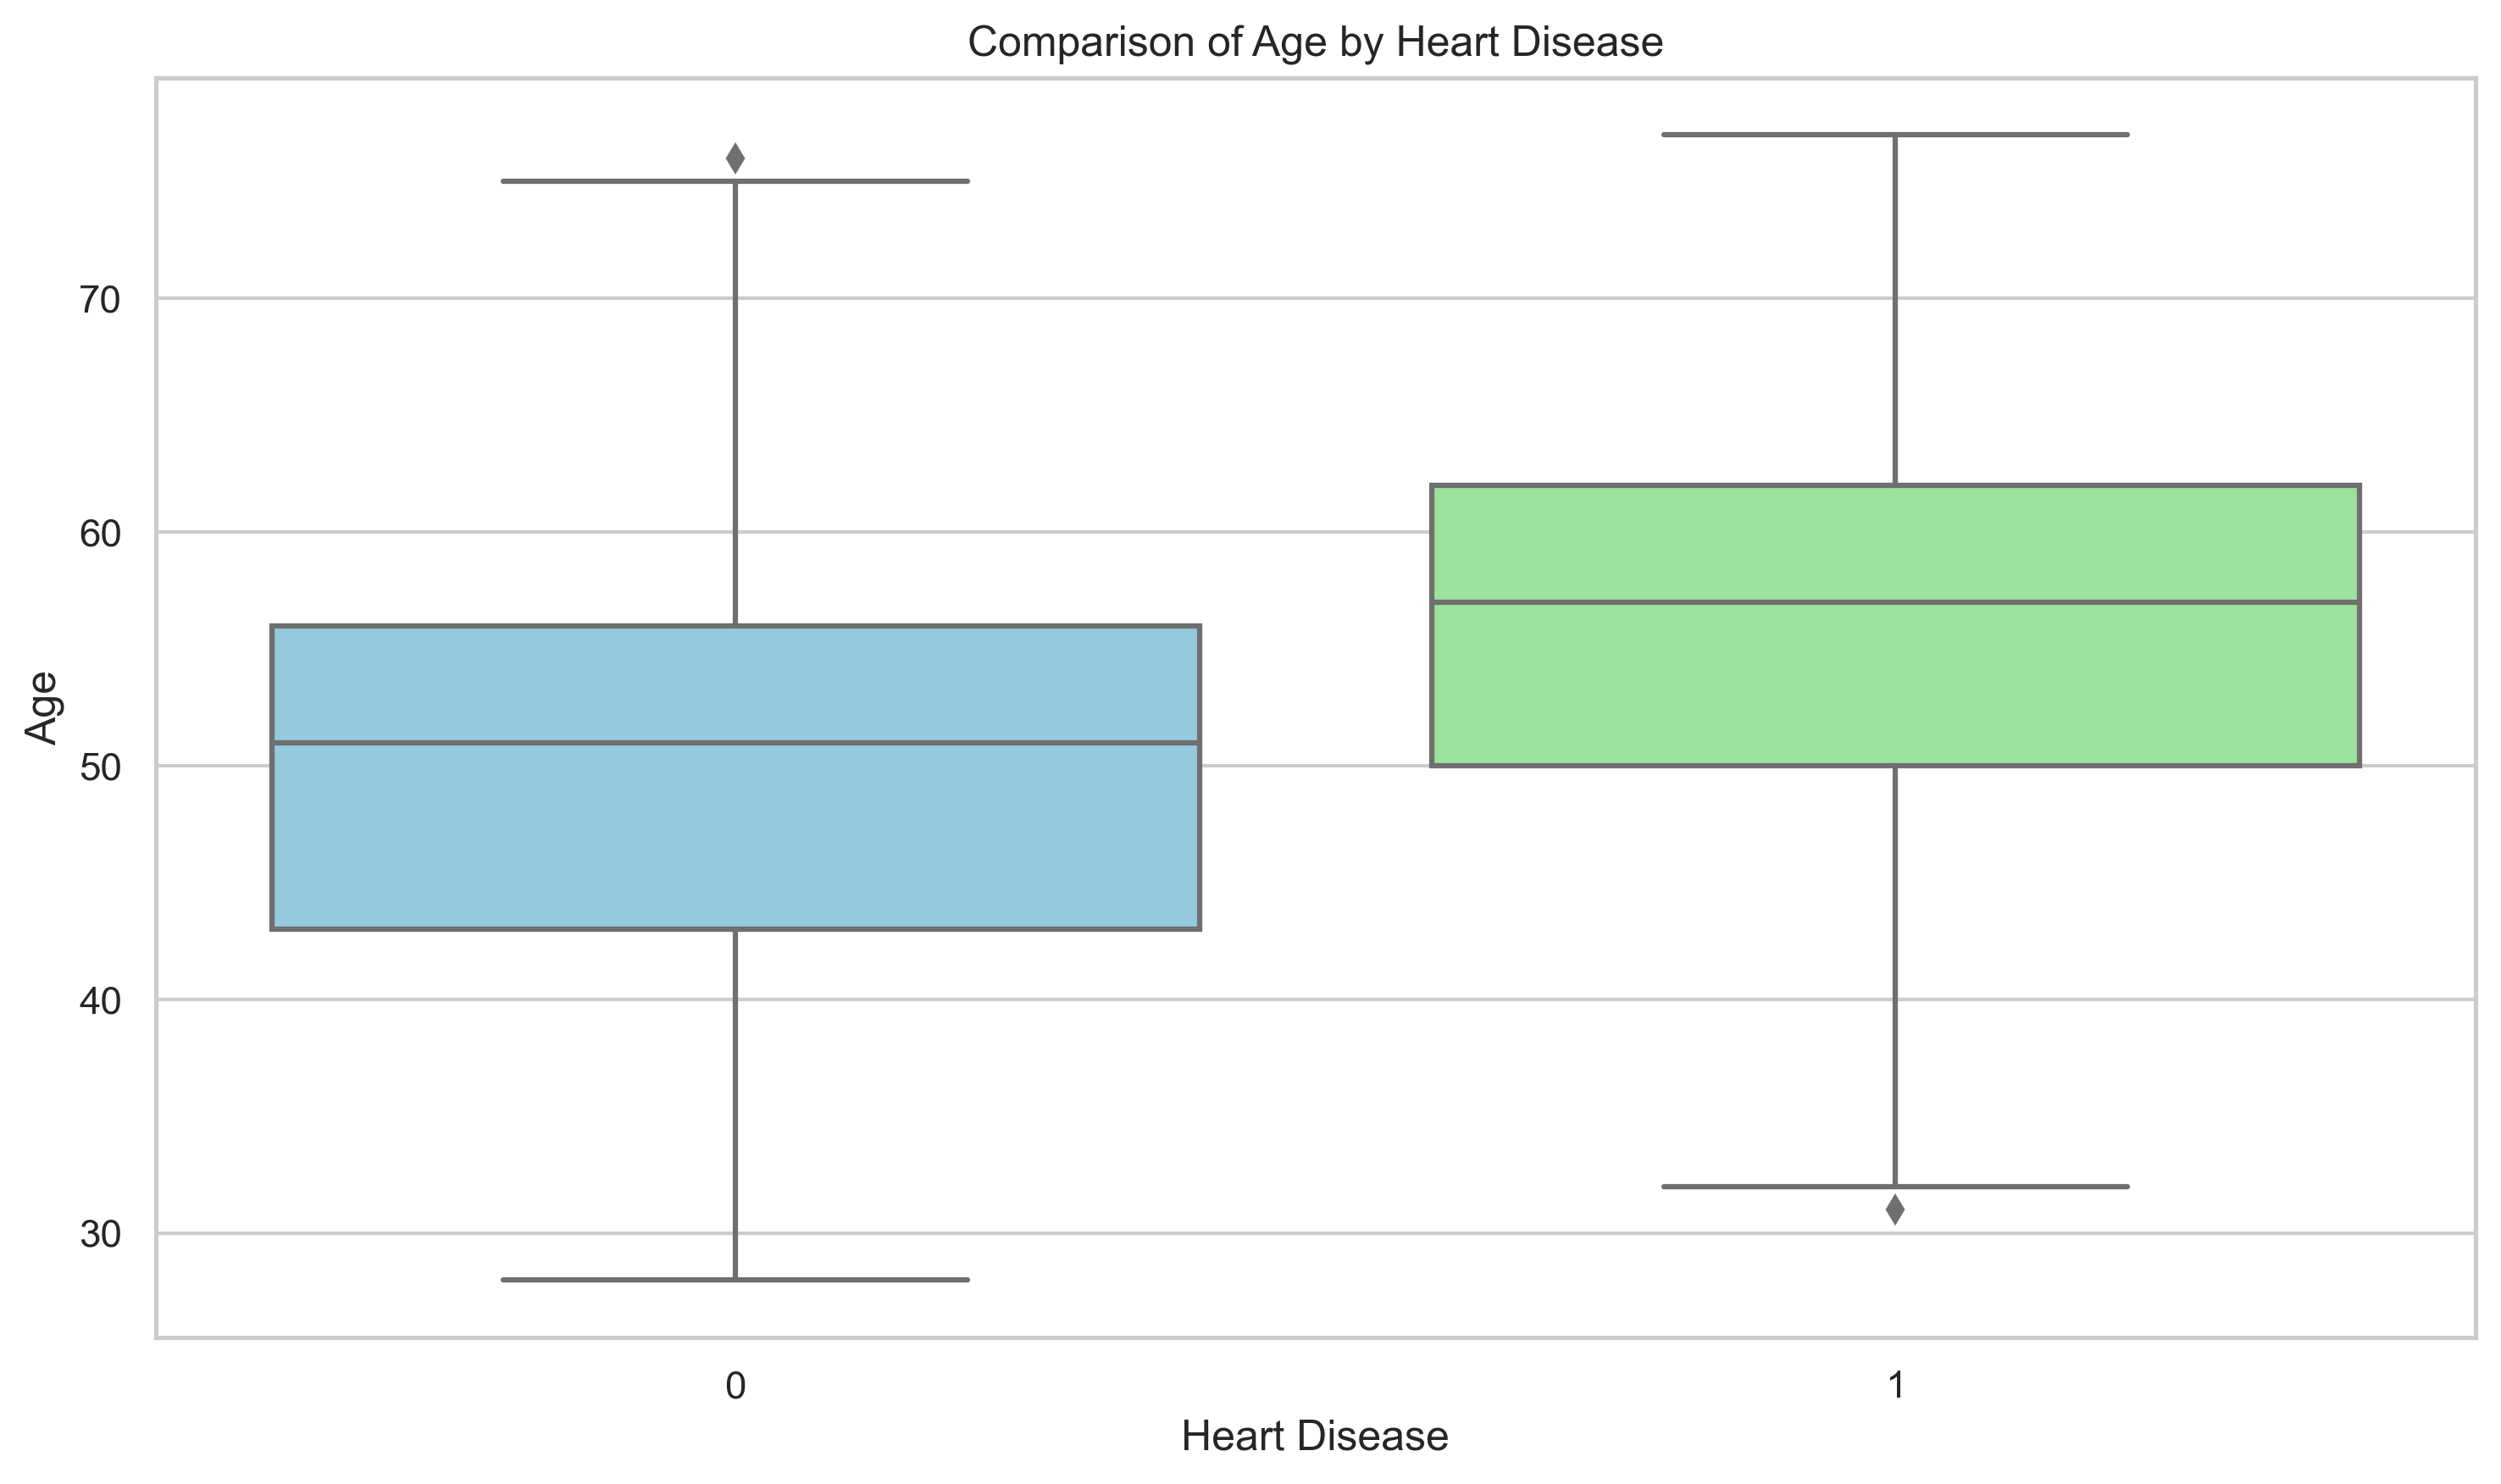

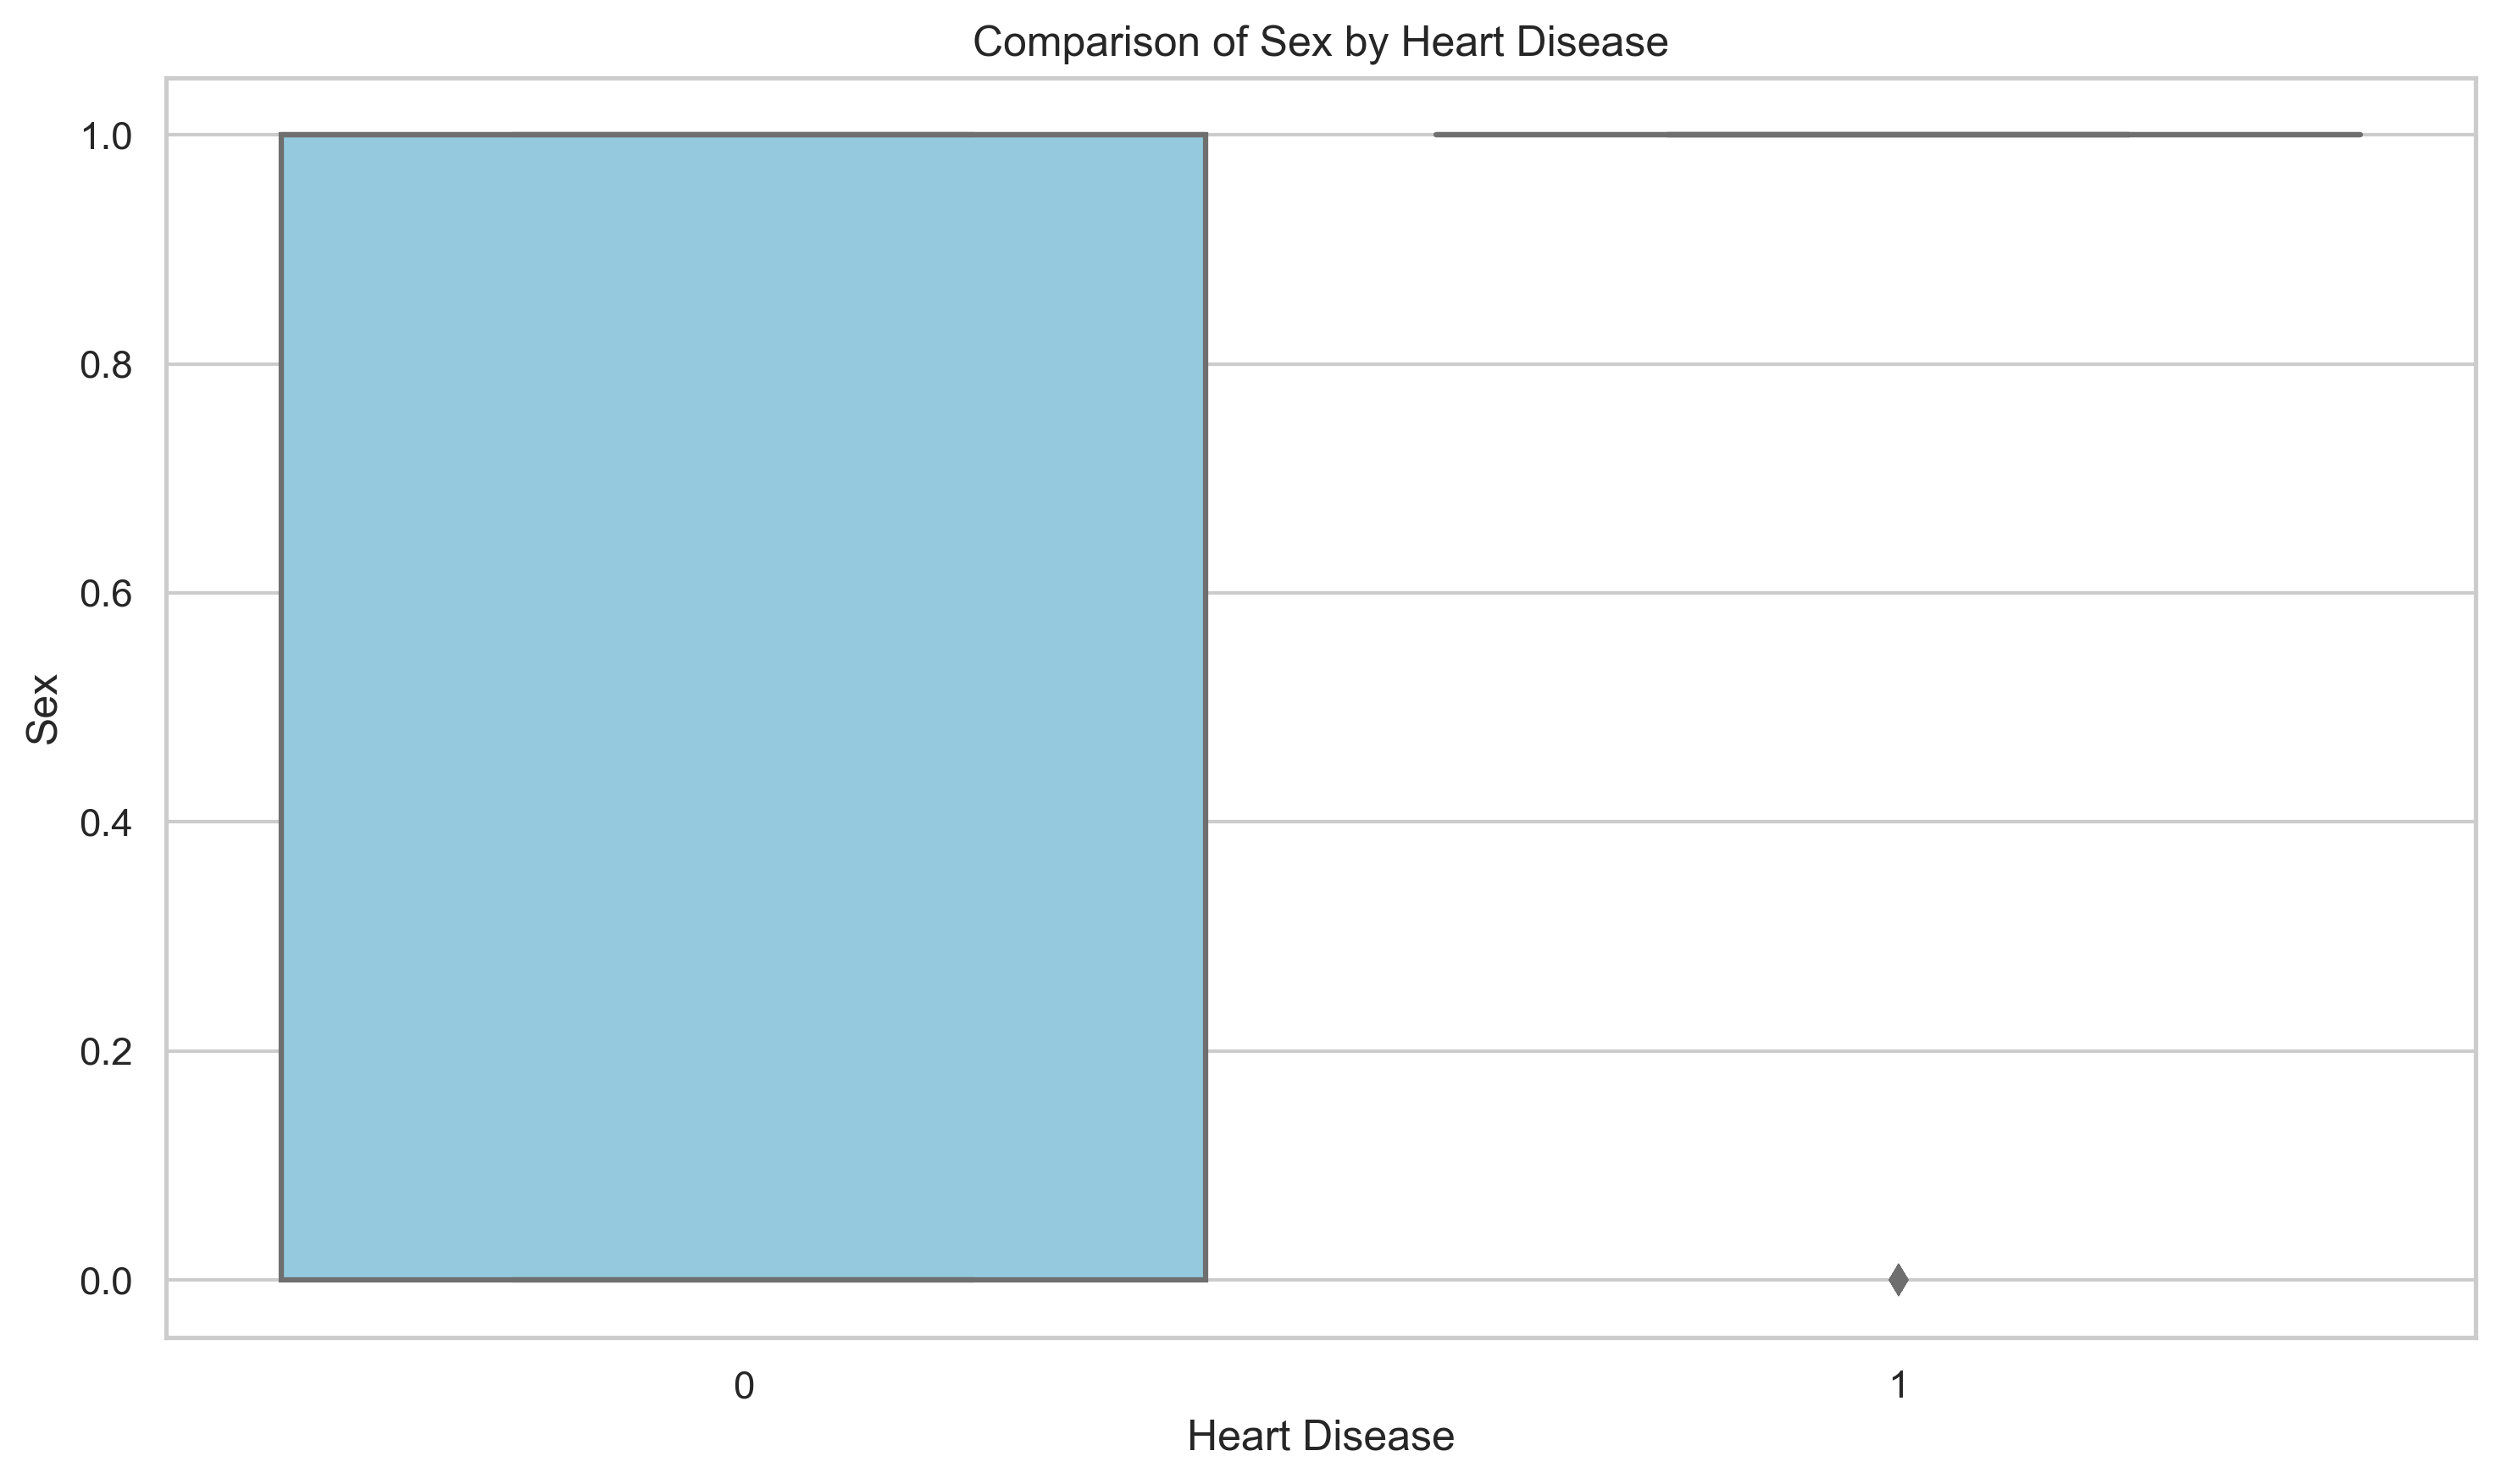

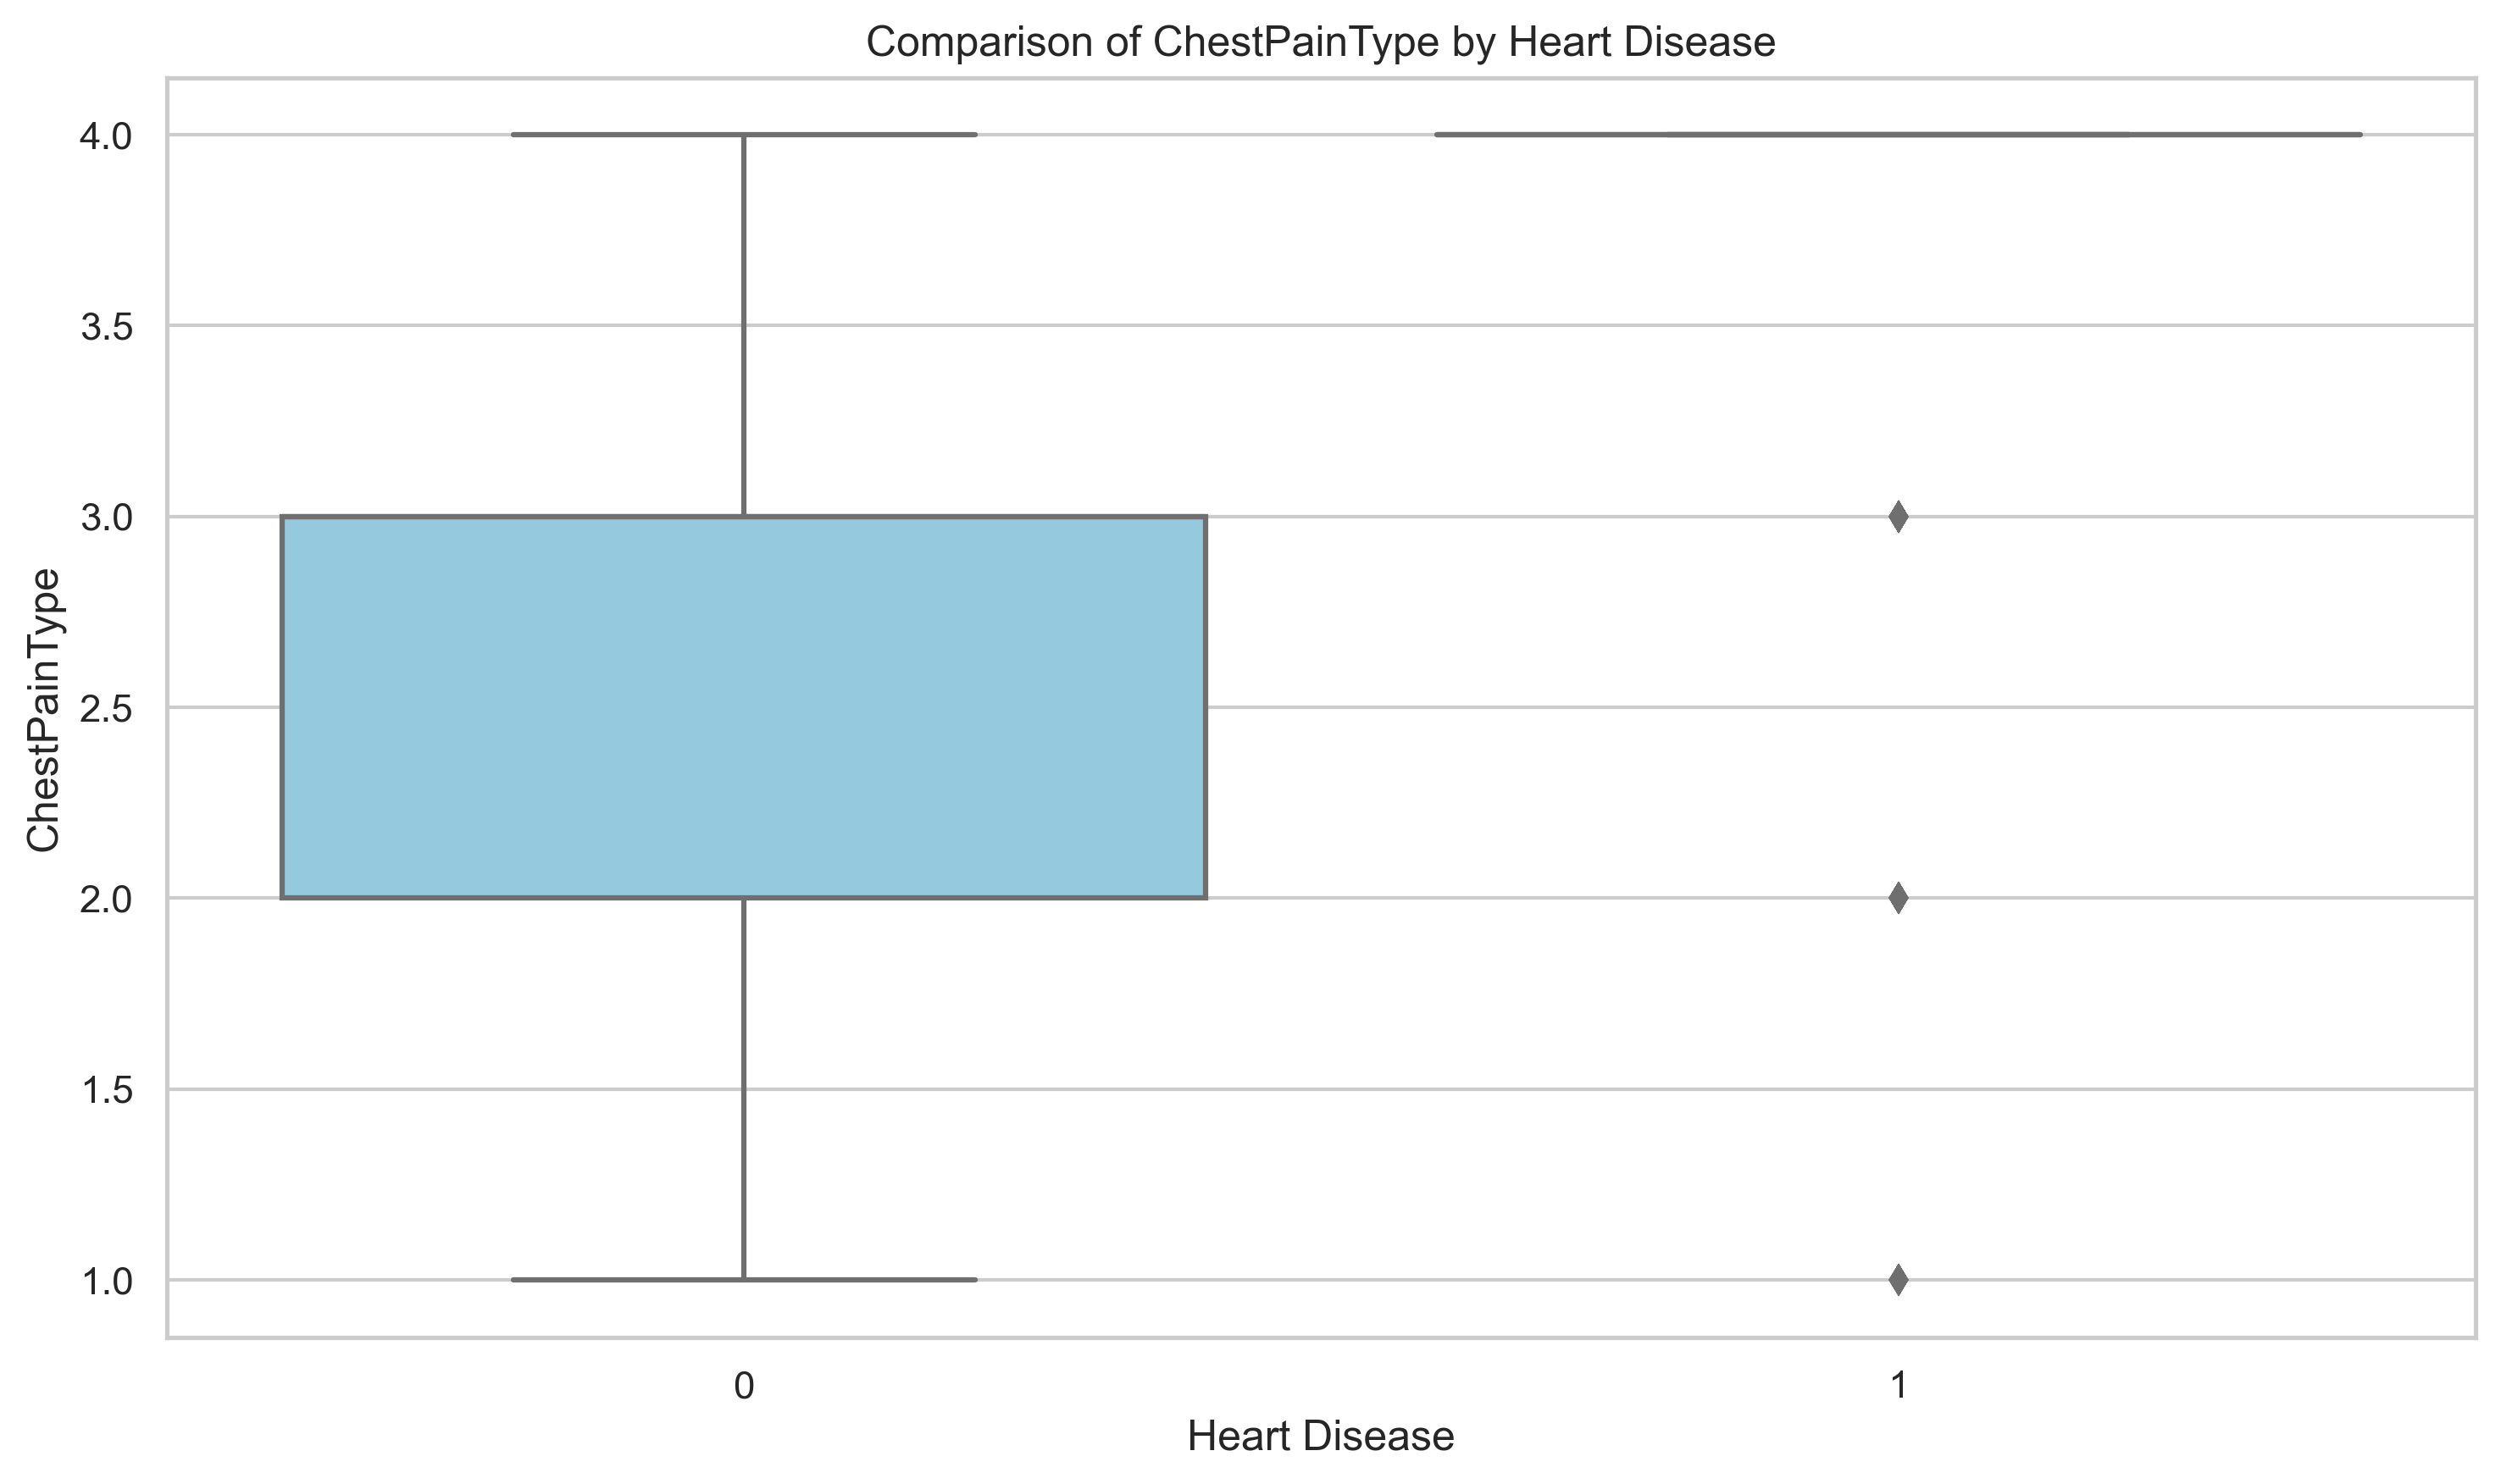

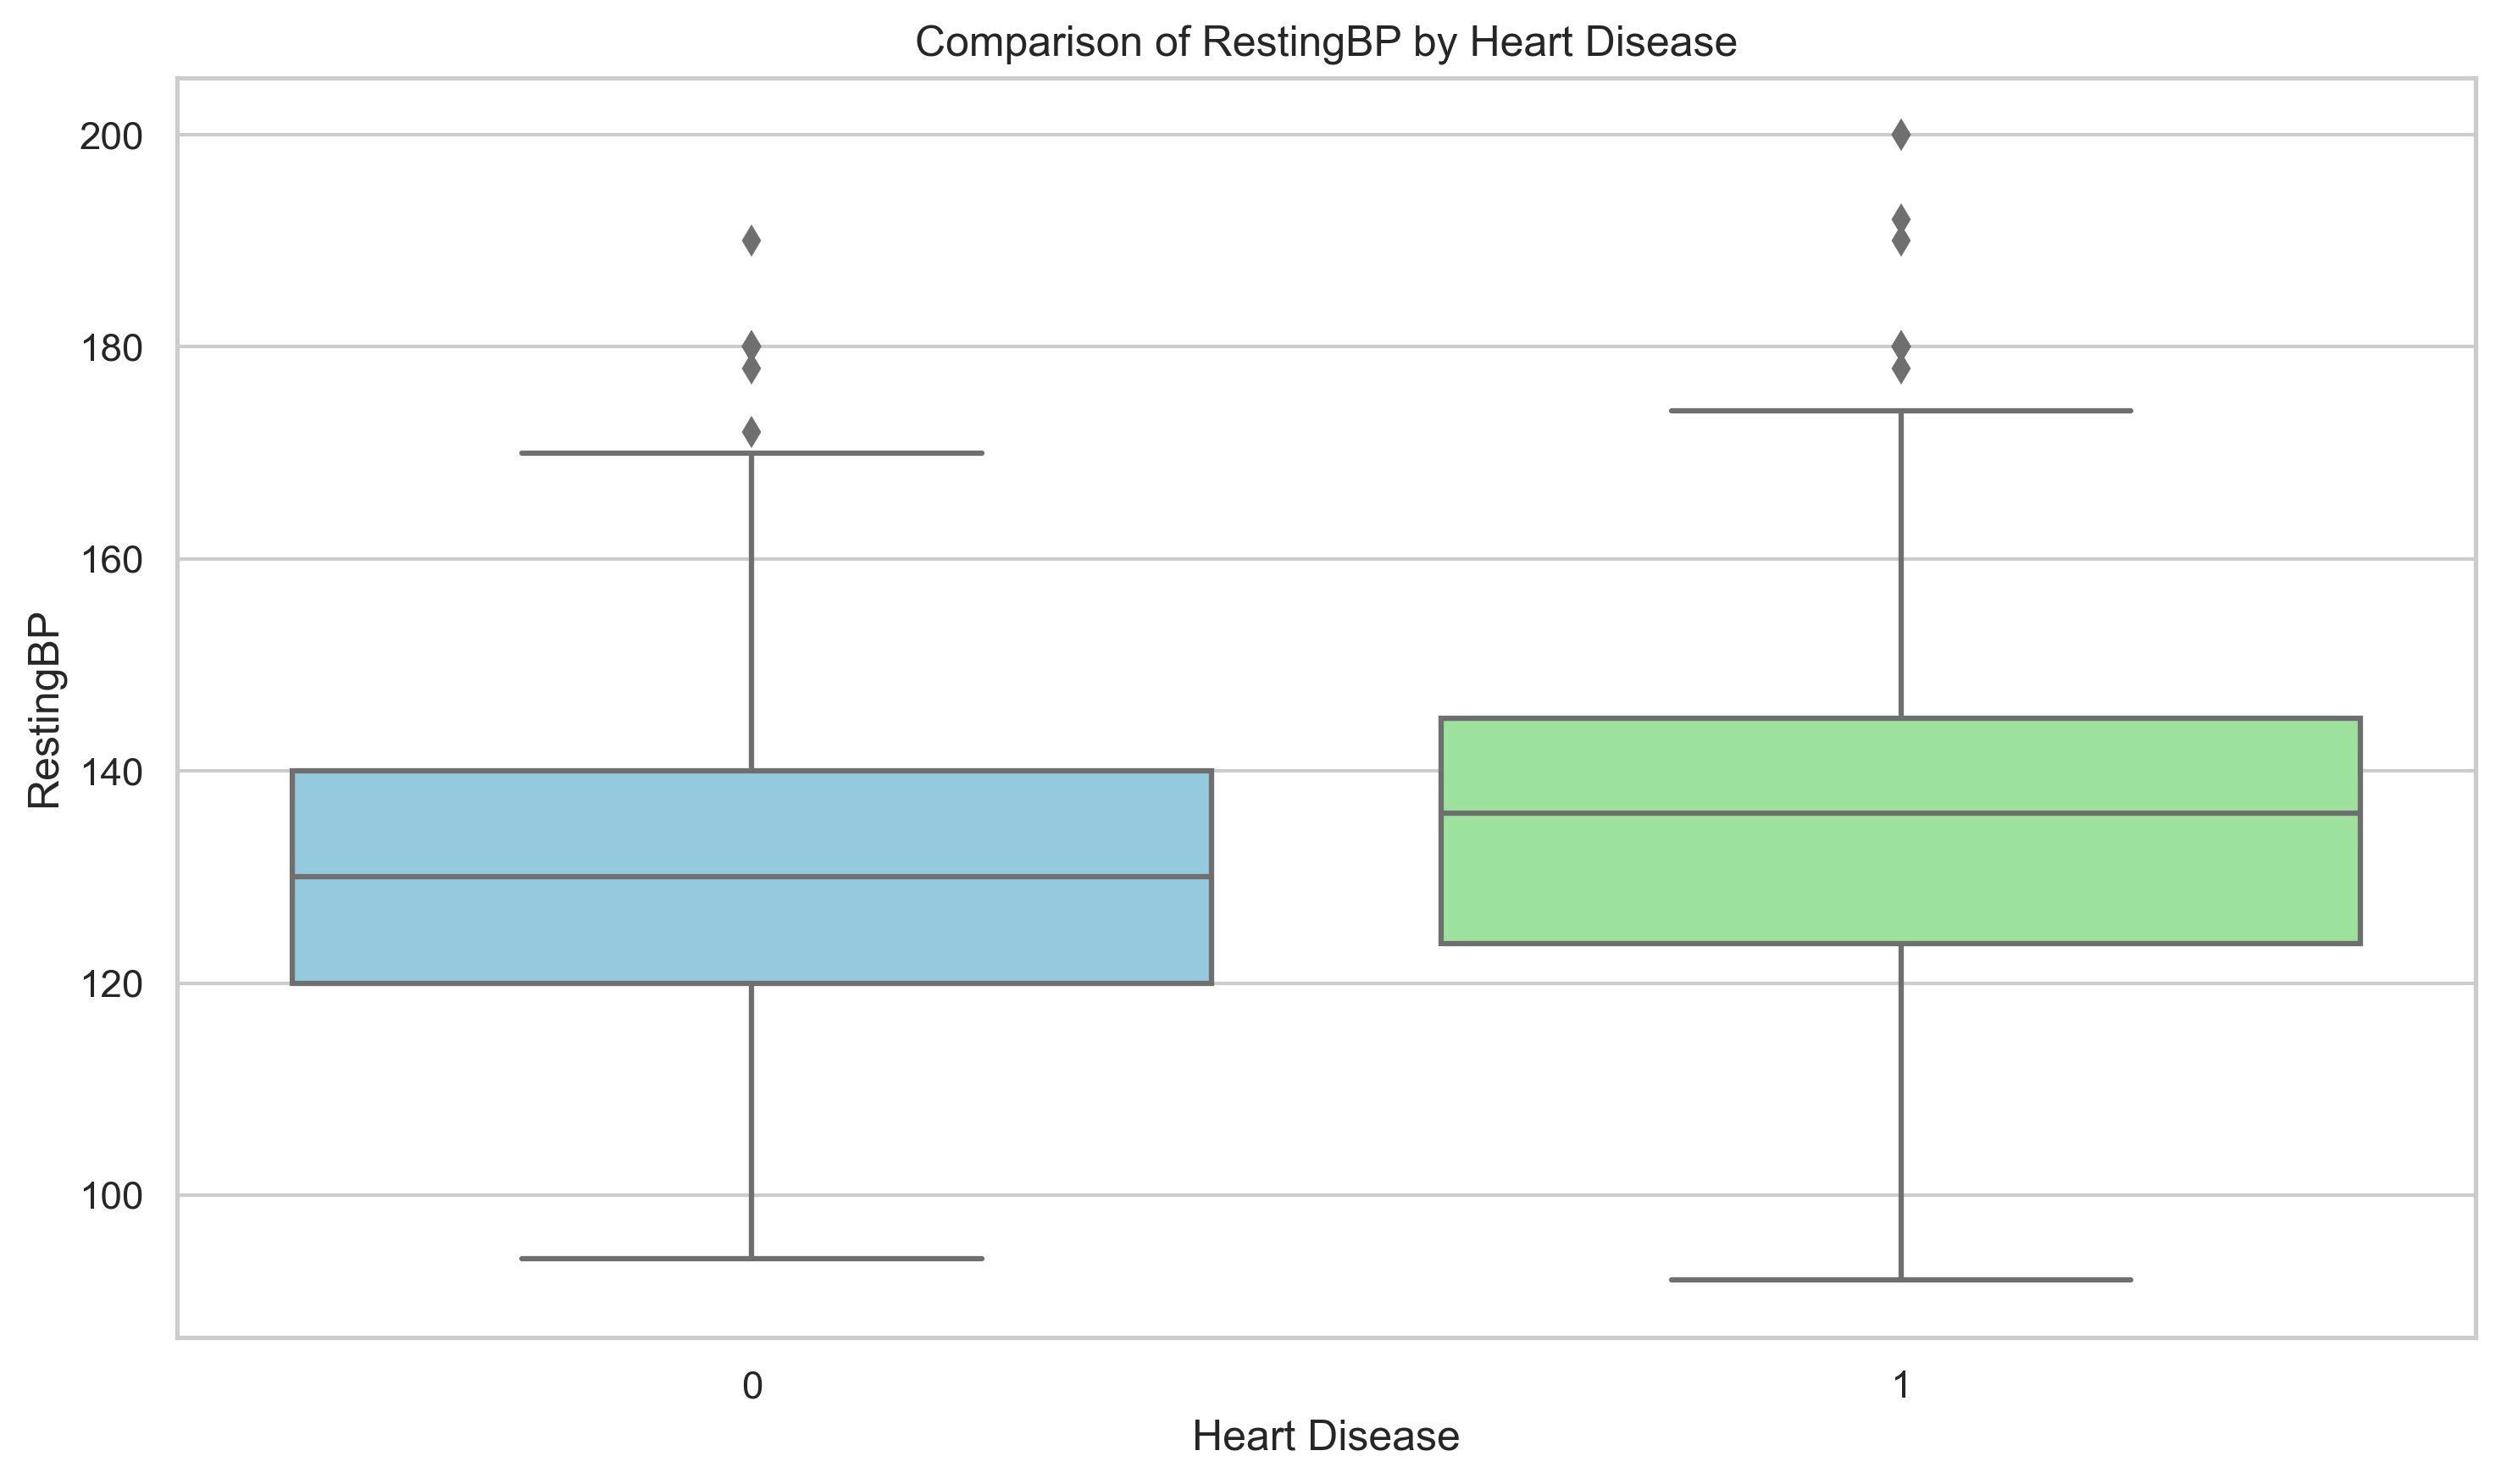

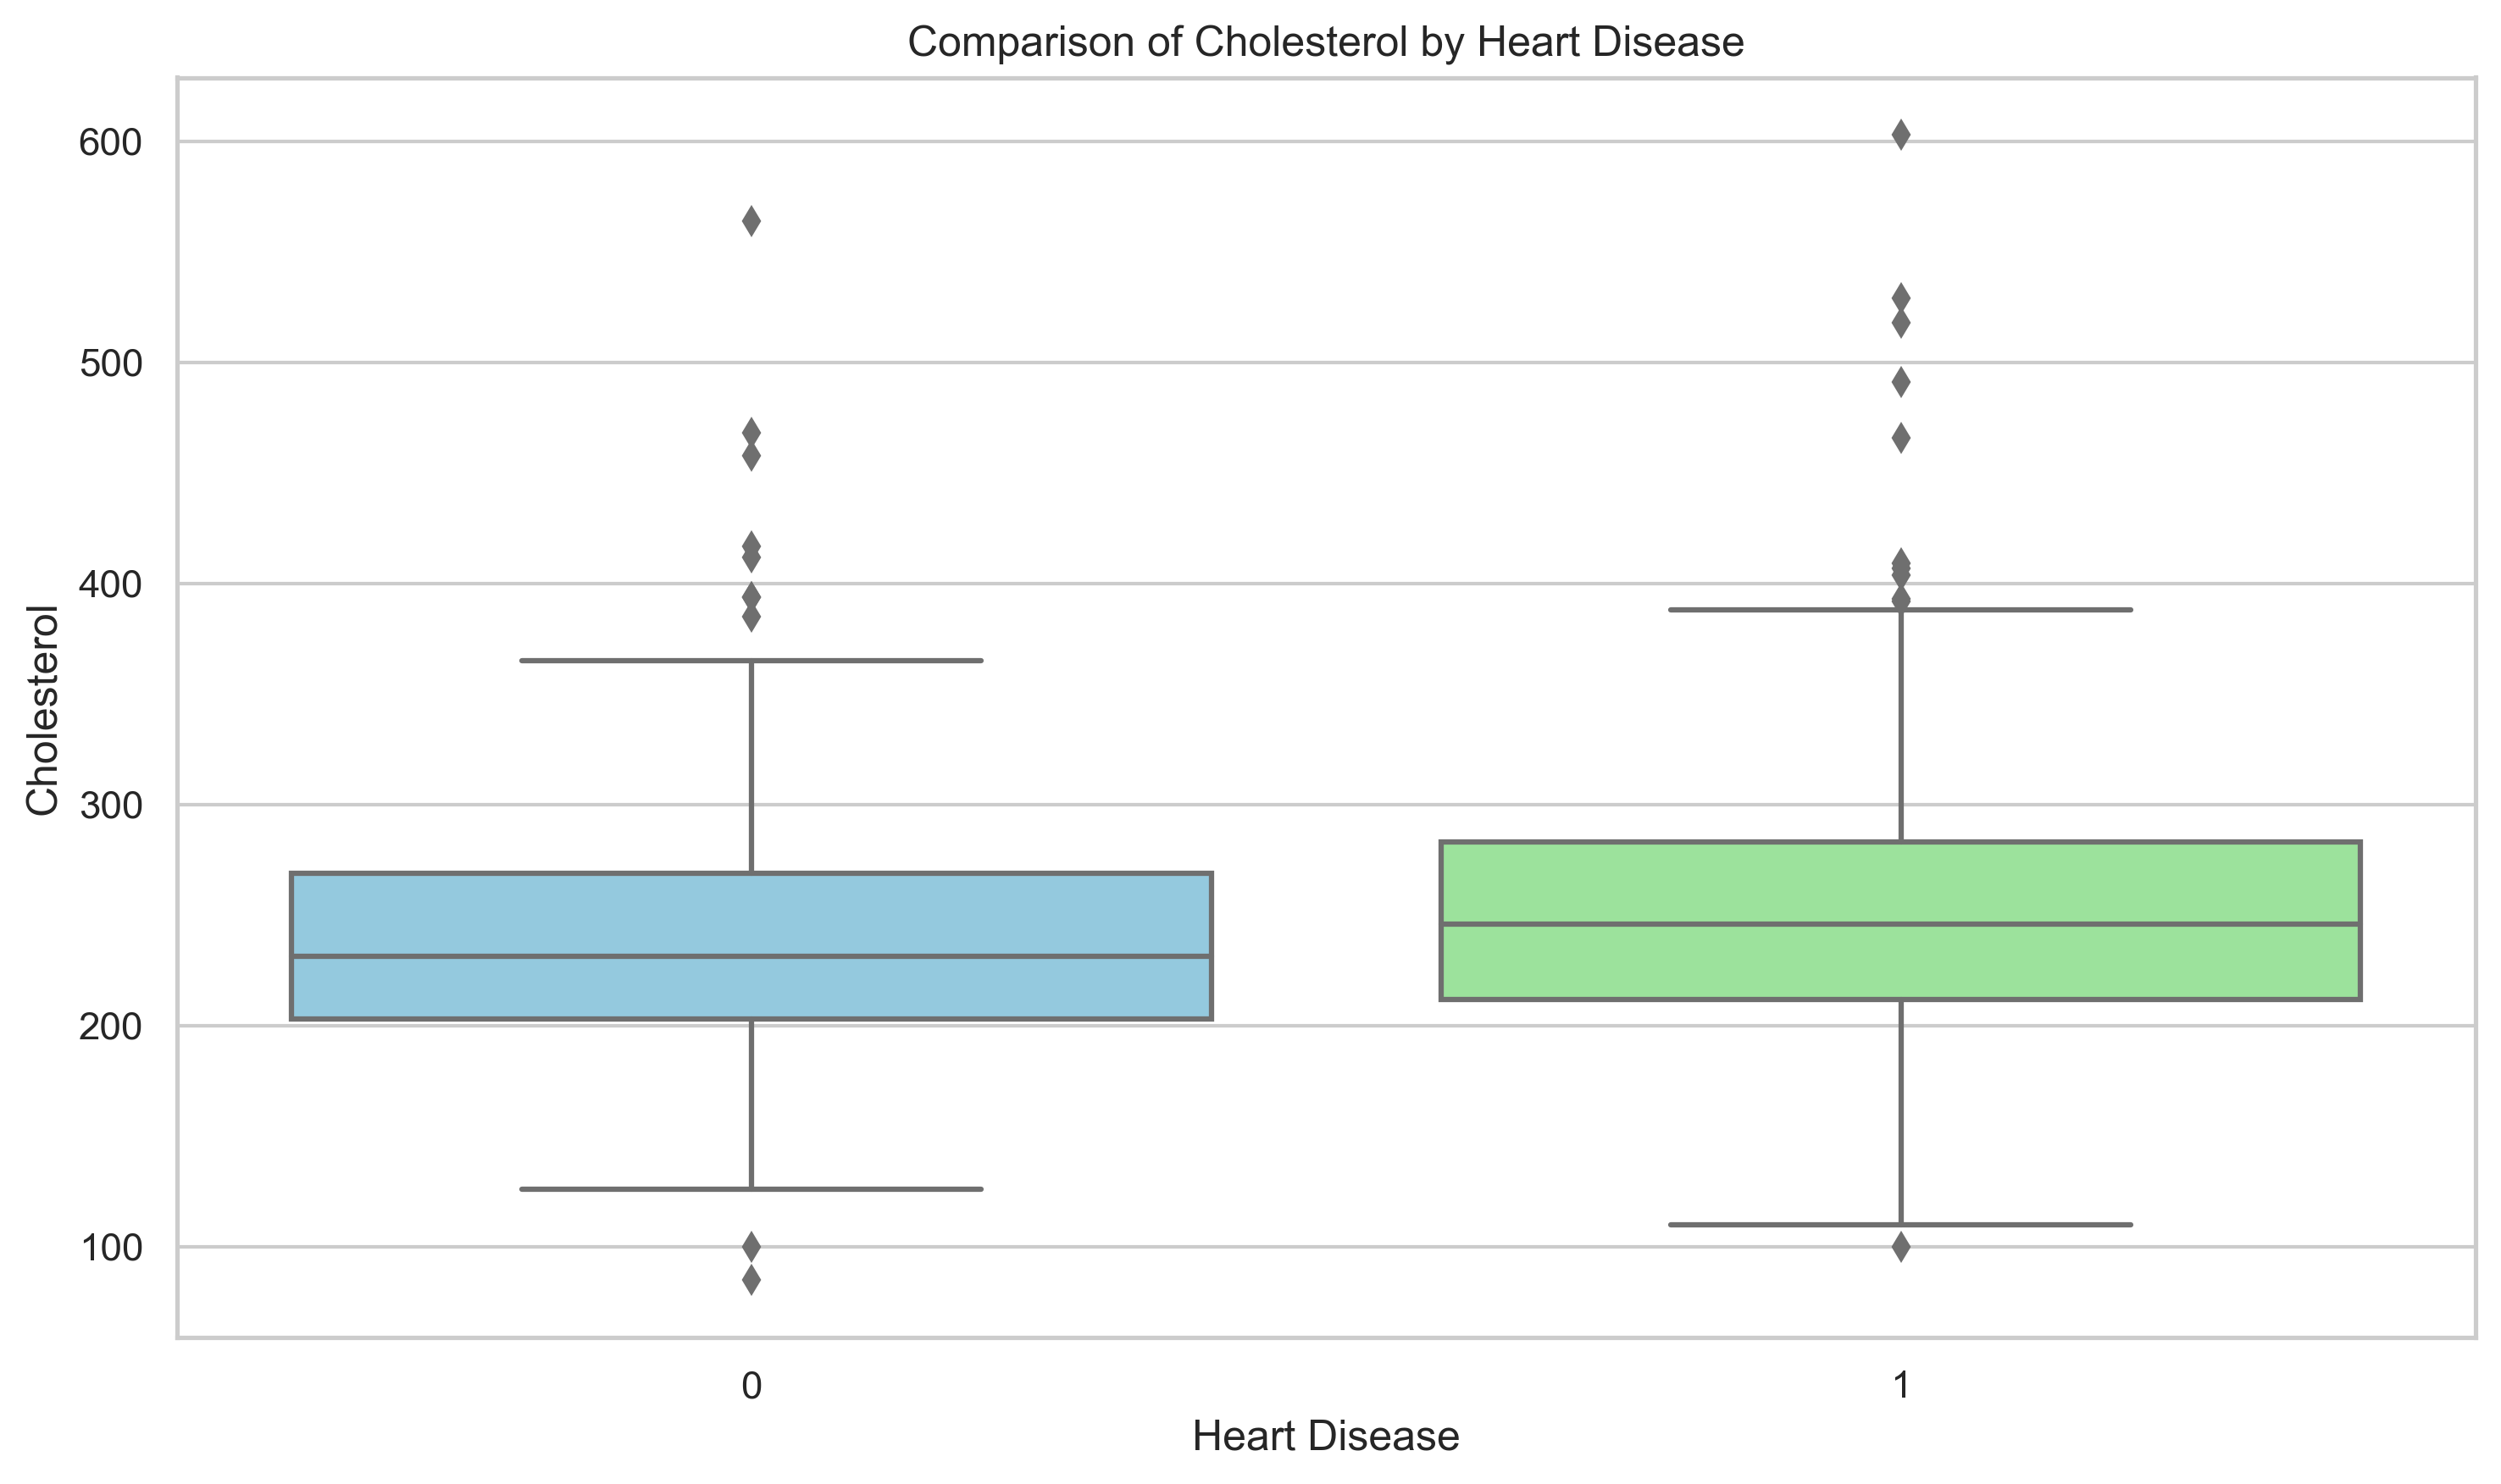

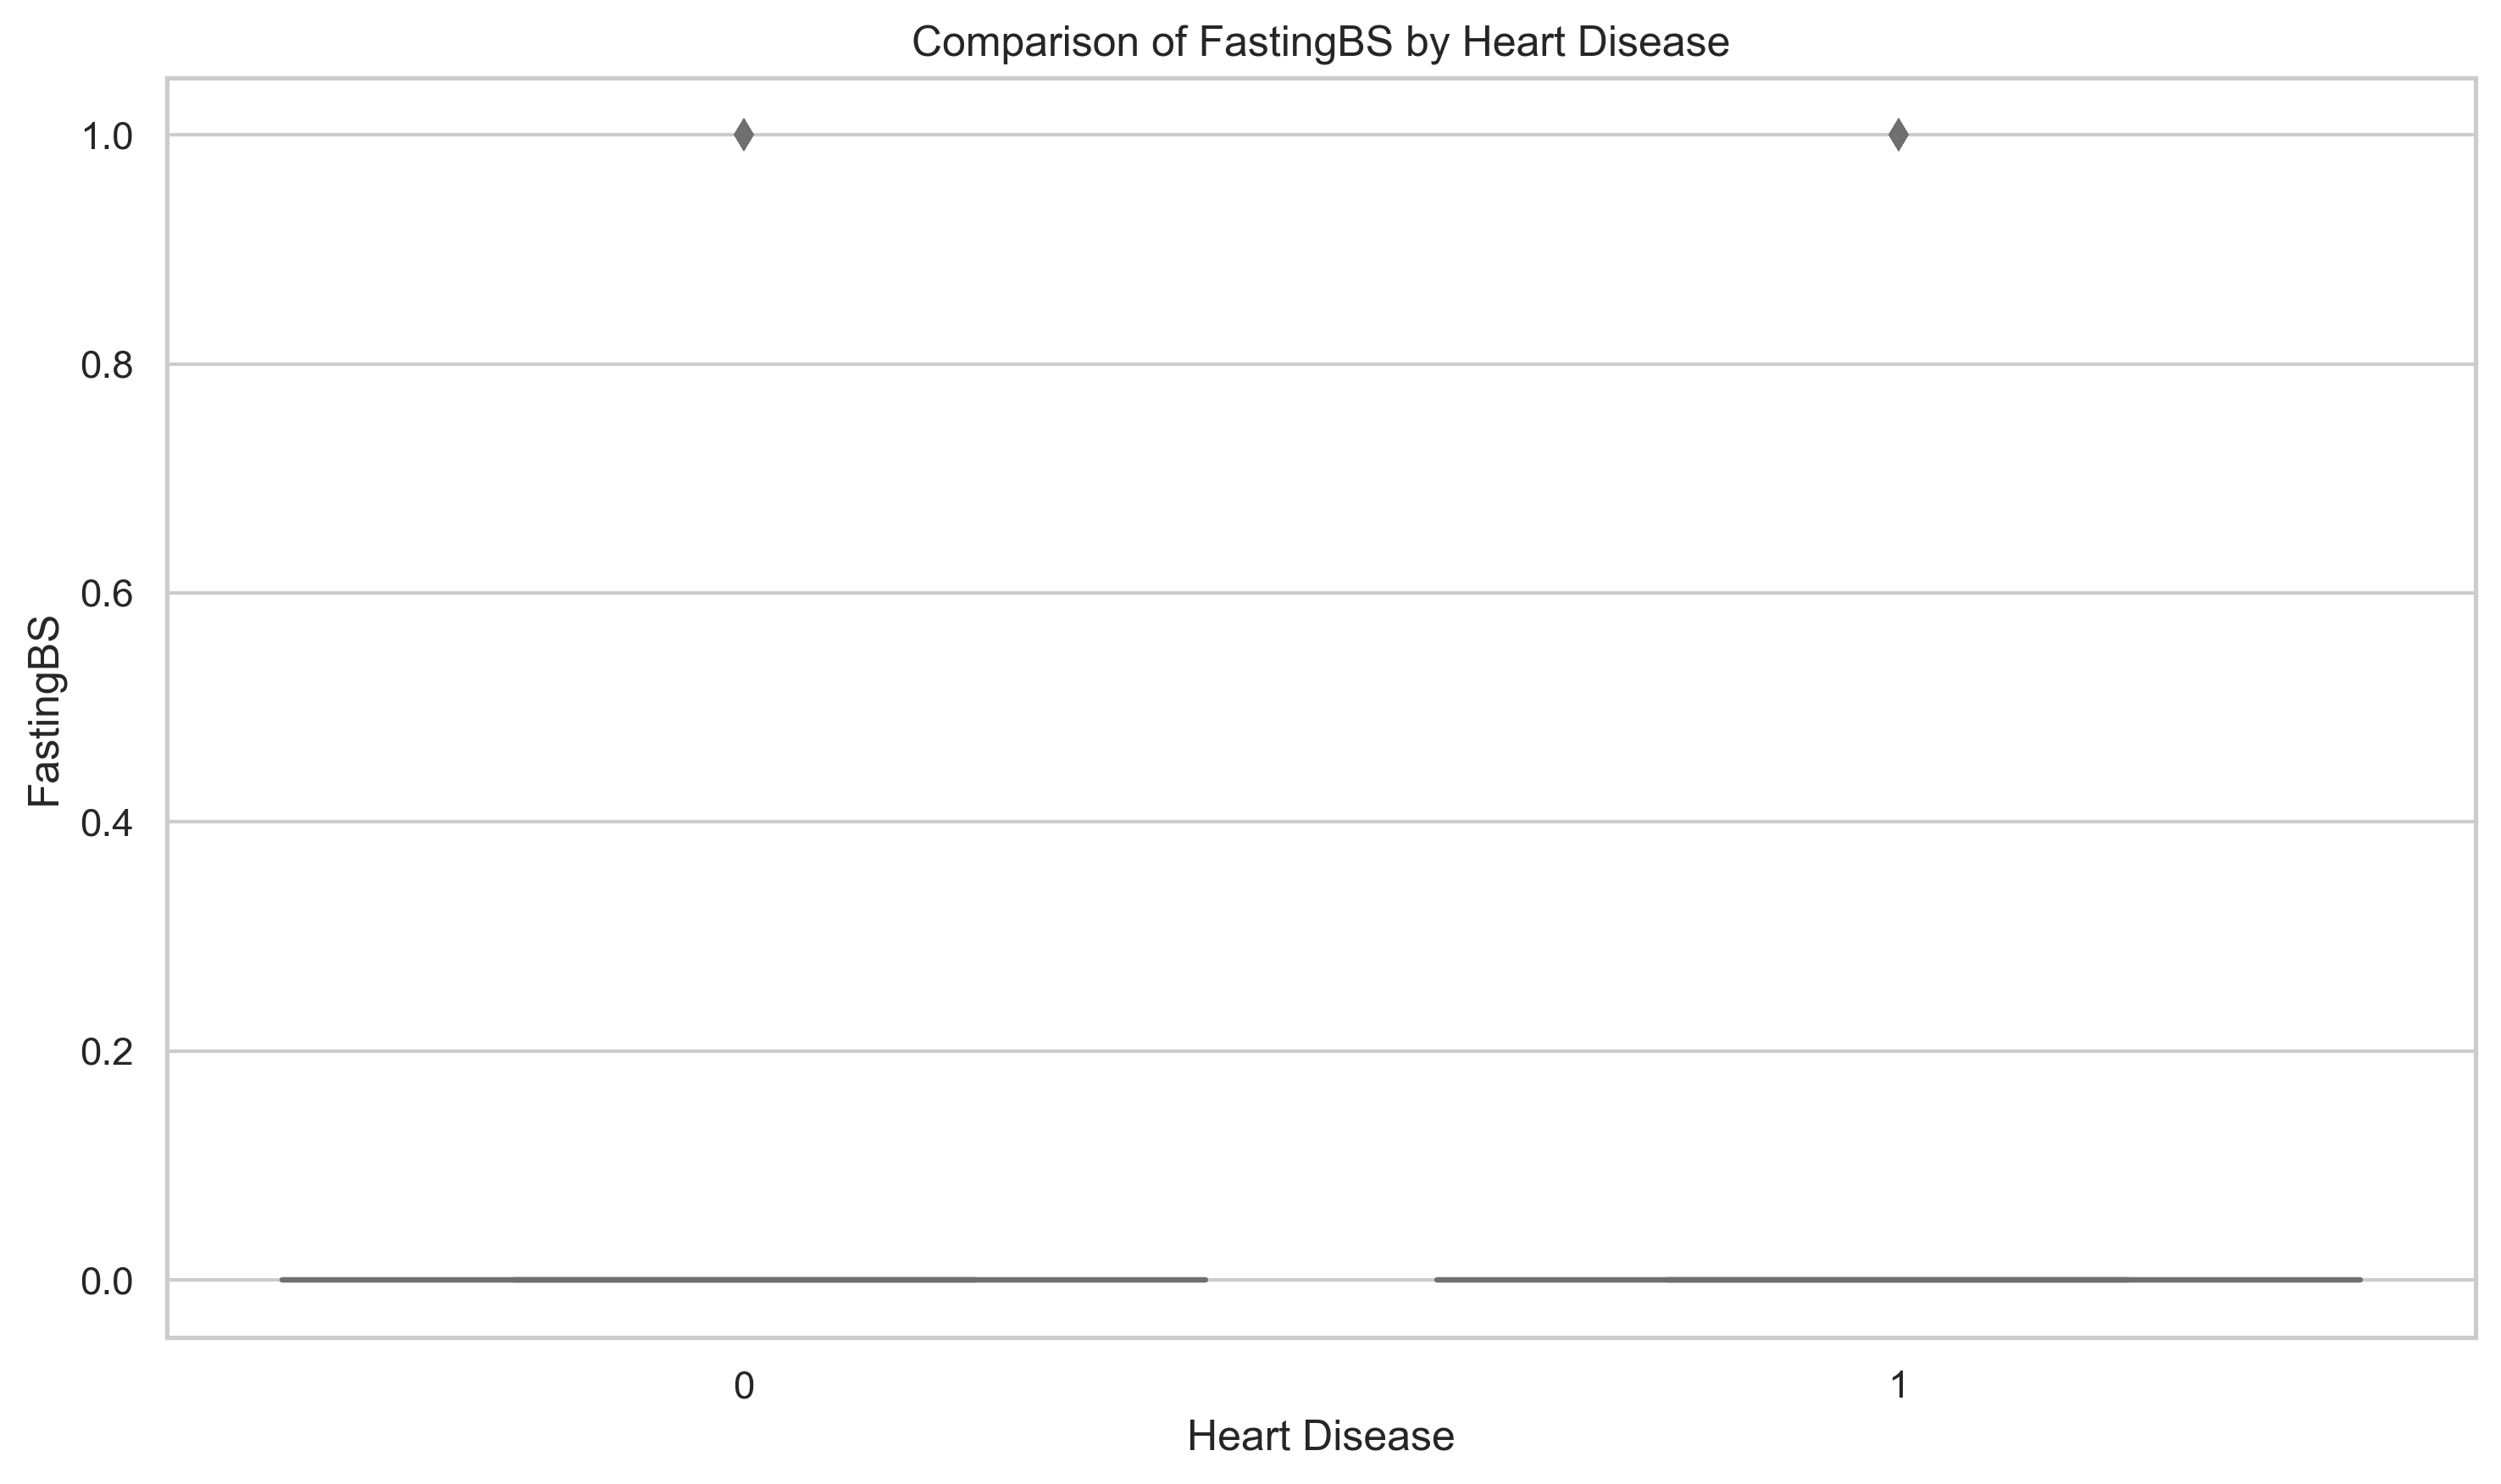

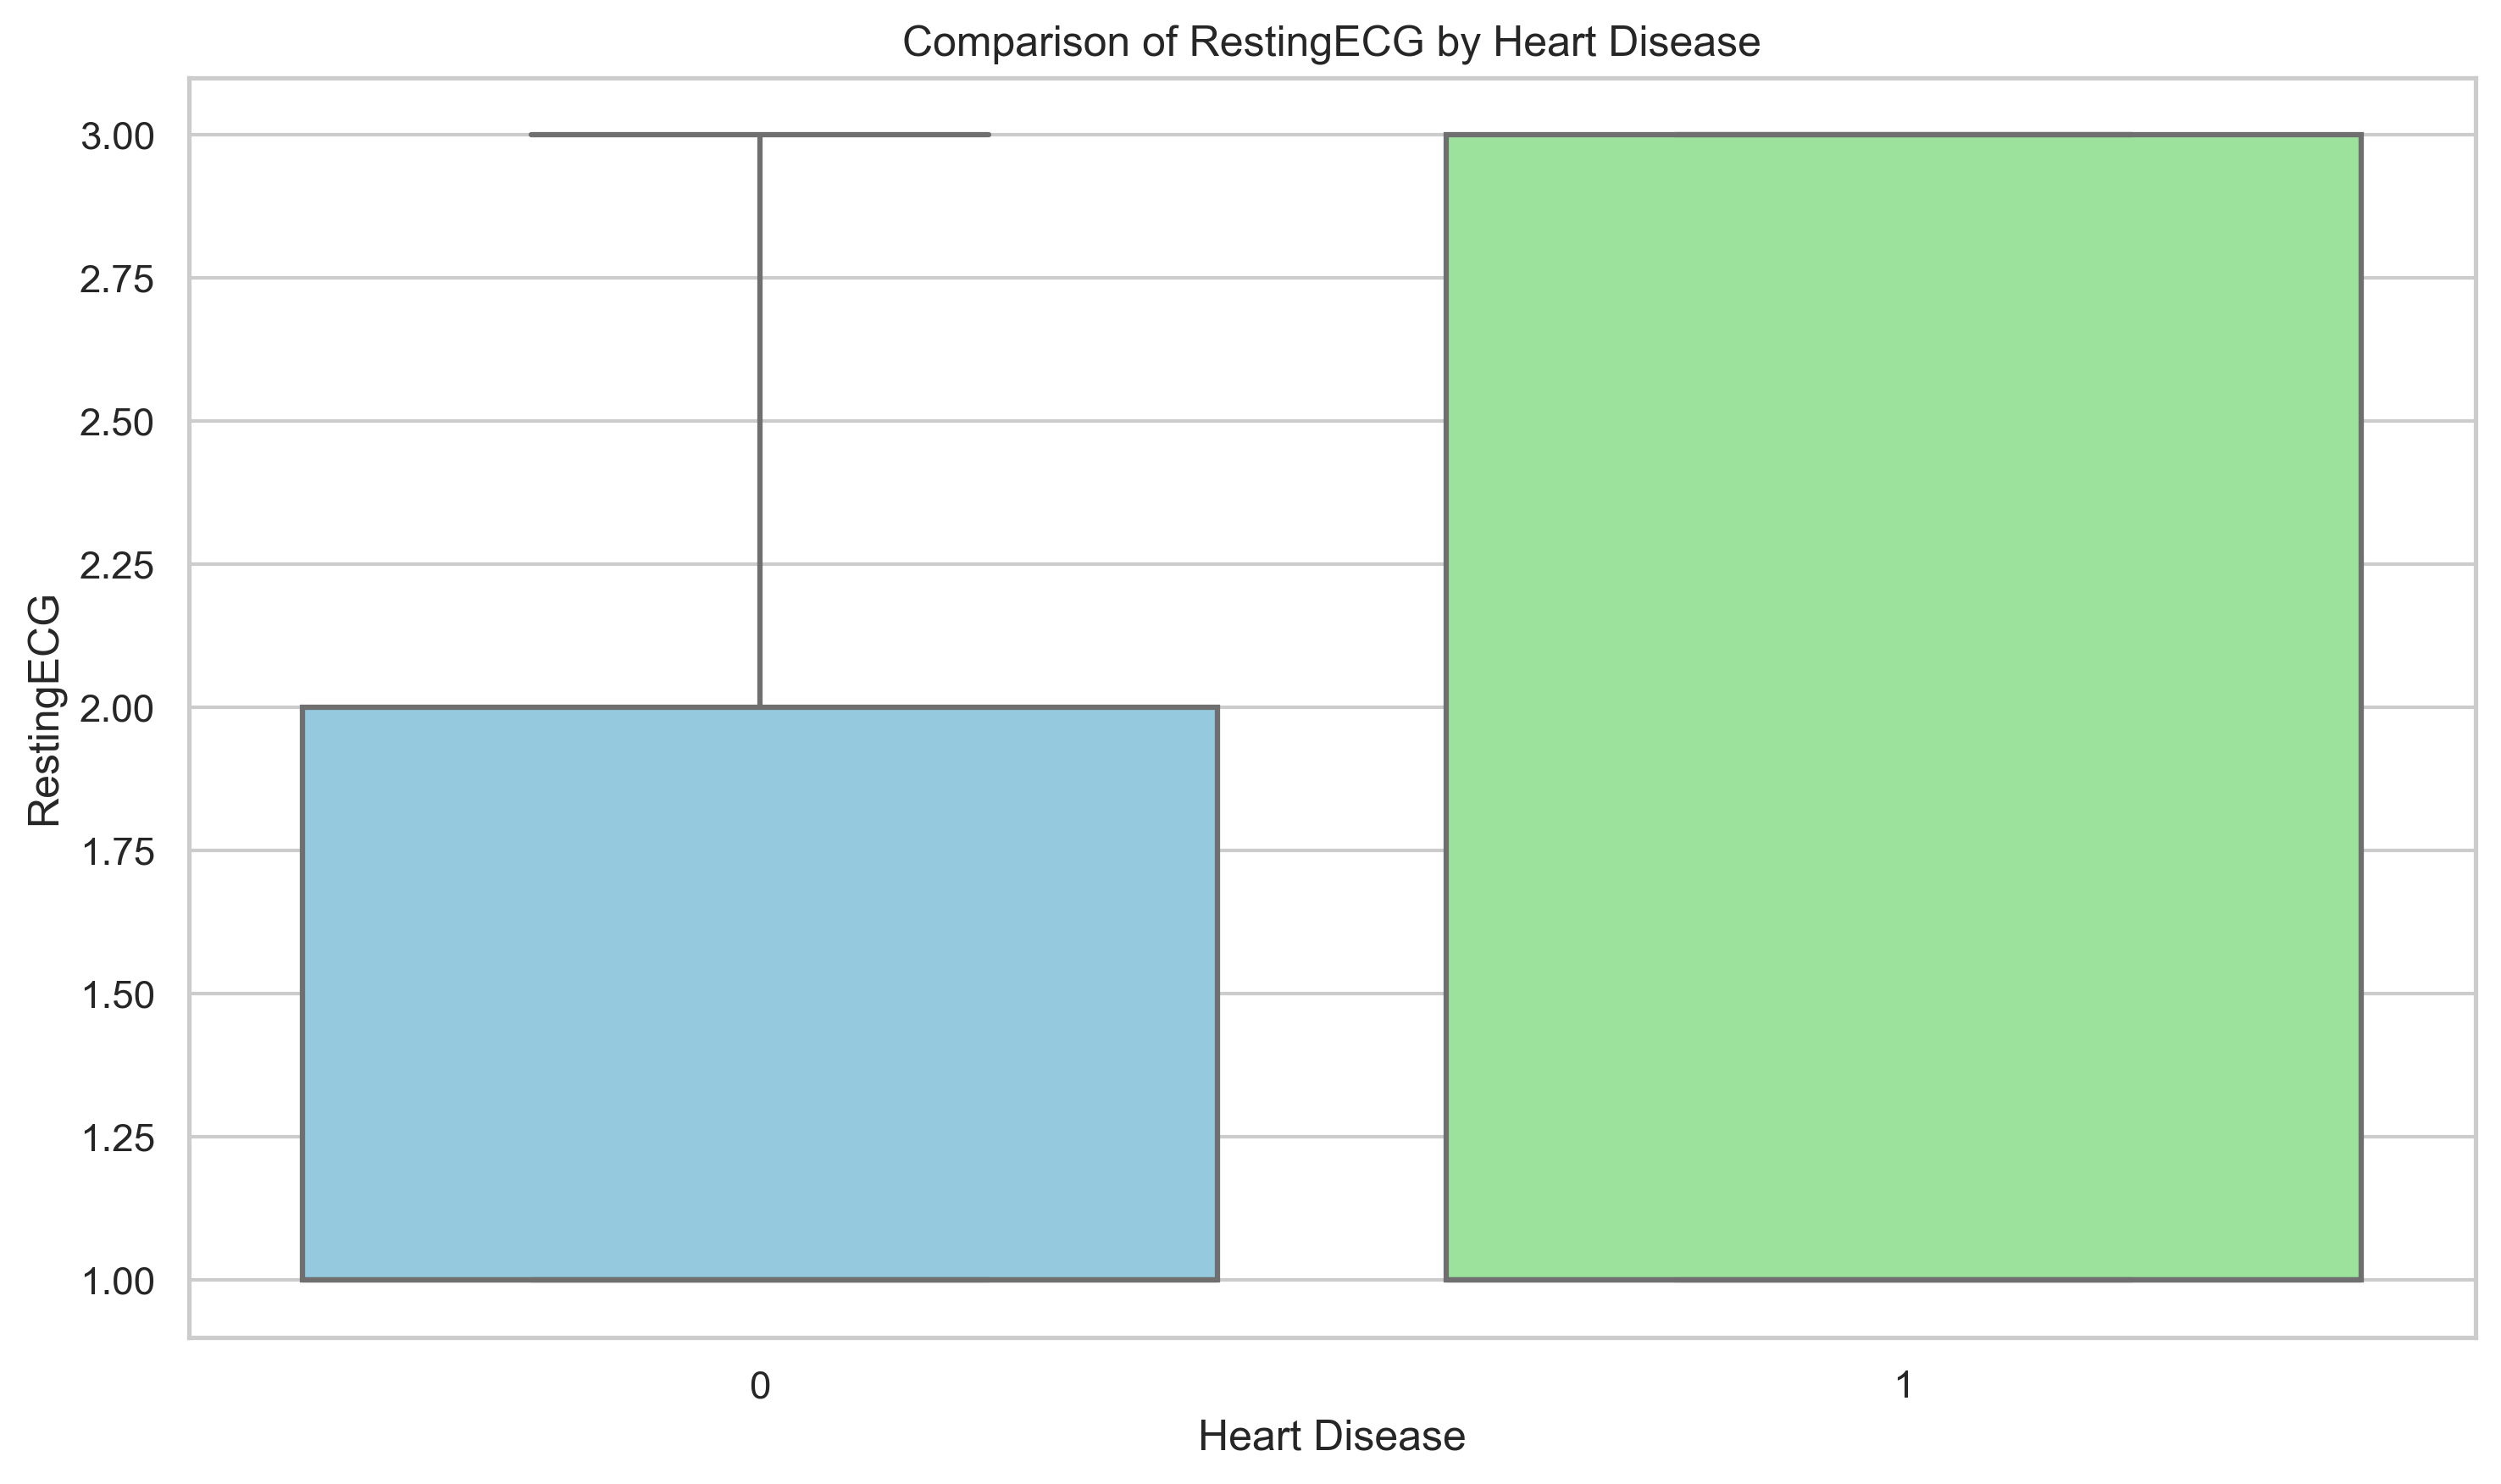

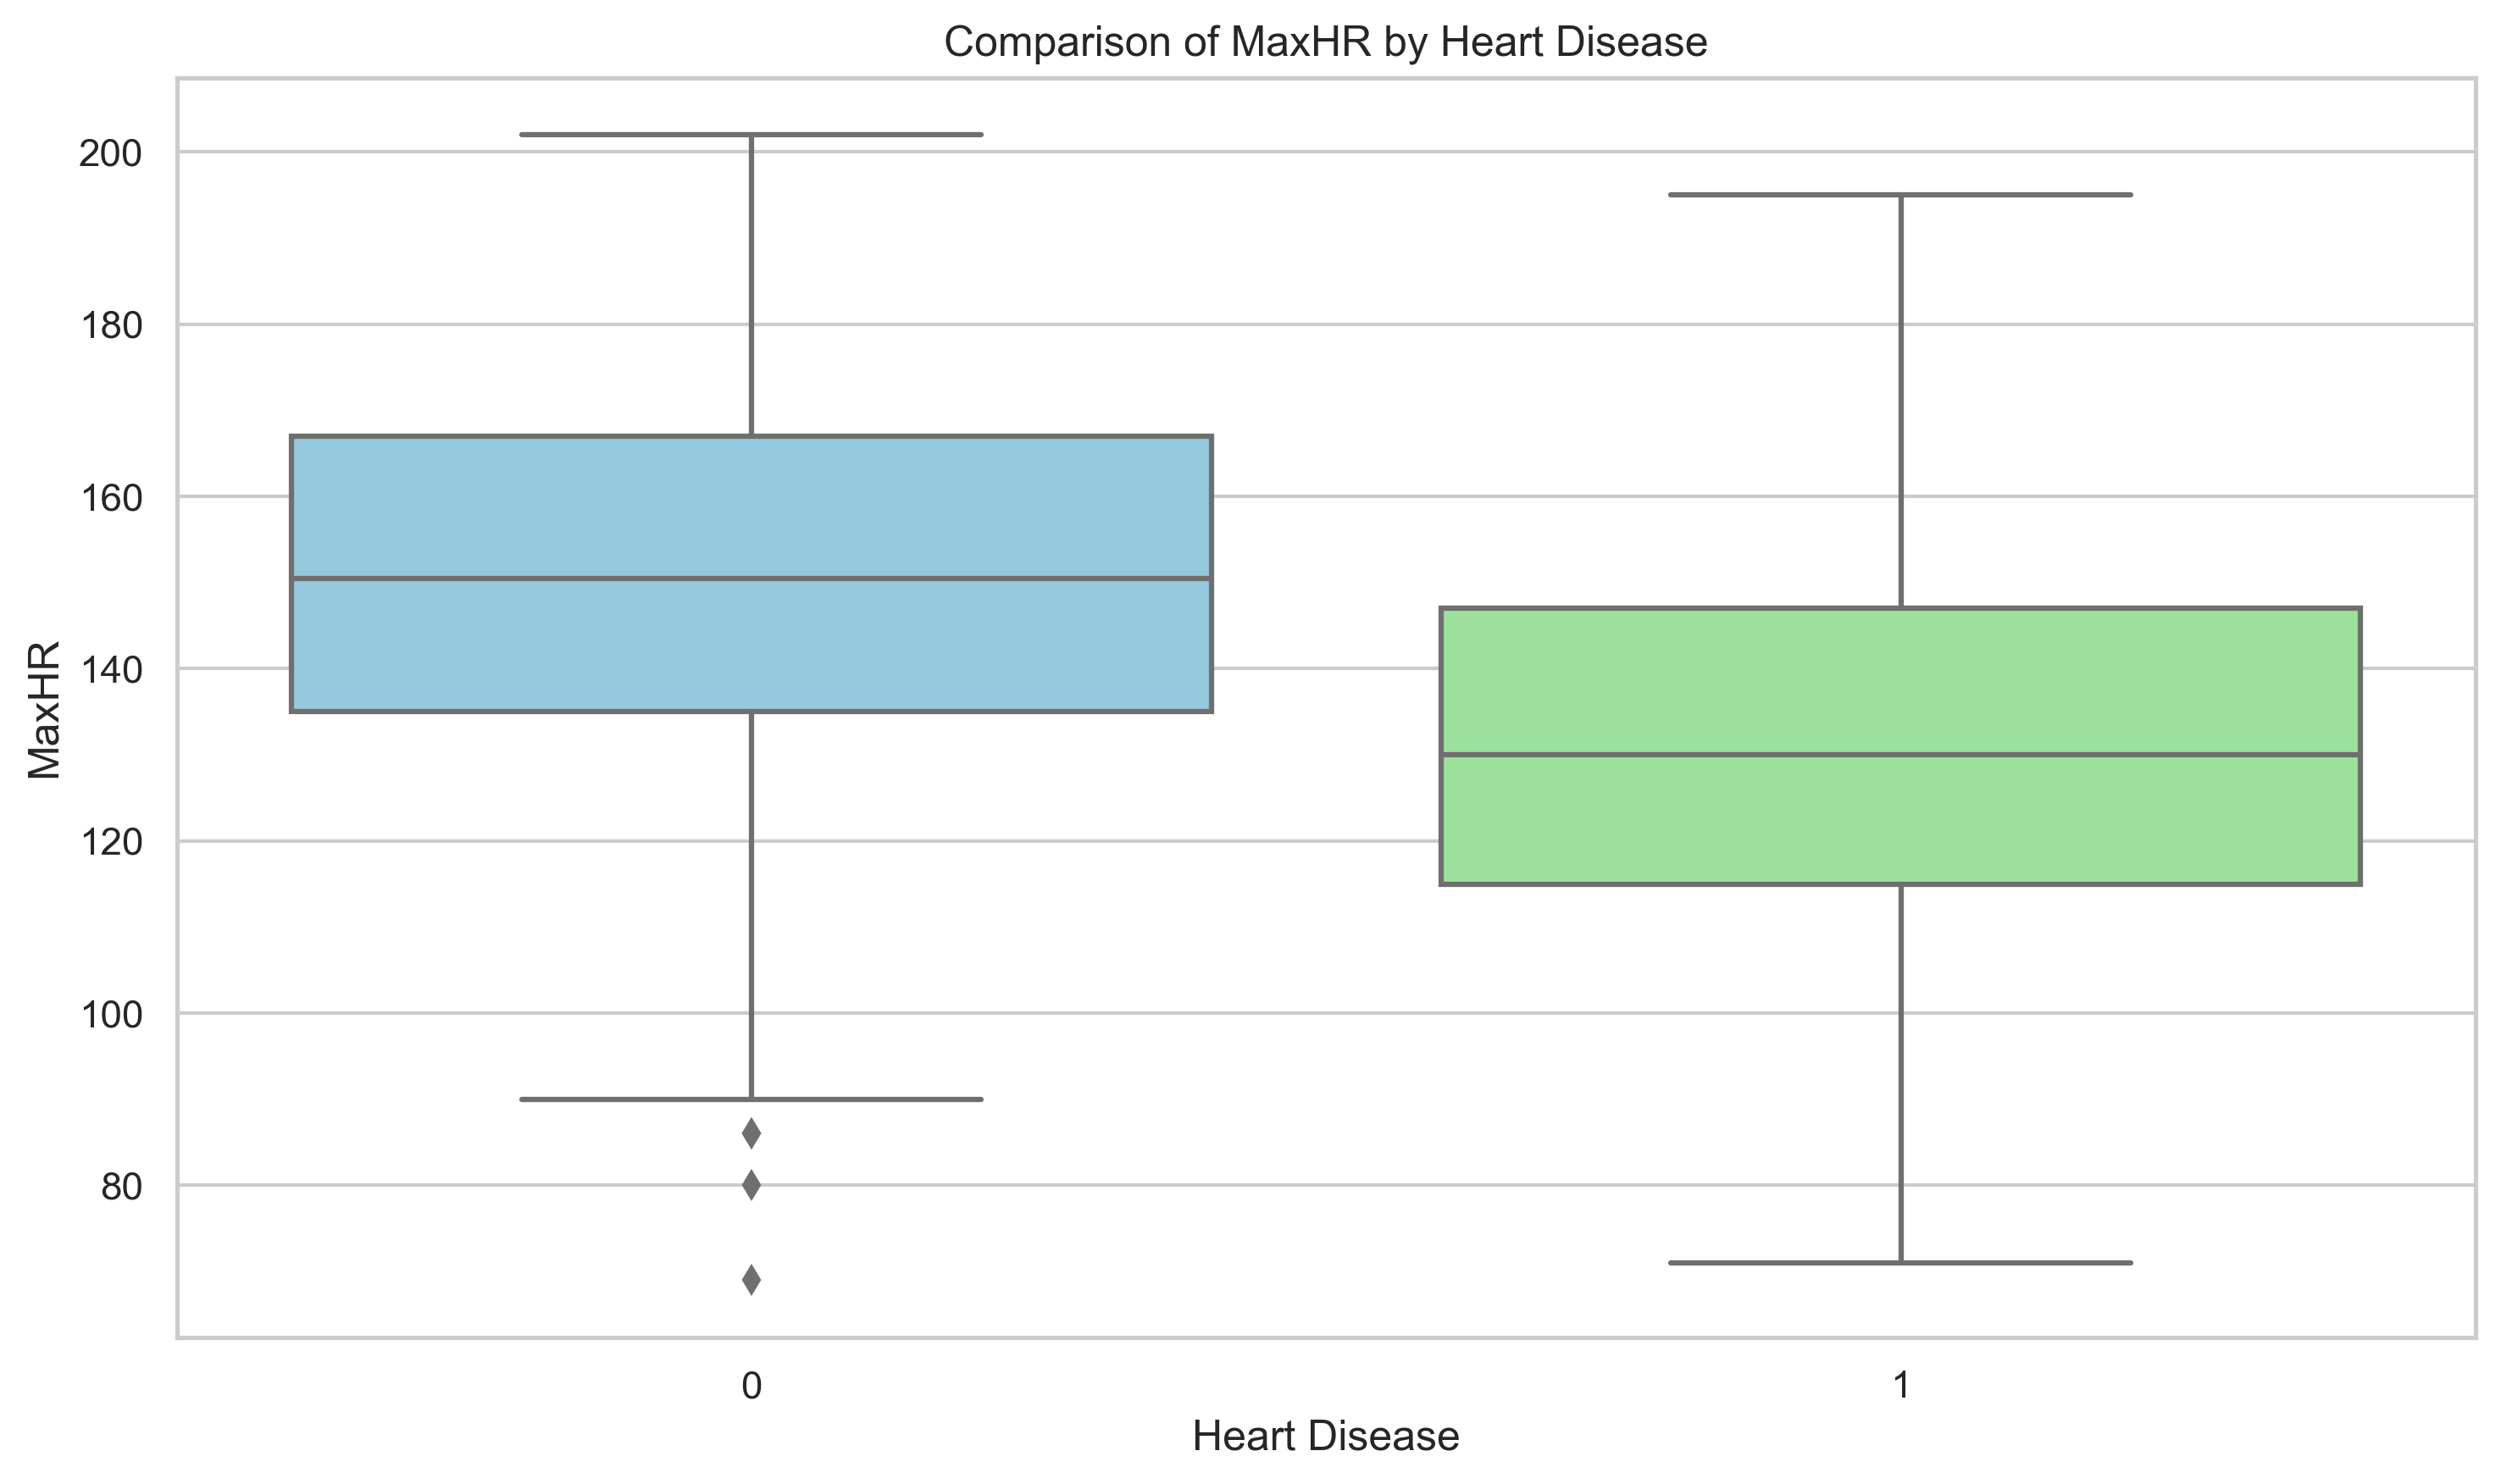

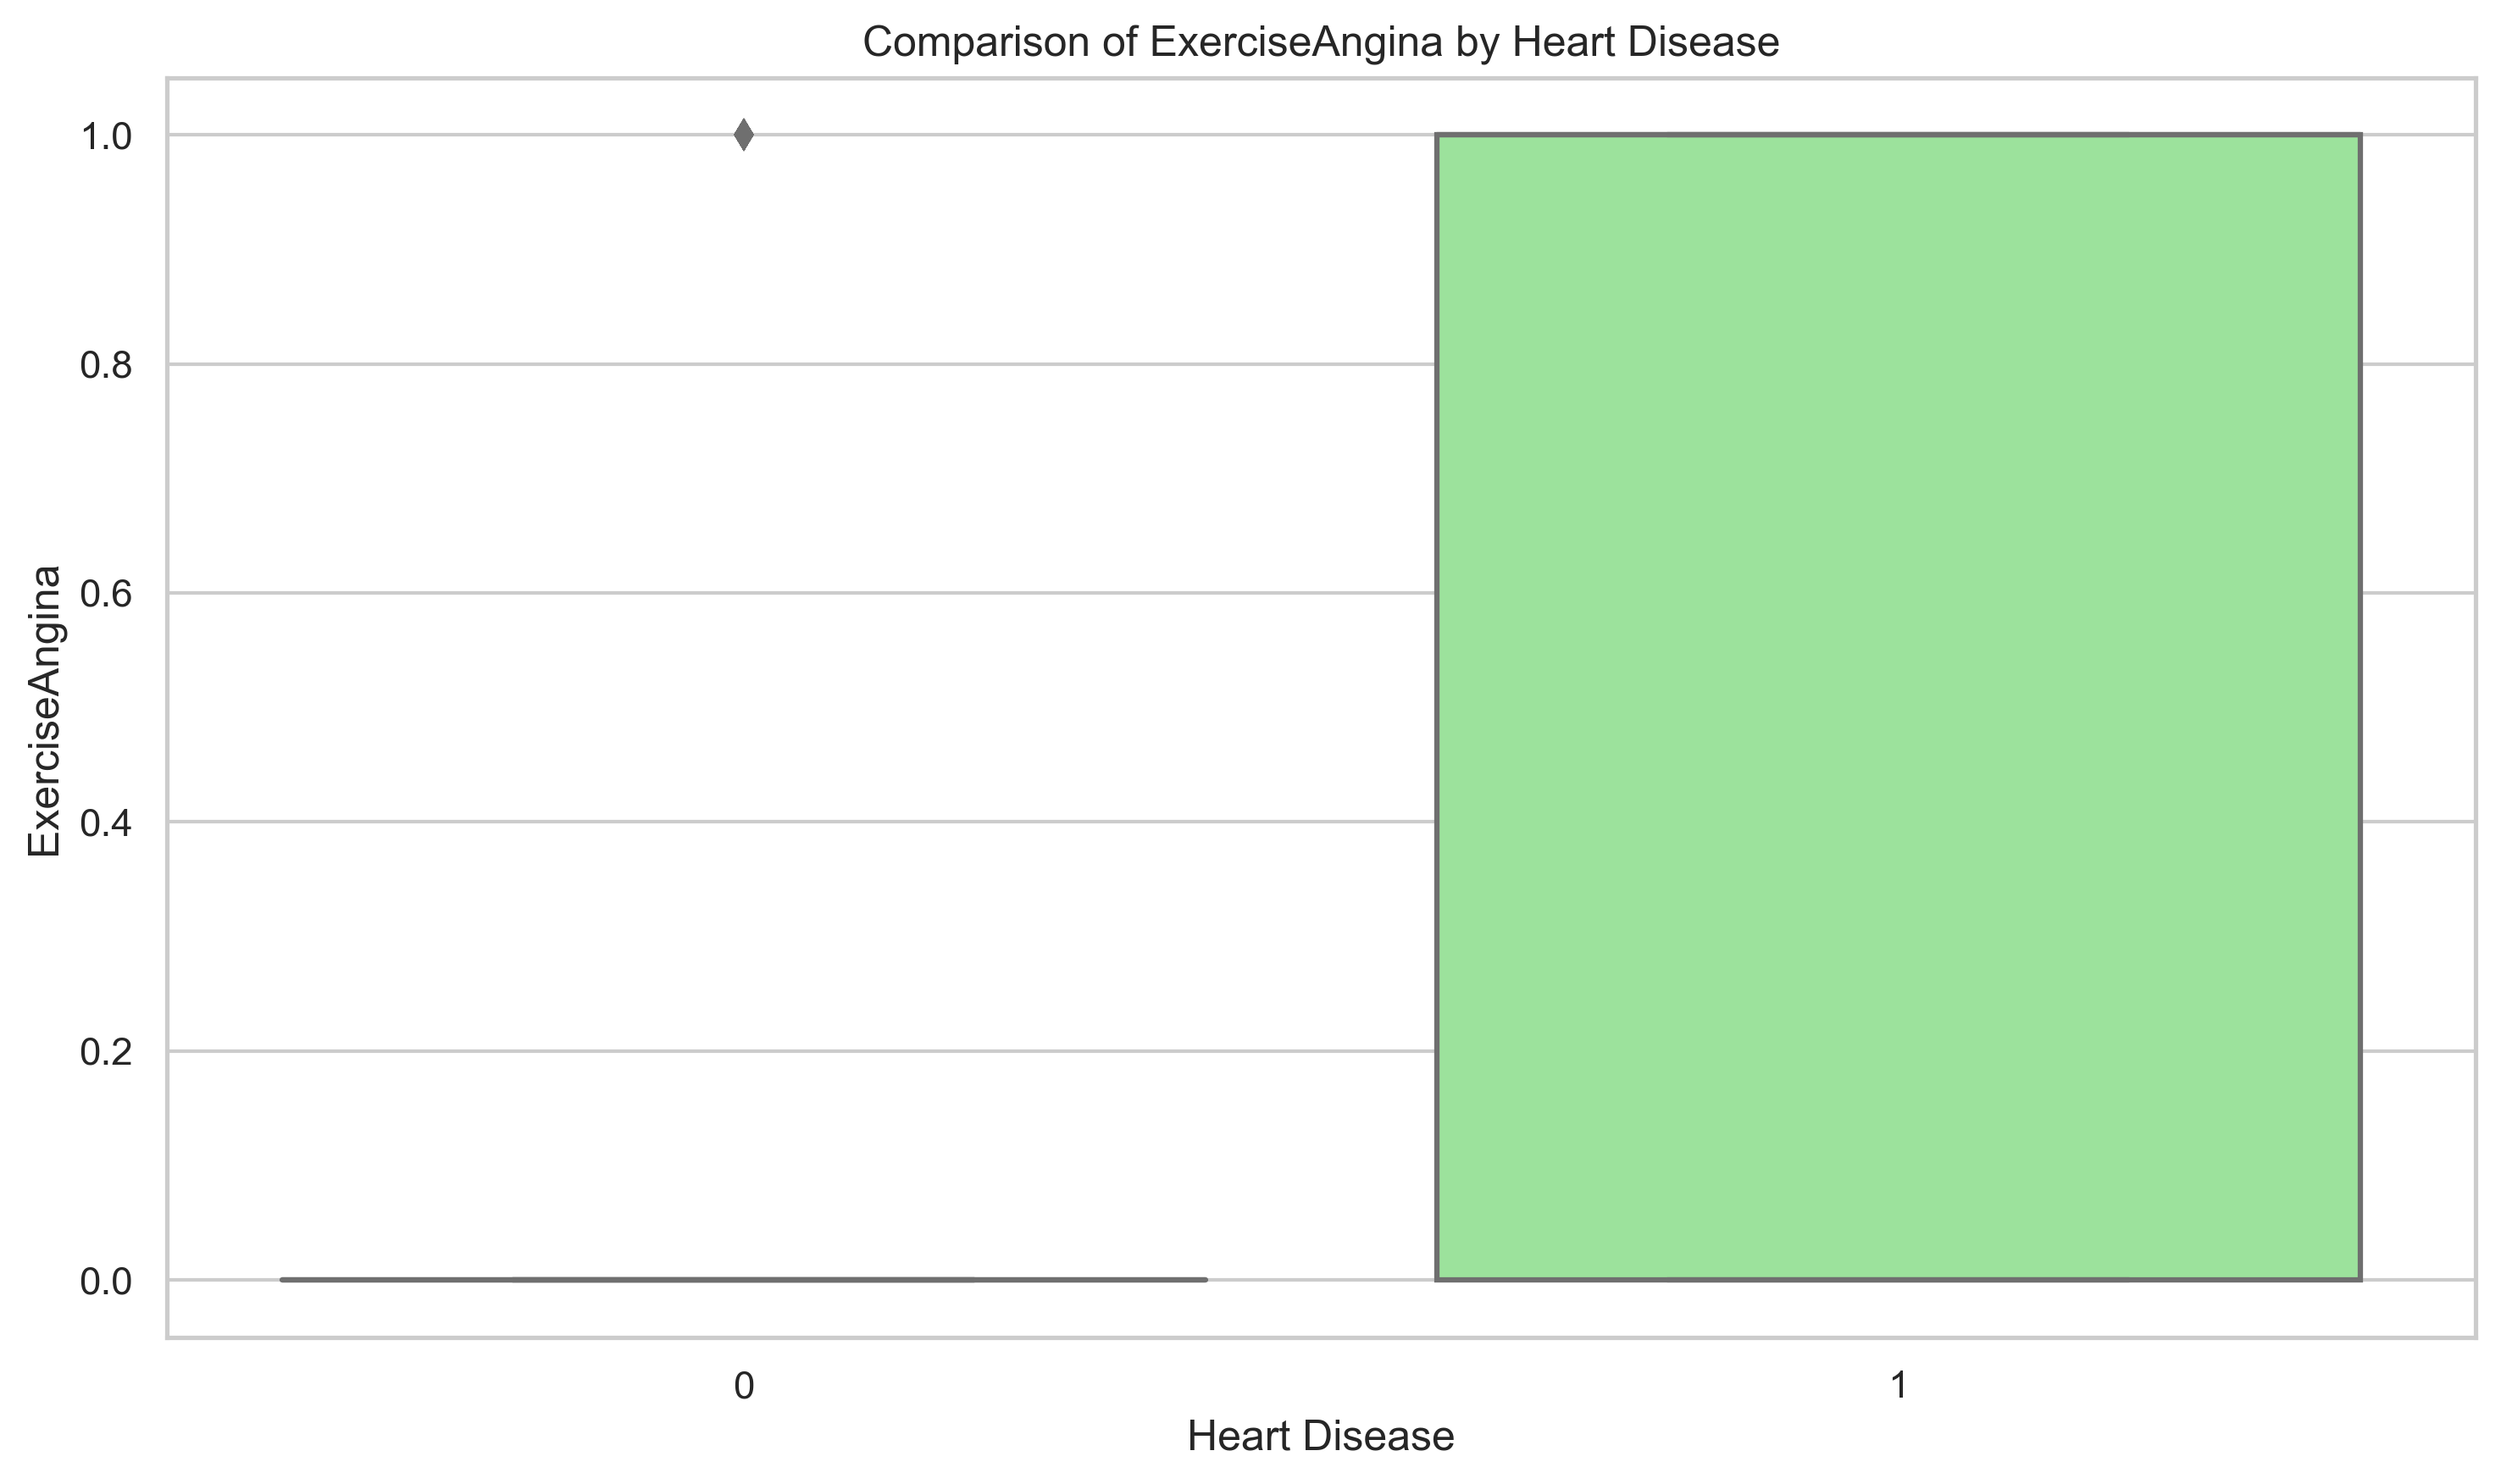

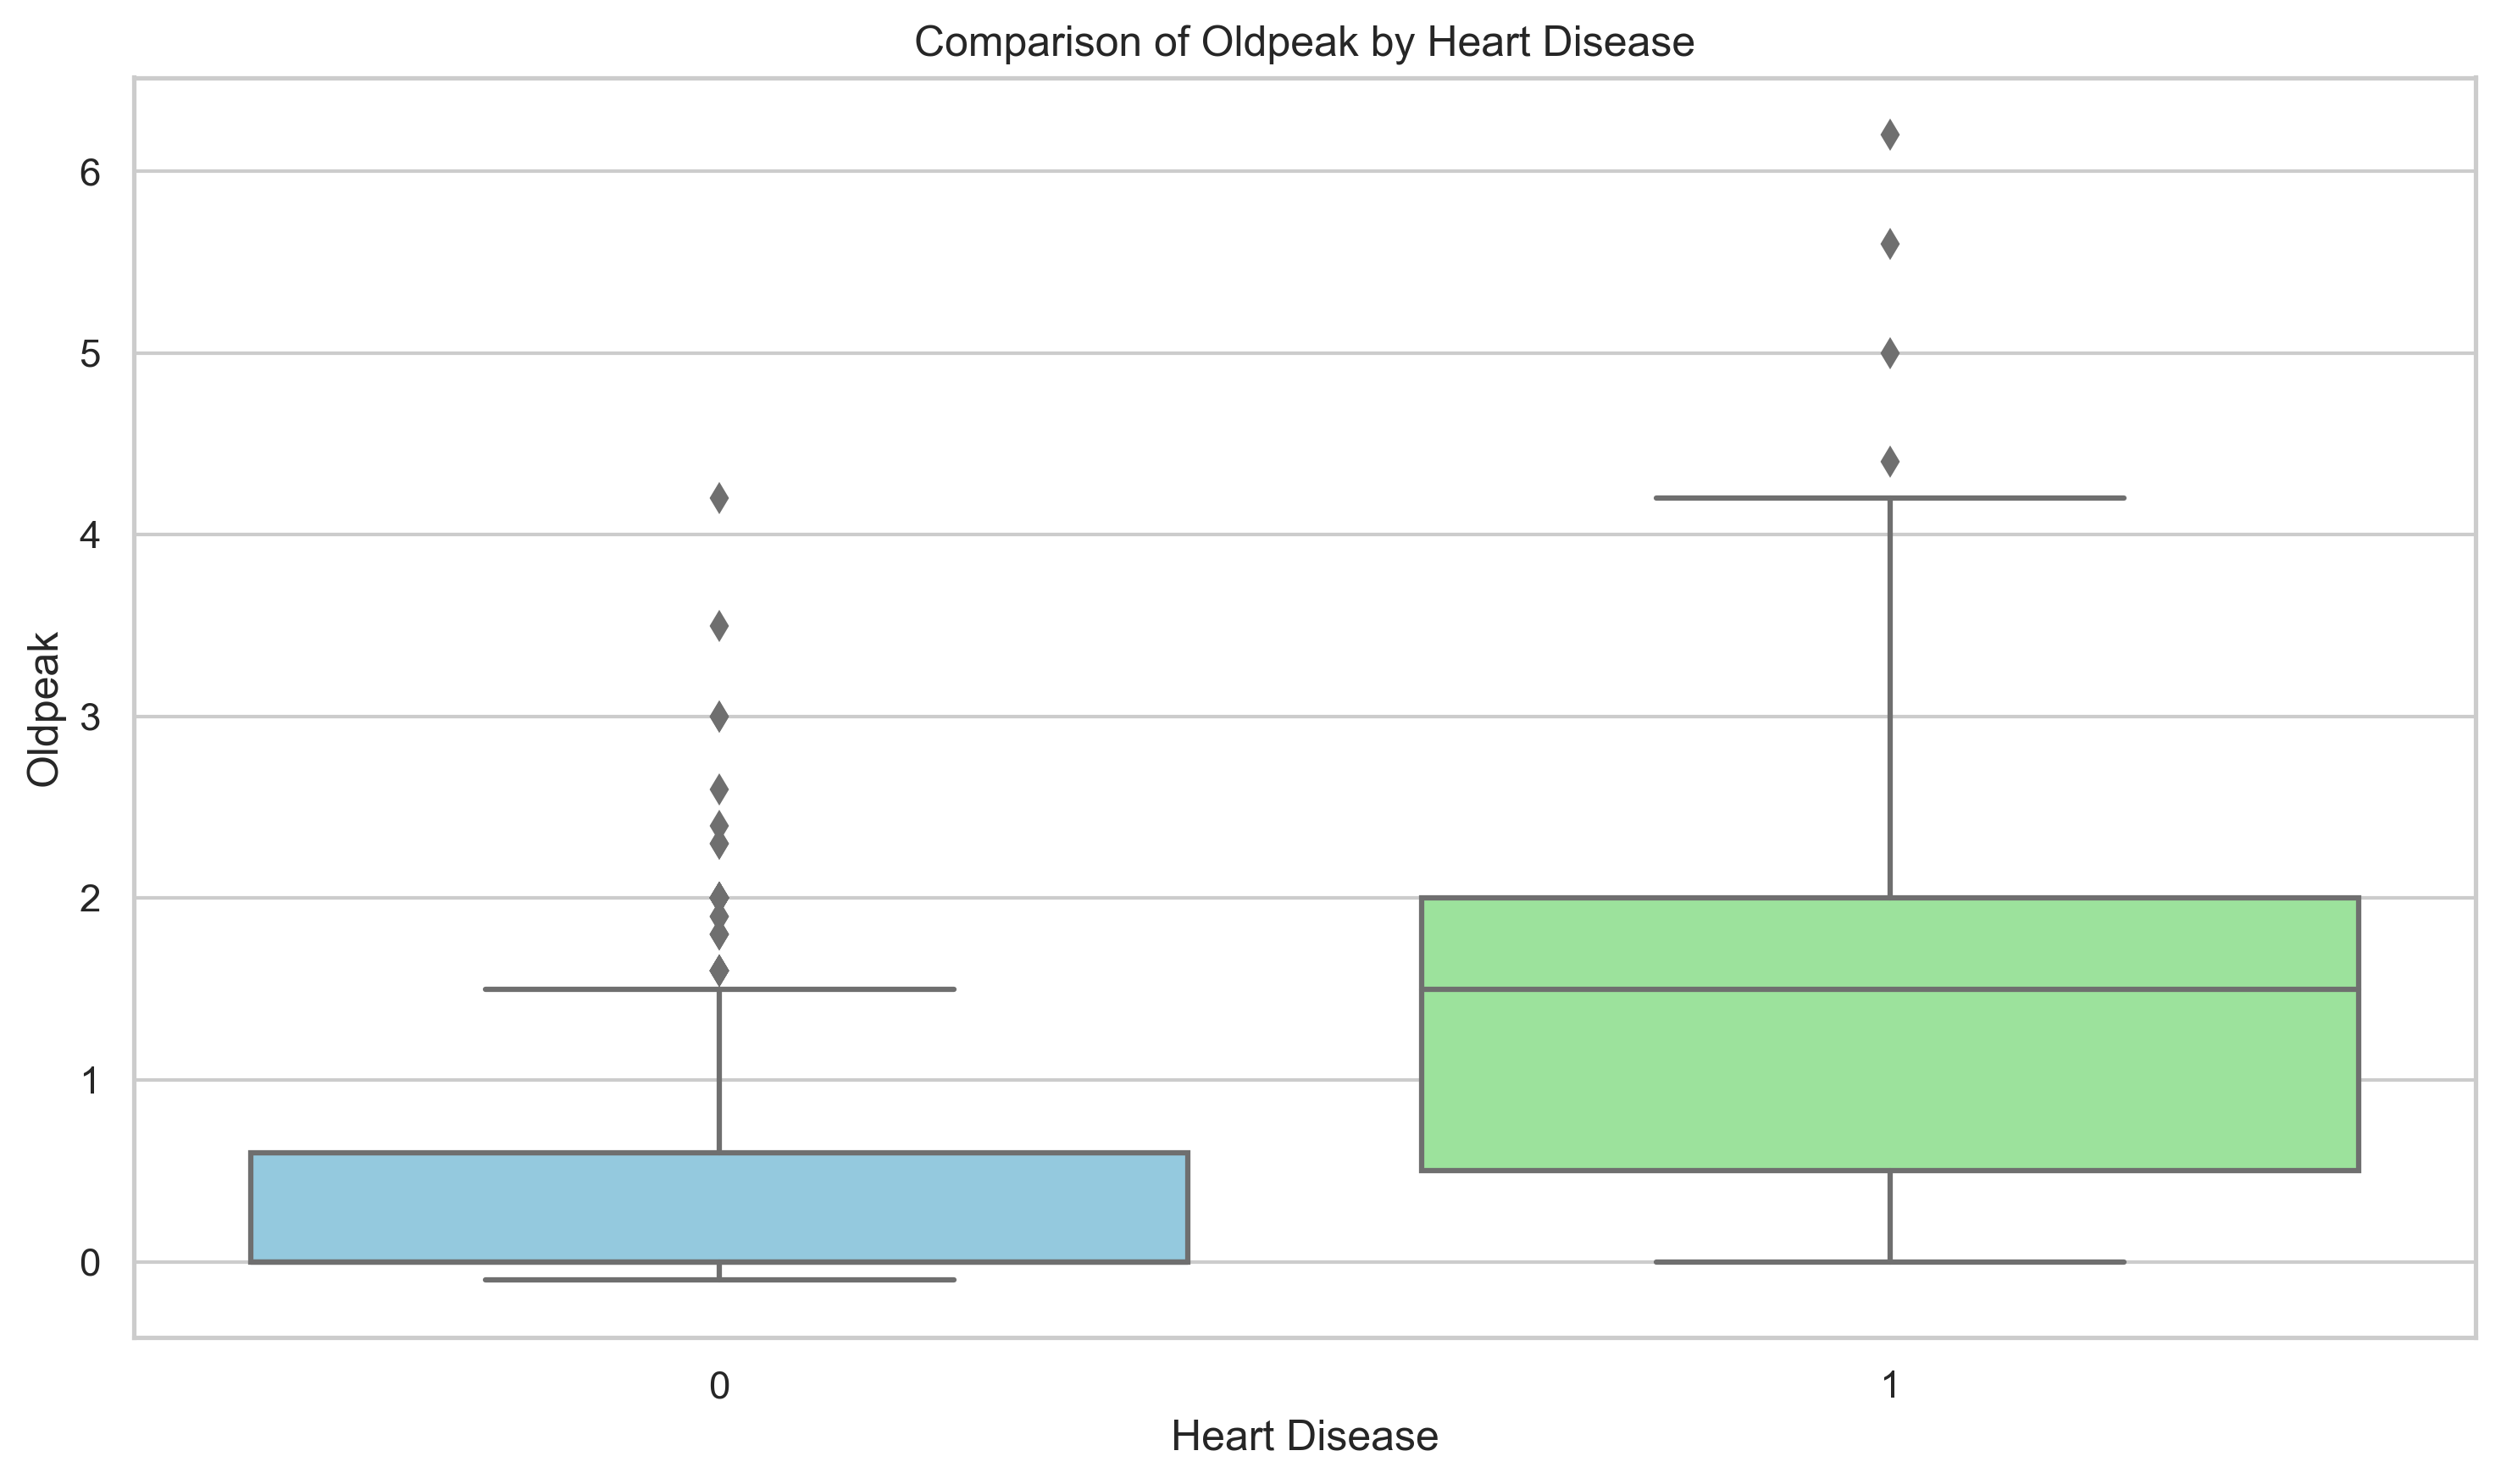

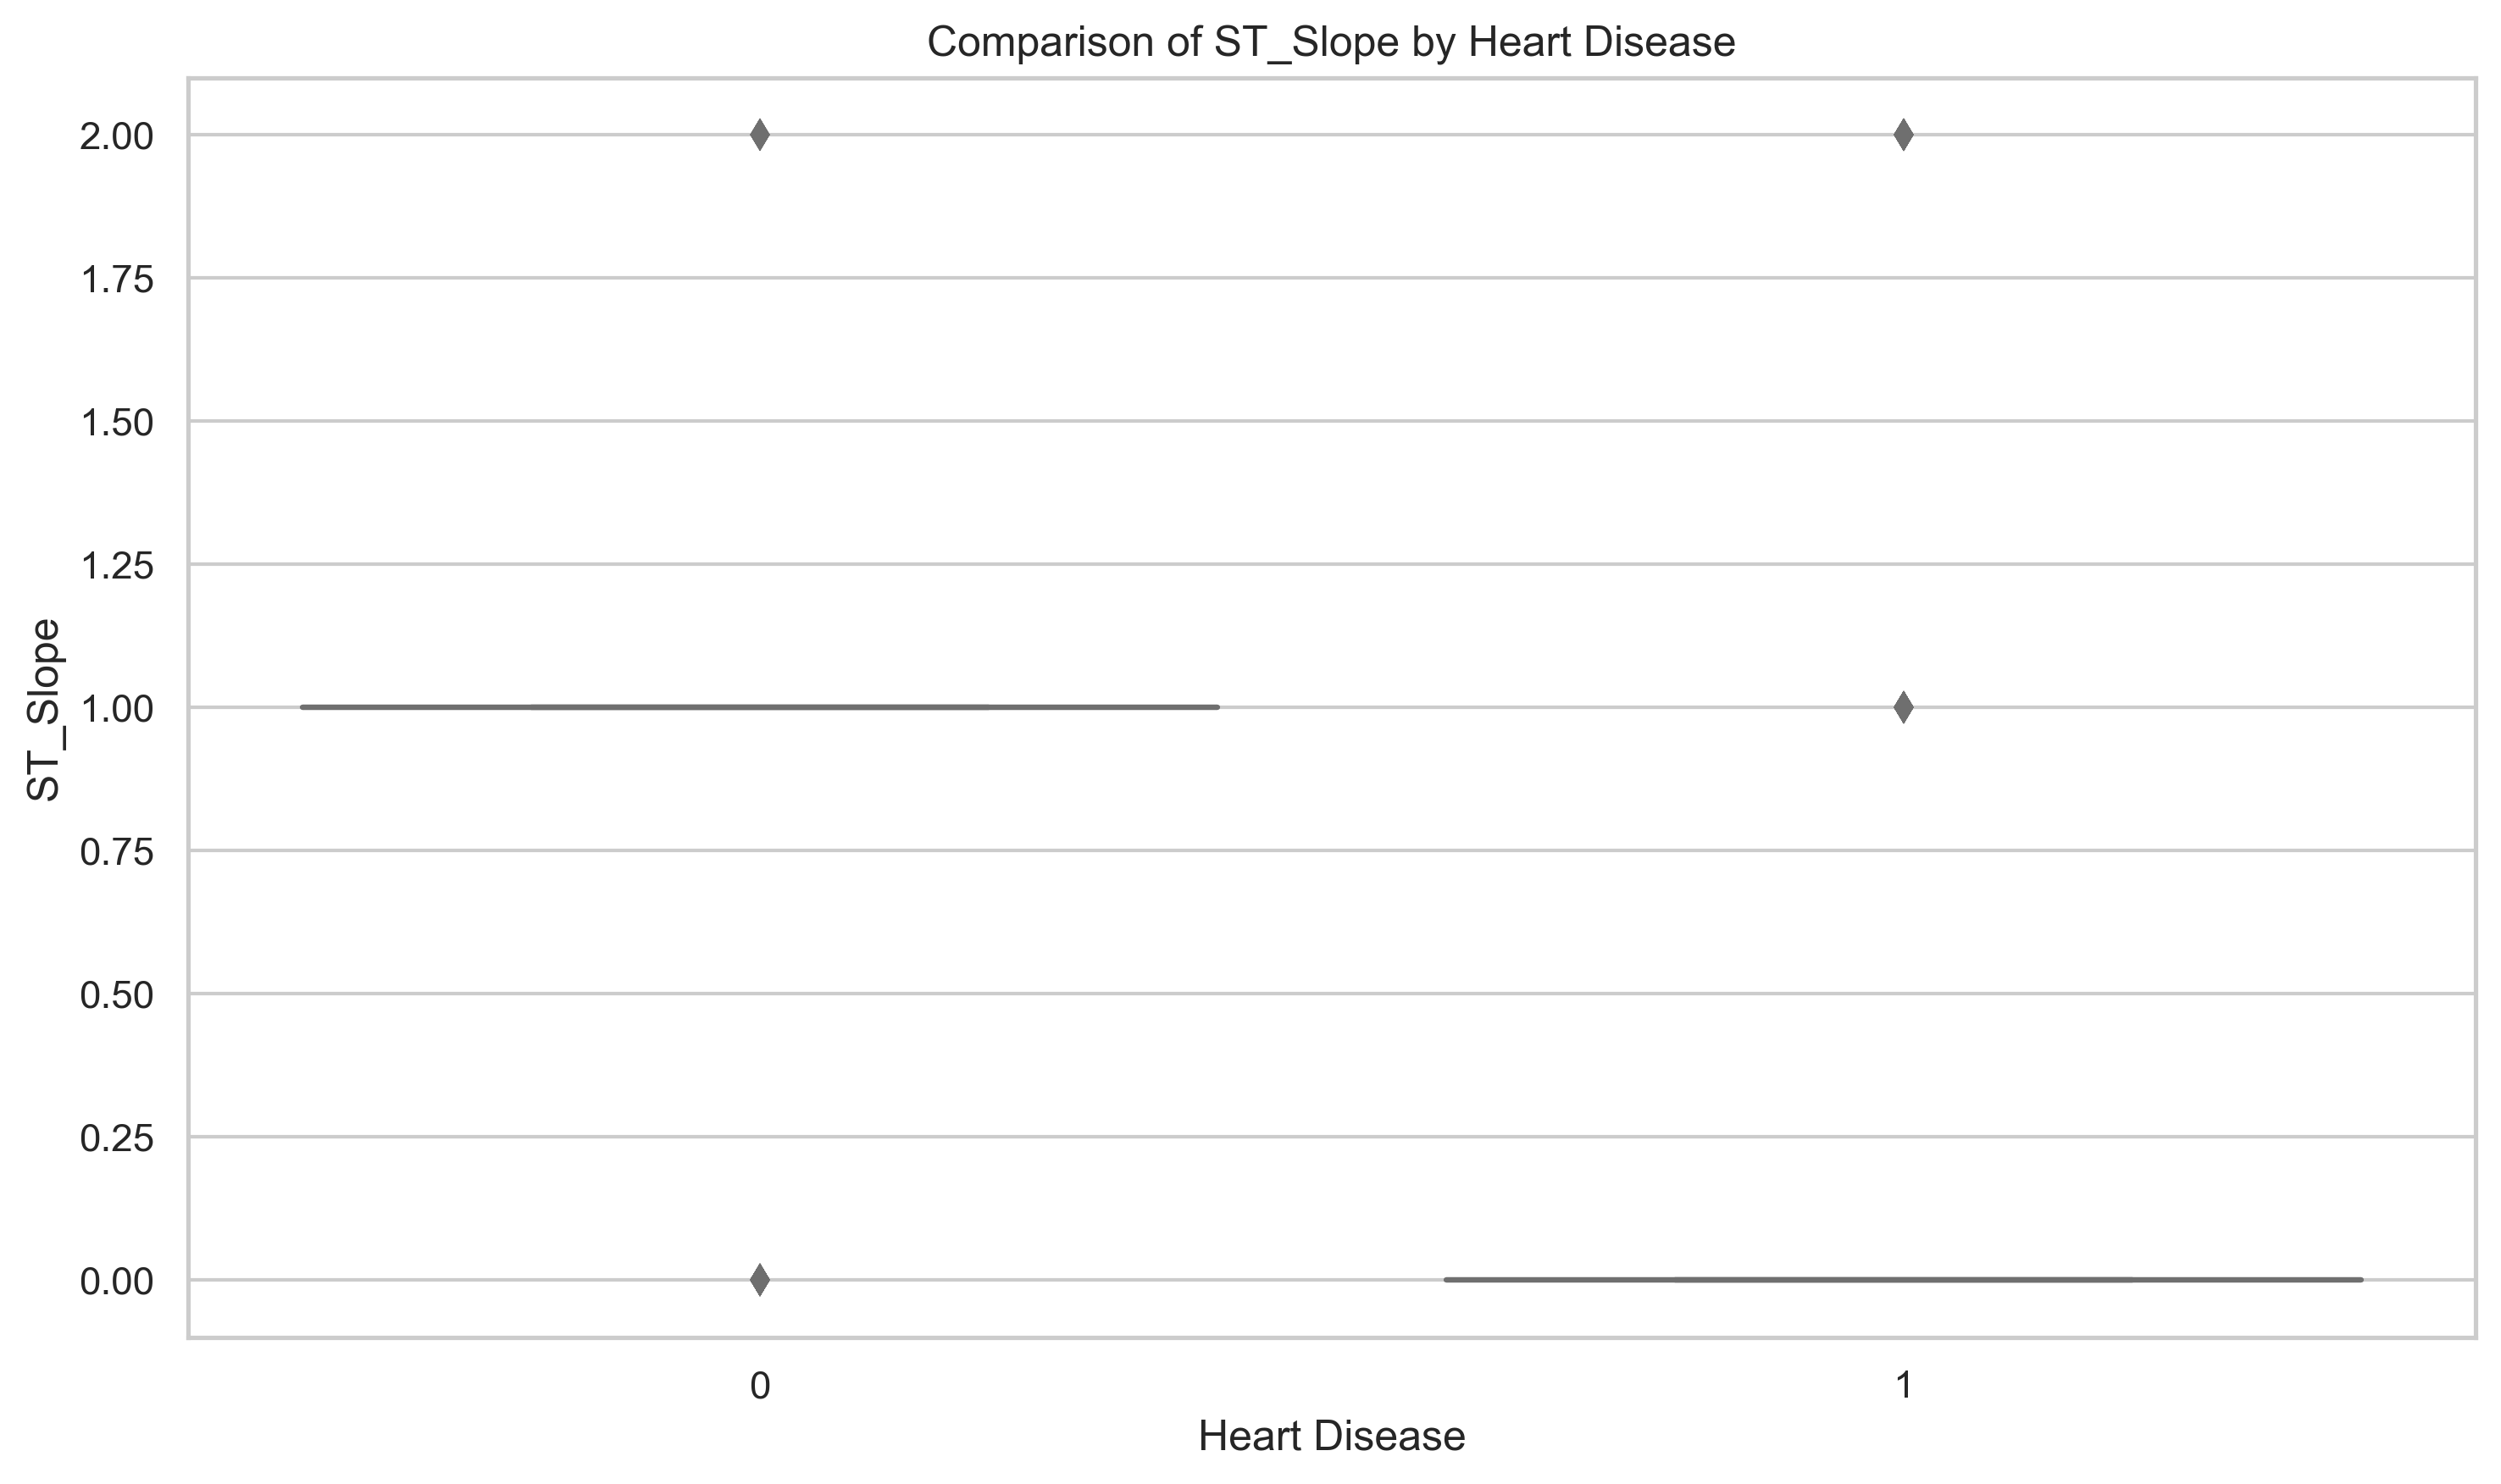

In [74]:

sns.set(style="whitegrid")

colors = ['skyblue', 'lightgreen']

for column in data.columns:
    if column != 'HeartDisease':
        
        plt.figure(figsize=(10, 6))
        
        if data[column].dtype == 'object':
            sns.countplot(data=data, x=column, hue='HeartDisease', palette=colors)
            plt.title(f'Comparison of {column} by Heart Disease')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.legend()
        
        else:
            sns.boxplot(data=data, x='HeartDisease', y=column, palette=colors)
            plt.title(f'Comparison of {column} by Heart Disease')
            plt.xlabel('Heart Disease')
            plt.ylabel(column)
        
        plt.tight_layout()
        plt.show()

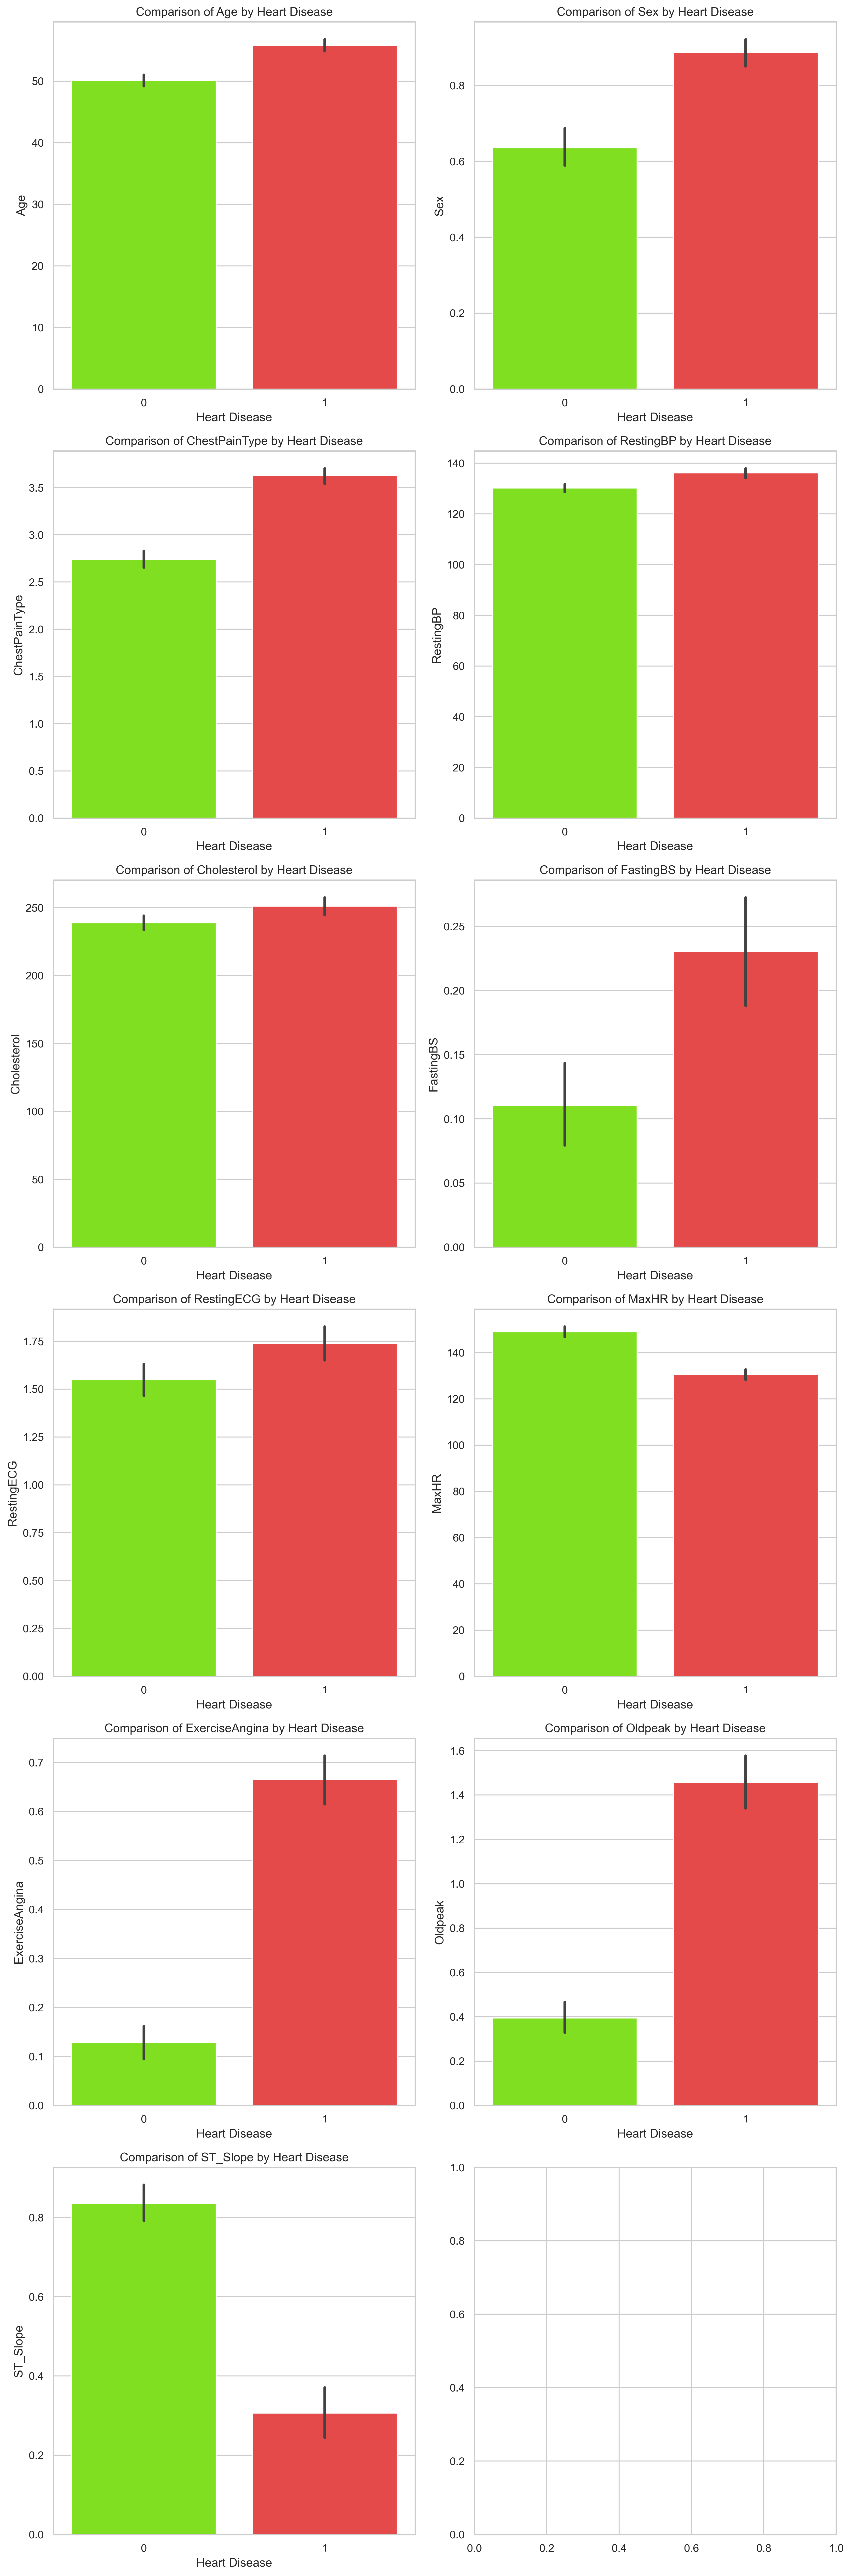

In [72]:
sns.set(style="whitegrid")

num_cols = 2  # Set the number of columns in your subplot grid
num_rows = -(-len(data.columns) // num_cols)  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

for idx, column in enumerate(data.columns):
    if column != 'HeartDisease':
        
        ax = axes[idx // num_cols, idx % num_cols]
        
        if data[column].dtype == 'object':
            sns.countplot(data=data, x=column, hue='HeartDisease', ax=ax, palette=['lightblue', 'green'])
            ax.set_title(f'Comparison of {column} by Heart Disease')
            ax.set_xlabel(column)
            ax.set_ylabel('Count')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
            ax.legend()
            
        else:
            sns.barplot(data=data, x='HeartDisease', y=column, ax=ax, palette=['#7FFF00', '#FF3030'])
            ax.set_title(f'Comparison of {column} by Heart Disease')
            ax.set_xlabel('Heart Disease')
            ax.set_ylabel(column)

plt.tight_layout()
plt.show()

In [18]:
clean_data.head(20)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0    40   M           ATA        140          289          0     Normal   
1    49   F           NAP        160          180          0     Normal   
2    37   M           ATA        130          283          0         ST   
3    48   F           ASY        138          214          0     Normal   
4    54   M           NAP        150          195          0     Normal   
5    39   M           NAP        120          339          0     Normal   
6    45   F           ATA        130          237          0     Normal   
7    54   M           ATA        110          208          0     Normal   
8    37   M           ASY        140          207          0     Normal   
9    48   F           ATA        120          284          0     Normal   
10   37   F           NAP        130          211          0     Normal   
11   58   M           ATA        136          164          0         ST   
12   39   M           ATA        120          204          0     Normal   
13   49   M           ASY        140          234          0     Normal   
14   42   F           NAP        115          211          0         ST   
15   54   F           ATA        120          273          0     Normal   
16   38   M           ASY        110          196          0     Normal   
17   43   F           ATA        120          201          0     Normal   
18   60   M           ASY        100          248          0     Normal   
19   36   M           ATA        120          267          0     Normal   

    MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0     172              N      0.0       Up             0  
1     156              N      1.0     Flat             1  
2      98              N      0.0       Up             0  
3     108              Y      1.5     Flat             1  
4     122              N      0.0       Up             0  
5     170              N      0.0       Up             0  
6     170              N      0.0       Up             0  
7     142              N      0.0       Up             0  
8     130              Y      1.5     Flat             1  
9     120              N      0.0       Up             0  
10    142              N      0.0       Up             0  
11     99              Y      2.0     Flat             1  
12    145              N      0.0       Up             0  
13    140              Y      1.0     Flat             1  
14    137              N      0.0       Up             0  
15    150              N      1.5     Flat             0  
16    166              N      0.0     Flat             1  
17    165              N      0.0       Up             0  
18    125              N      1.0     Flat             1  
19    160              N      3.0     Flat             1

# Categorical Encoding

C:\Users\Shahyan Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

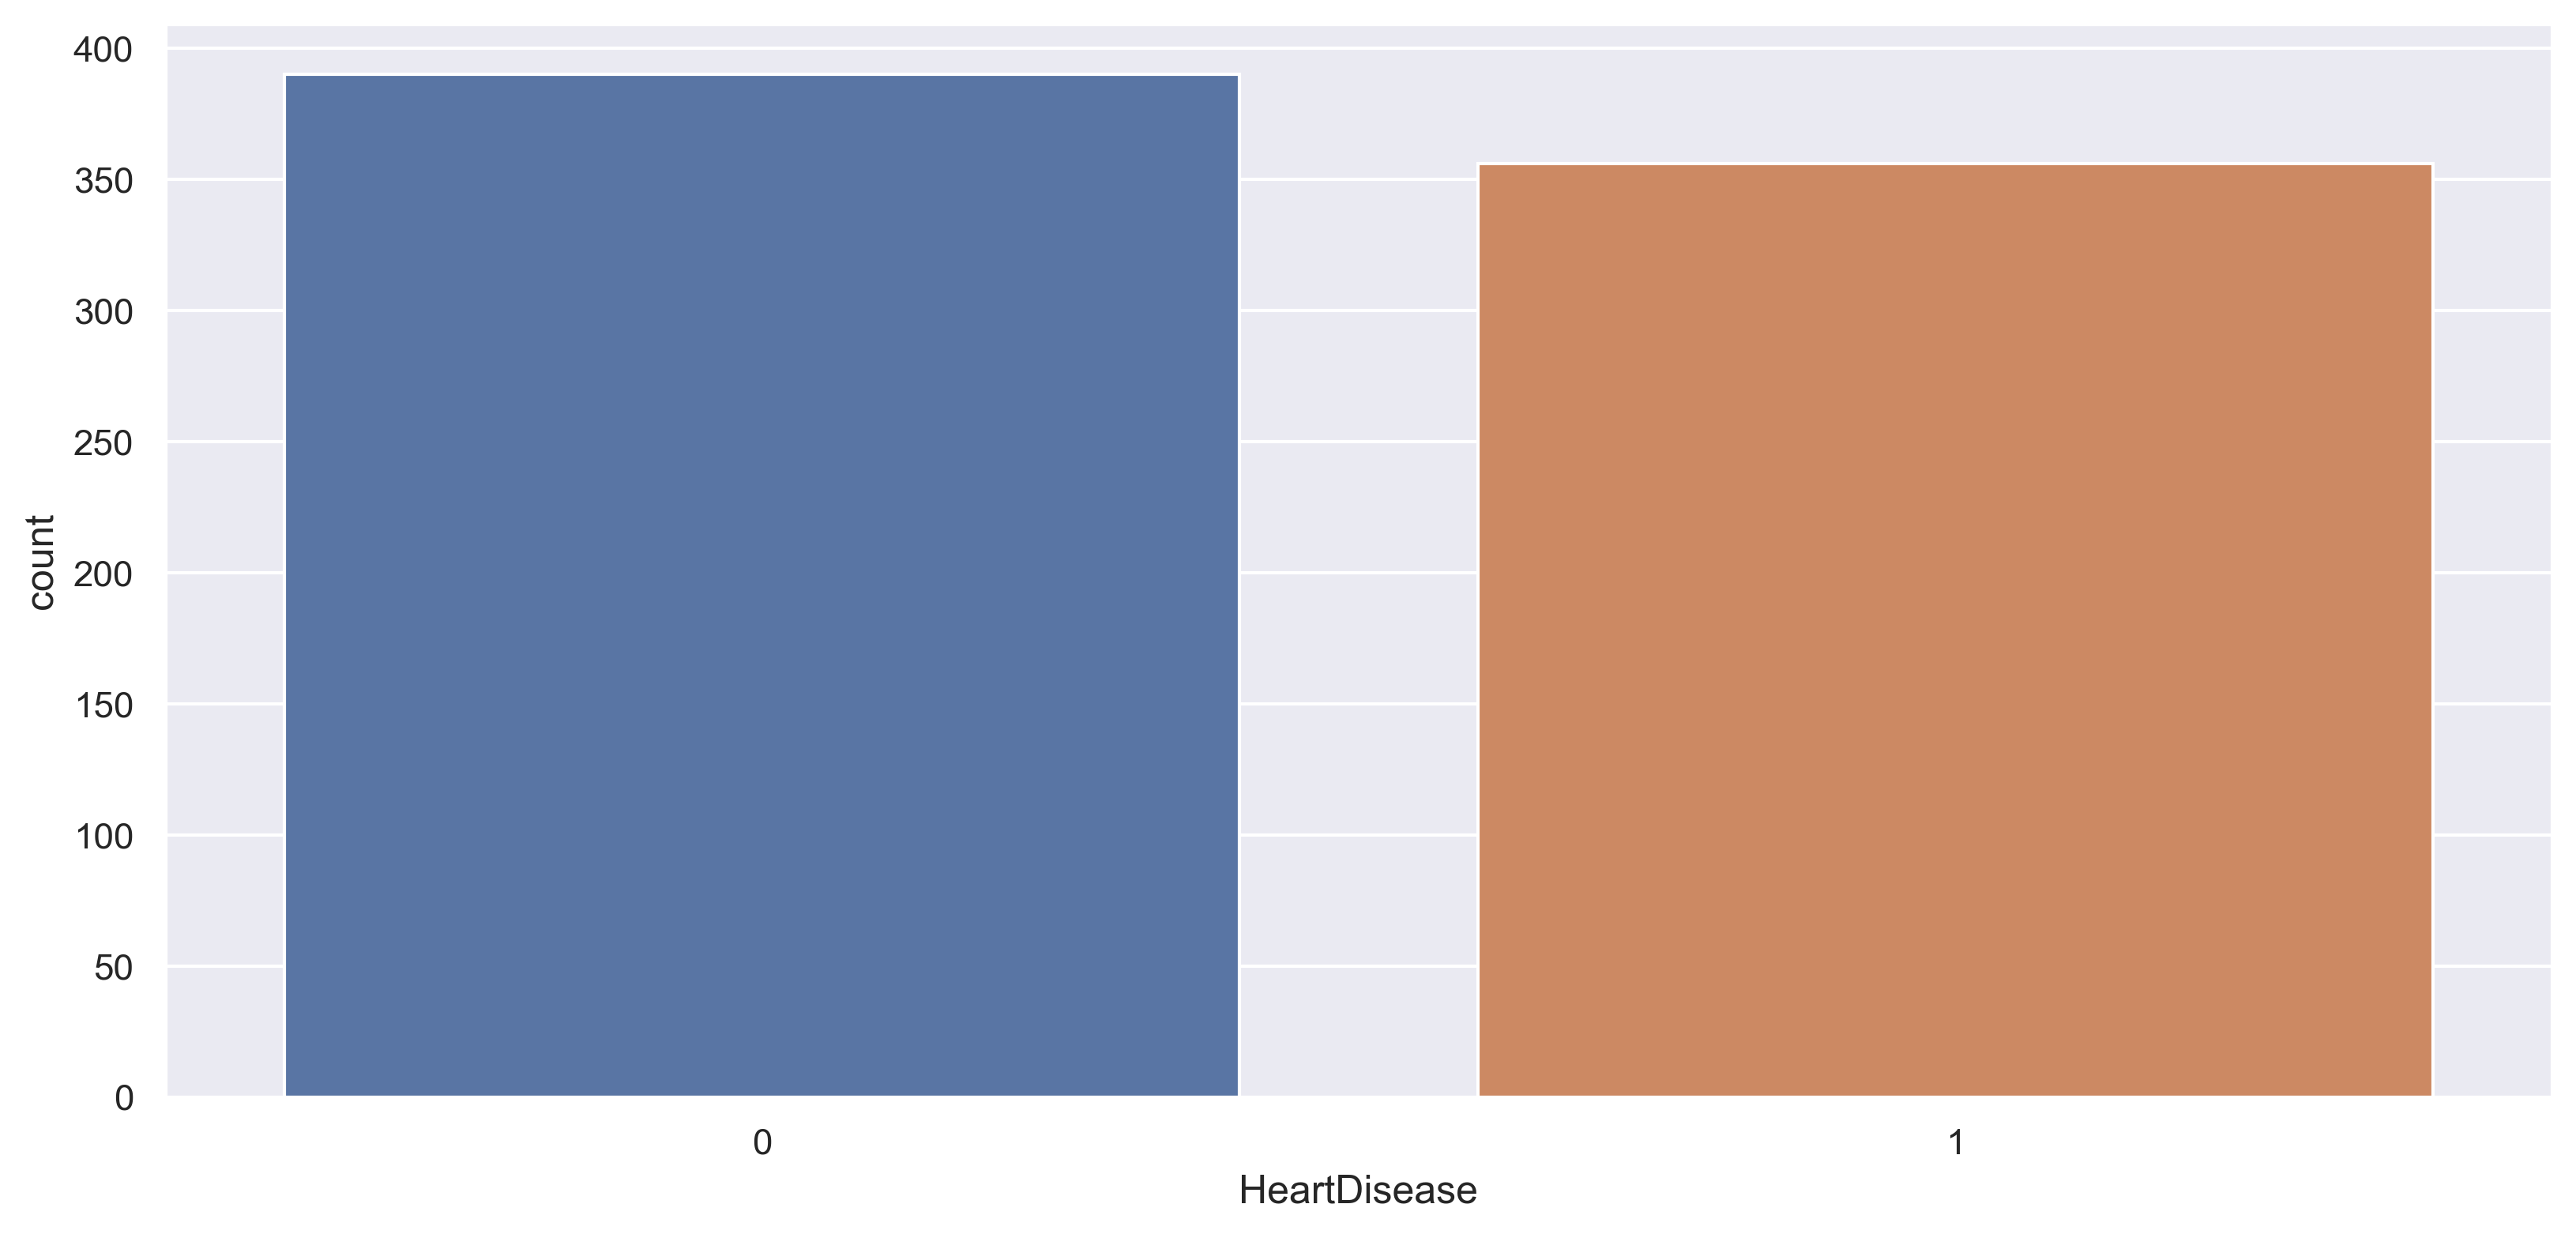

In [19]:
plt.rcParams['figure.dpi'] = 300
sns.countplot(data['HeartDisease'])

In [20]:
data.loc[:, 'Sex'] = data['Sex'].map({'M': 1, 'F': 0})
data.loc[:, 'ChestPainType'] = data['ChestPainType'].map({'TA': 1, 'ATA': 2, 'NAP': 3, 'ASY': 4})
data.loc[:, 'RestingECG'] = data['RestingECG'].map({'Normal': 1, 'ST': 2, 'LVH': 3})
data.loc[:, 'ExerciseAngina'] = data['ExerciseAngina'].map({'Y': 1, 'N': 0})
data.loc[:, 'ST_Slope'] = data['ST_Slope'].map({'Flat': 0, 'Up': 1, 'Down': 2})
data

C:\Users\SHAHYA~1\AppData\Local\Temp/ipykernel_9776/947387076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Sex'] = data['Sex'].map({'M': 1, 'F': 0})
C:\Users\SHAHYA~1\AppData\Local\Temp/ipykernel_9776/947387076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'ChestPainType'] = data['ChestPainType'].map({'TA': 1, 'ATA': 2, 'NAP': 3, 'ASY': 4})
C:\Users\SHAHYA~1\AppData\Local\Temp/ipykernel_9776/947387076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              2        140          289          0           1   
1     49    0              3        160          180          0           1   
2     37    1              2        130          283          0           2   
3     48    0              4        138          214          0           1   
4     54    1              3        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              1        110          264          0           1   
914   68    1              4        144          193          1           1   
915   57    1              4        130          131          0           1   
916   57    0              2        130          236          0           3   
917   38    1              3        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0      172               0      0.0         1             0  
1      156               0      1.0         0             1  
2       98               0      0.0         1             0  
3      108               1      1.5         0             1  
4      122               0      0.0         1             0  
..     ...             ...      ...       ...           ...  
913    132               0      1.2         0             1  
914    141               0      3.4         0             1  
915    115               1      1.2         0             1  
916    174               0      0.0         0             1  
917    173               0      0.0         1             0  

[746 rows x 12 columns]

In [21]:
data

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              2        140          289          0           1   
1     49    0              3        160          180          0           1   
2     37    1              2        130          283          0           2   
3     48    0              4        138          214          0           1   
4     54    1              3        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              1        110          264          0           1   
914   68    1              4        144          193          1           1   
915   57    1              4        130          131          0           1   
916   57    0              2        130          236          0           3   
917   38    1              3        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0      172               0      0.0         1             0  
1      156               0      1.0         0             1  
2       98               0      0.0         1             0  
3      108               1      1.5         0             1  
4      122               0      0.0         1             0  
..     ...             ...      ...       ...           ...  
913    132               0      1.2         0             1  
914    141               0      3.4         0             1  
915    115               1      1.2         0             1  
916    174               0      0.0         0             1  
917    173               0      0.0         1             0  

[746 rows x 12 columns]

In [22]:
count = 0
for index, row in data.iterrows():
    if row['Cholesterol'] > 200:
        count += 1
print(count)

596


In [23]:
inf_rows = data.isin([np.inf]).any(axis=1)
inf_rows

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 746, dtype: bool

In [24]:
data.isna().count()

Age               746
Sex               746
ChestPainType     746
RestingBP         746
Cholesterol       746
FastingBS         746
RestingECG        746
MaxHR             746
ExerciseAngina    746
Oldpeak           746
ST_Slope          746
HeartDisease      746
dtype: int64

In [25]:
x=data.drop(columns=['HeartDisease']).values    
y=data['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [26]:
len(x_train)

596

In [27]:
y_train

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,

In [28]:
x

array([[40. ,  1. ,  2. , ...,  0. ,  0. ,  1. ],
       [49. ,  0. ,  3. , ...,  0. ,  1. ,  0. ],
       [37. ,  1. ,  2. , ...,  0. ,  0. ,  1. ],
       ...,
       [57. ,  1. ,  4. , ...,  1. ,  1.2,  0. ],
       [57. ,  0. ,  2. , ...,  0. ,  0. ,  0. ],
       [38. ,  1. ,  3. , ...,  0. ,  0. ,  1. ]])

In [29]:
sc = StandardScaler()  #as data has no certain range
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train[:10]

array([[ 0.44202139,  0.57735027, -1.23663267,  0.42493092,  0.33997844,
        -0.43272508,  0.44996252,  0.19335442,  1.28409069,  0.08912566,
        -0.9751128 ],
       [-0.08890313, -1.73205081, -1.23663267,  0.42493092, -0.34169405,
        -0.43272508, -0.74725918, -0.01046453, -0.7787612 , -0.85269866,
         0.7192523 ],
       [ 0.33583649, -1.73205081, -1.23663267,  0.42493092,  0.83419099,
        -0.43272508,  1.64718421,  0.51946475, -0.7787612 ,  0.37167295,
        -0.9751128 ],
       [ 0.12346668,  0.57735027, -1.23663267,  1.59579927,  1.02165092,
        -0.43272508, -0.74725918,  1.41626814, -0.7787612 , -0.85269866,
         0.7192523 ],
       [-0.93838237,  0.57735027,  0.87520994,  0.13221383,  4.191428  ,
        -0.43272508, -0.74725918, -0.21428348, -0.7787612 , -0.85269866,
        -0.9751128 ],
       [-0.40745785,  0.57735027, -0.18071136, -1.03865453,  0.33997844,
        -0.43272508, -0.74725918,  1.41626814, -0.7787612 , -0.85269866,
        -0.975

In [30]:
print(np.isfinite(x_train).all())
print(np.isfinite(y_train).all())

True
True


In [31]:
from sklearn.metrics import accuracy_score

In [32]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
pred = rfc.predict(x_test)

In [33]:
rf_train = round(rfc.score(x_train, y_train) * 100, 2)
rf_accuracy = round(accuracy_score(pred, y_test) * 100, 2)

print("Training Accuracy    :", rf_train, "%")
print("Model Accuracy Score :", rf_accuracy, "%")
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

Training Accuracy    : 100.0 %
Model Accuracy Score : 88.0 %
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        71
           1       0.94      0.82      0.88        79

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.89      0.88      0.88       150

[[67  4]
 [14 65]]


In [34]:
nn = MLPClassifier(hidden_layer_sizes = (4,4,4),max_iter=1200)
nn.fit(x_train,y_train)
pred = nn.predict(x_test)

In [35]:
nn_train = round(nn.score(x_train, y_train) * 100, 2)
nn_accuracy = round(accuracy_score(pred, y_test) * 100, 2)

print("Training Accuracy    :", rf_train, "%")
print("Model Accuracy Score :", rf_accuracy, "%")
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

Training Accuracy    : 100.0 %
Model Accuracy Score : 88.0 %
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        71
           1       0.93      0.86      0.89        79

    accuracy                           0.89       150
   macro avg       0.89      0.90      0.89       150
weighted avg       0.90      0.89      0.89       150

[[66  5]
 [11 68]]


In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [37]:
knn_train = round(knn.score(x_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(pred, y_test) * 100, 2)

print("Training Accuracy    :", rf_train, "%")
print("Model Accuracy Score :", rf_accuracy, "%")
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

Training Accuracy    : 100.0 %
Model Accuracy Score : 88.0 %
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        71
           1       0.89      0.86      0.88        79

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150

[[63  8]
 [11 68]]


In [38]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
pred = svm.predict(x_test)

In [39]:
svm_train = round(svm.score(x_train, y_train) * 100, 2)
svm_accuracy = round(accuracy_score(pred, y_test) * 100, 2)

print("Training Accuracy    :", rf_train, "%")
print("Model Accuracy Score :", rf_accuracy, "%")
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

Training Accuracy    : 100.0 %
Model Accuracy Score : 88.0 %
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        71
           1       0.93      0.87      0.90        79

    accuracy                           0.90       150
   macro avg       0.90      0.90      0.90       150
weighted avg       0.90      0.90      0.90       150

[[66  5]
 [10 69]]


In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [41]:
lr_train = round(lr.score(x_train, y_train) * 100, 2)
lr_accuracy = round(accuracy_score(pred, y_test) * 100, 2)

print("Training Accuracy    :", lr_train, "%")
print("Model Accuracy Score :", lr_accuracy, "%")
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

Training Accuracy    : 85.07 %
Model Accuracy Score : 86.67 %
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        71
           1       0.93      0.81      0.86        79

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150

[[66  5]
 [15 64]]


In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
pred = gb.predict(x_test)


In [43]:
gb_train = round(gb.score(x_train, y_train) * 100, 2)
gb_accuracy = round(accuracy_score(pred, y_test) * 100, 2)

print("Training Accuracy    :", rf_train, "%")
print("Model Accuracy Score :", rf_accuracy, "%")
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

Training Accuracy    : 100.0 %
Model Accuracy Score : 88.0 %
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        71
           1       0.94      0.82      0.88        79

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.89      0.88      0.88       150

[[67  4]
 [14 65]]


In [44]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression', 'Random Forest Classifier', 'Support Vector Machine (SVM)',
        'Gradient Boosting', 'K-Nearest Neighbors (KNN)','Neural Network (MLP)'
    ],
    'Training Accuracy Score': [85.07, 100, 90.44, 95.3, 88.76, 100],
    'Model Accuracy Score': [86.67, 89.33, 90, 88, 87.33, 89.33
    ],
    'Model f1 Score': [87,89,90,87,88,89
    ]
})

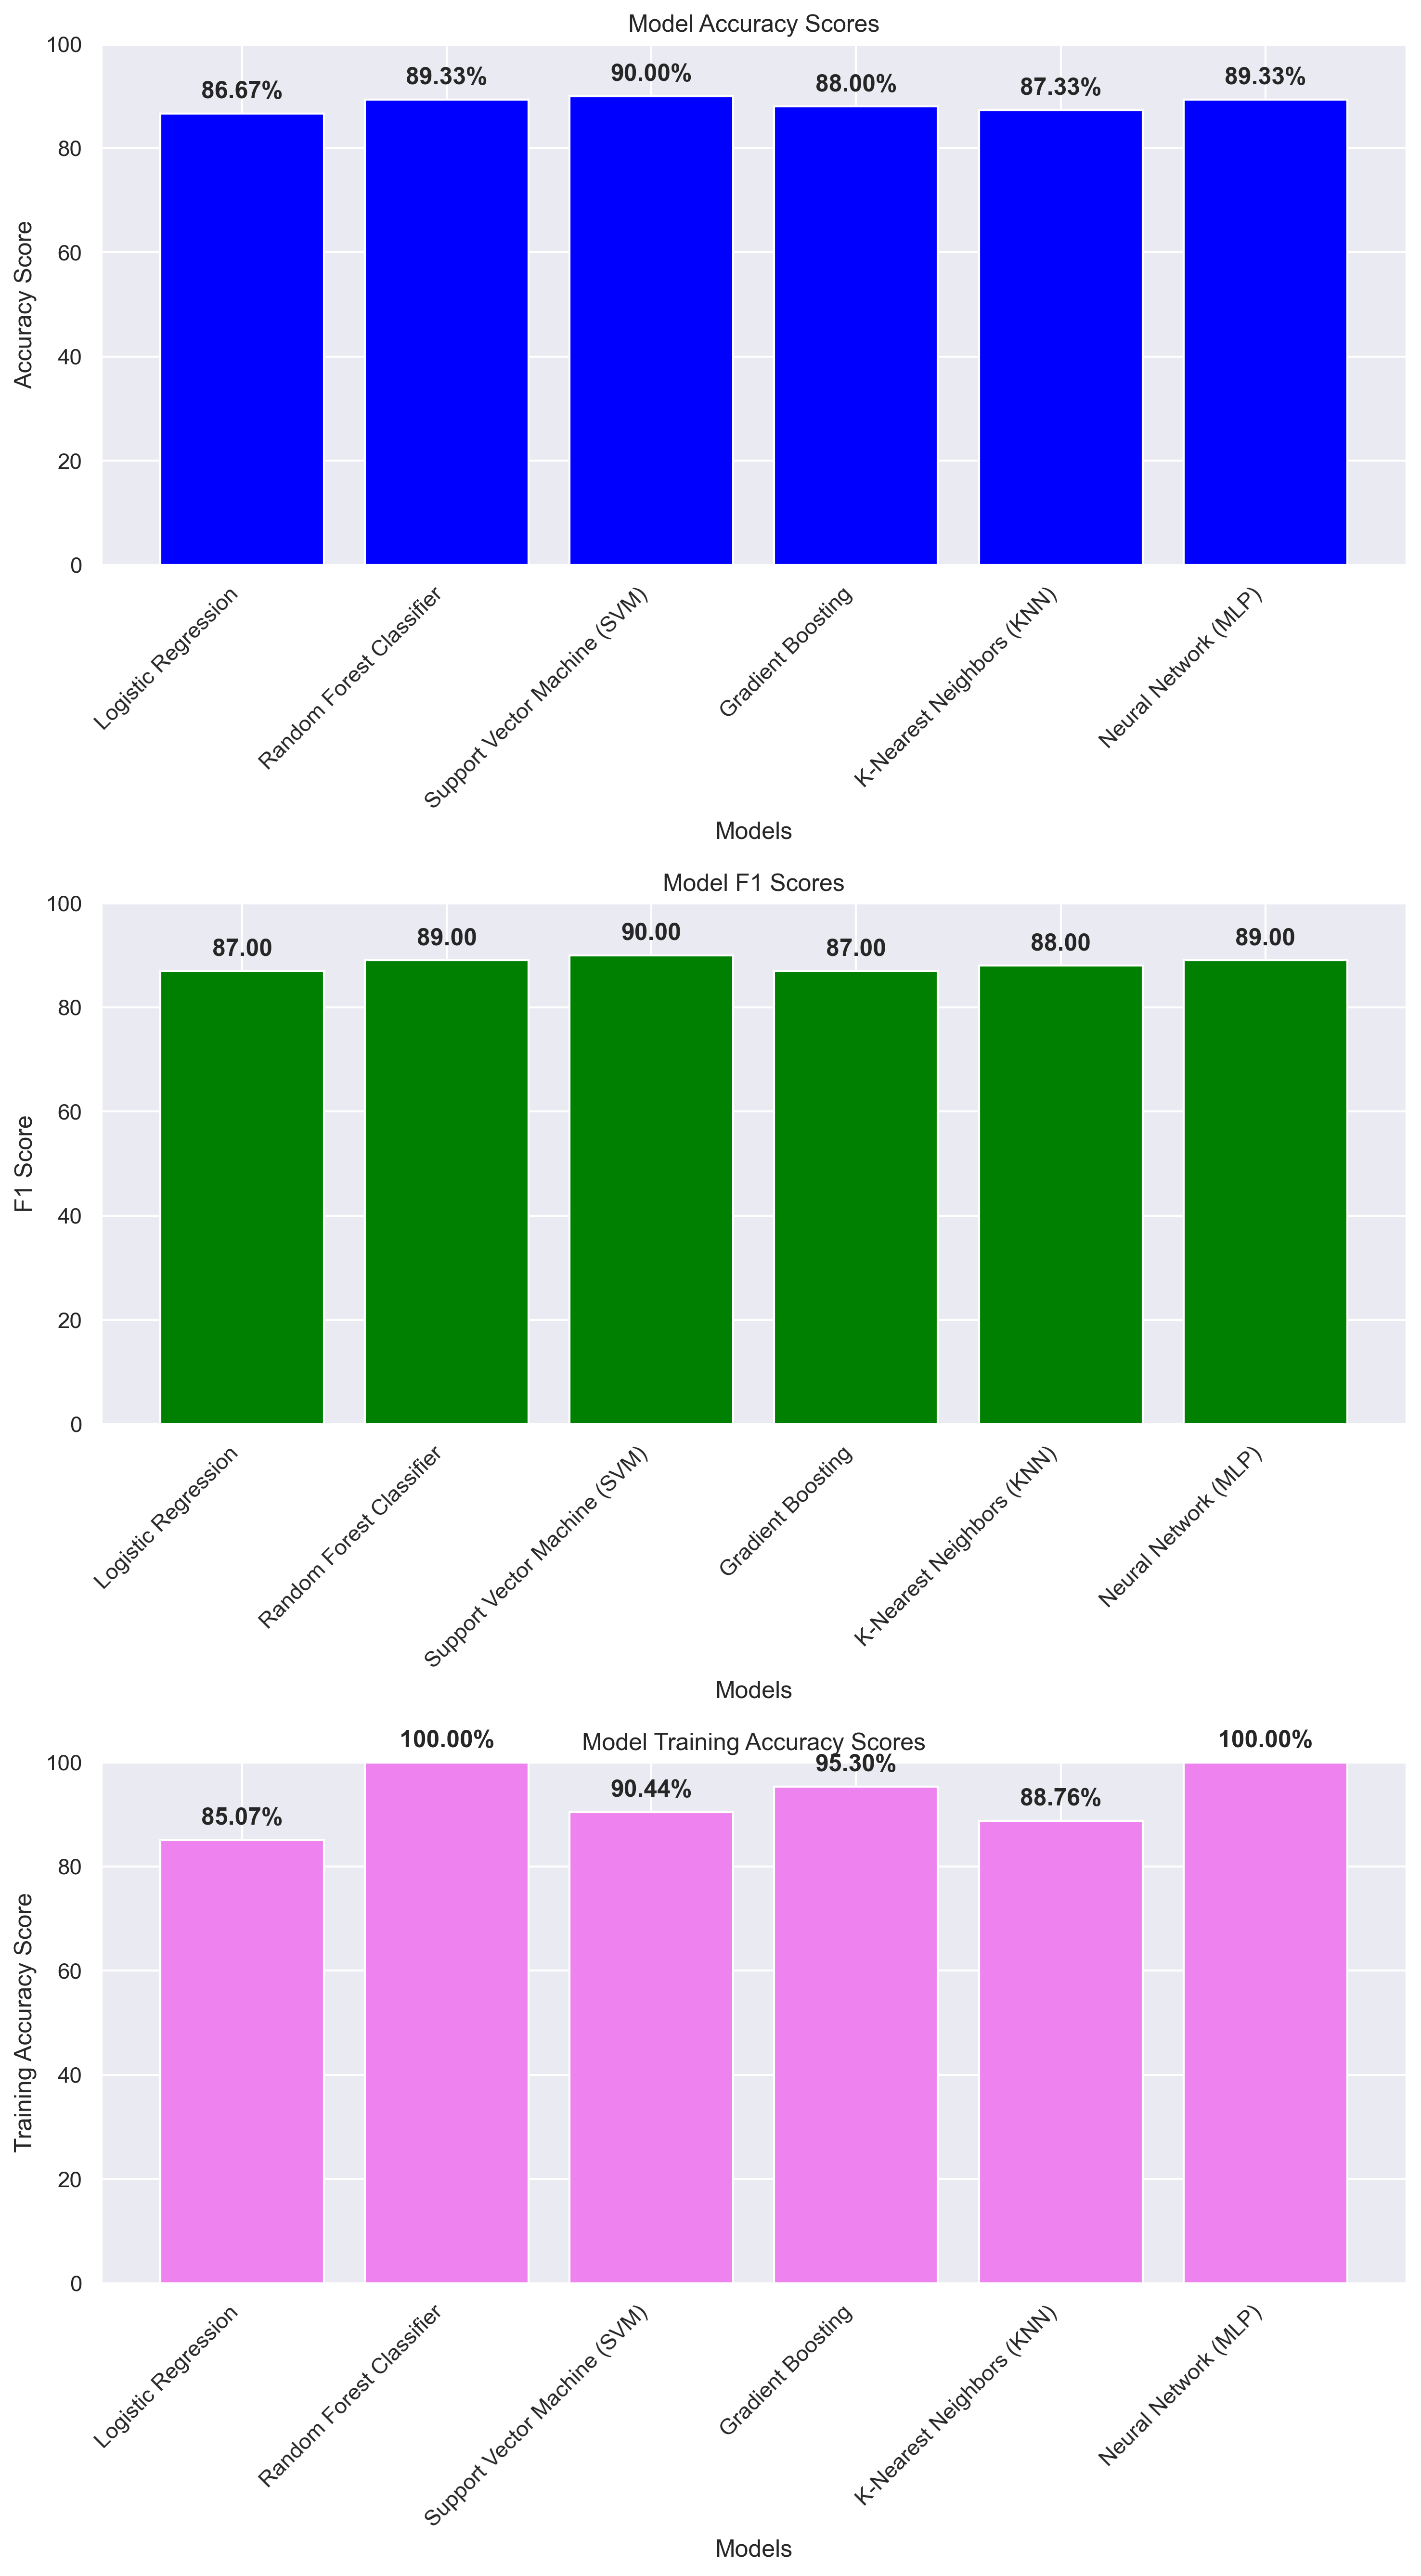

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 18))

# Plotting Accuracy Scores
plt.subplot(3, 1, 1)
accuracy_bars = plt.bar(models['Model'], models['Model Accuracy Score'], color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Scores')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)

for bar in accuracy_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval:.2f}%', ha='center', va='bottom', fontweight='bold')

# Plotting F1 Scores
plt.subplot(3, 1, 2)
f1_bars = plt.bar(models['Model'], models['Model f1 Score'], color='green')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Model F1 Scores')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)

for bar in f1_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval:.2f}', ha='center', va='bottom', fontweight='bold')

# Plotting Training Accuracy Scores
plt.subplot(3, 1, 3)
training_accuracy_bars = plt.bar(models['Model'], models['Training Accuracy Score'], color='violet')
plt.xlabel('Models')
plt.ylabel('Training Accuracy Score')
plt.title('Model Training Accuracy Scores')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)

for bar in training_accuracy_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval:.2f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()